https://worldroadstatistics.org/wrs-data/data/

Area of analysis: is Ireland a country heavely dependent on public and shared transportation or not?

# Data Preparation & Visualisation Tasks 1-3

#### ●	Discuss in detail the process of acquiring your raw data, detailing the positive and/or negative aspects of your research and acquisition. This should include the relevance and implications of any and all licensing/permissions associated with the data. [0-15]

Process of Acquiring Raw Data:

Explain how you obtained the raw data for your research. Did you collect it yourself, or did you use existing datasets? Specify the sources and methods involved in acquiring the data.

Data has been researched first through the provided "transport infrastructure ireland" dataset website and the on the public internet.

Aften an intensive search of a comprehensive dataset that would contain standardized traffic and infrastructure information for multiple countries, data from https://worldroadstatistics.org/wrs-data/data/ was chosen.

The acquisition required a registration process that then led to the access of the datawarehouse. 

Positive Aspects:

Identify and elaborate on any positive aspects of the data acquisition process. For example, discuss the reliability of the data, the diversity of sources, or any unique features that make the data valuable for your research.

The main reason and positive aspect of why I decided to choose this dataset is because it is coming from a reliable datasource: The International Federation Road. This organization is a global, independent, not-for-profit organisation with headquarters in Geneva, Switzerland. Active since 1948, its mission is to promote the development of roads and road networks that enable access and sustainable mobility for all.

IRS provides, among different indicators, traffic data regarding 200+ countries.
The IRS portal works as hub for parnter countries that access the platform Data Input Portal and submit their own data. Data from 2016 to 2021 is provided for free.

Negative Aspects:

Discuss any challenges or drawbacks encountered during the data acquisition. This could include issues such as data inconsistencies, missing values, biases, or limitations in the dataset that may impact the quality of your research.

It happened that the data warehouse was offline, meaning that the access to data wasn't as simple as expected.
Few countries were presenting missing data.

Relevance of Data:

Explain why the acquired data is relevant to your research objectives. Discuss how it aligns with your research questions and contributes to the overall goals of your study.

The research I'm undertaking is aiming to answer the question: Is Ireland a country heavely dependent on public transportation or not?

Of course, to make an assesment on Ireland condition in regard to public transportation, a concrete way of comparing it with other countries is necessary. The found dataset provides the right measurable metrics to asses the usage of different kind of transportation methods.

Implications of Licensing/Permissions:

If applicable, detail any licensing agreements or permissions associated with the data. Discuss how these agreements impact your ability to use, analyze, and share the data. Consider the ethical implications of working with the data within the boundaries set by licensing agreements.

Overall Assessment:

Provide an overall assessment of the data acquisition process. Consider summarizing the strengths and weaknesses, and reflect on how the chosen data contributes to the validity and reliability of your research.

#### ●	Exploratory Data Analysis helps to identify patterns, inconsistencies, anomalies, missing data, and other attributes and issues in data sets so problems can be addressed. Evaluate your raw data and detail, in depth, the various attributes and issues that you find. Your evaluation should reference evidence to support your  chosen methodology and use visualizations to illustrate your findings.[0-25]

Data loading

In [441]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore') # We can suppress the warnings

df_2021 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2021.csv")
df_2020 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2020.csv")
df_2019 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2019.csv")
df_2018 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2018.csv")
df_2017 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2017.csv")
df_2016 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2016.csv")

df_2021["Year"] = 2021 
df_2020["Year"] = 2020
df_2019["Year"] = 2019
df_2018["Year"] = 2018
df_2017["Year"] = 2017
df_2016["Year"] = 2016

df = pd.concat([df_2021,df_2020,df_2019,df_2018,df_2017,df_2016])

# Quickly show the dataset
df.head()

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0   Austria                60721.0                        390.0   
1   Belarus                  244.0                        324.0   
2  Bulgaria                    NaN                        353.0   
3   Croatia                19780.0                        240.0   
4   Denmark                40313.0                        624.0   

   Total Van, Pickup, Lorry and Road Tractor Traffic  \
0                                            13810.0   
1                                              935.0   
2                                             2757.0   
3                                             3170.0   
4                                             9257.0   

   Total four wheeled Traffic  Year  
0                     74921.0  2021  
1                      1503.0  2021  
2                      3110.0  2021  
3                     23190.0  2021  
4                     50194.0  2021

Presented value are representing the traffic volume, either for specific vehicle categories or for all vehicles.
Traffic volume is defined by IRS as:
- Weighted average daily flow of each vehicle type on each category of the road network, as determined from regular national stratified, classified traffic counts.

If no data is availble, then an estimation is calculated:
- If counts are not available, traffic volume is estimated by dividing the annual consumption of motor vehicle fuel (in litres) used in the country by the number of vehicles in each category. The result is then multiplied by the average number of km/litre for that category.

It's also worth giving a definition of the vehicle types here represented:
- Passenger cars are road motor vehicle, other than a motor cycle, intended for the carriage of passengers and designed to seat no more than nine persons (including the driver). Passenger cars include microcars (needing no permit to be driven), taxis, vans designed for transport of passengers and passenger hire cars, provided that they have fewer than ten seats.
- Buses and motor coaches are road motor vehicles designed to seat more than nine persons (including the driver). Included are mini-buses and mini-coaches designed to seat more than nine persons (including the driver).
- Vans & Pick-ups (Light goods road vehicle) are road vehicles with a gross vehicle weight of not more than 3500 kg, designed, exclusively or primarily, to carry goods, e.g. vans and pick-ups.
- Total four wheeled Traffic is just the sum of the preiovus.




https://worldroadstatistics.org/wp-content/uploads/2020/08/WRS-Definitions.pdf

In [442]:
# We aim at understanding the datatypes of available columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Category                                           188 non-null    object 
 1   Passenger Car Traffic                              152 non-null    float64
 2   Bus and Motor Coach Traffic                        176 non-null    float64
 3   Total Van, Pickup, Lorry and Road Tractor Traffic  175 non-null    float64
 4   Total four wheeled Traffic                         158 non-null    float64
 5   Year                                               188 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 10.3+ KB


In [443]:
# We aim at having a statistical description of our dataset
df.describe()

Passenger Car Traffic  Bus and Motor Coach Traffic  \
count             152.000000                   176.000000   
mean            93395.019737                   879.346591   
std            156635.457716                  1141.624426   
min                29.000000                     3.000000   
25%              9396.000000                   169.500000   
50%             34973.500000                   415.500000   
75%             70646.000000                   844.000000   
max            649600.000000                  4600.000000   

       Total Van, Pickup, Lorry and Road Tractor Traffic  \
count                                         175.000000   
mean                                        19094.211429   
std                                         31317.093342   
min                                             4.000000   
25%                                          2484.500000   
50%                                          7248.000000   
75%                                         16646.000000   
max                                        122489.000000   

       Total four wheeled Traffic         Year  
count                  158.000000   188.000000  
mean                110578.993671  2018.500000  
std                 186865.921966     1.710302  
min                     59.000000  2016.000000  
25%                  11277.500000  2017.000000  
50%                  44376.500000  2018.500000  
75%                  83172.250000  2020.000000  
max                 751400.000000  2021.000000

In [444]:
# Let's get the shape of the dataset
df.shape

(188, 6)

In [445]:
# And check if there is any null value
df.isnull().sum()

Category                                              0
Passenger Car Traffic                                36
Bus and Motor Coach Traffic                          12
Total Van, Pickup, Lorry and Road Tractor Traffic    13
Total four wheeled Traffic                           30
Year                                                  0
dtype: int64

In [446]:
# Let's get the countries represented in the dataset
sorted(df["Category"].unique())

['Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Ireland',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom']

Show the values of each feature over time and by country.
This also shows if there are easely visible outliers and if there are missing data for specific feature, country and year.

In [447]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='feature-selector',
        options=[{'label': col, 'value': col} for col in df.columns[1:-1]],
        value='Total four wheeled Traffic',
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(id='traffic-bar-chart')
])

# Define callback to update the bar chart based on dropdown selection
@app.callback(
    Output('traffic-bar-chart', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_bar_chart(selected_feature):
    df_grouped = df.groupby(["Category", "Year"]).sum().reset_index()
    fig = px.bar(df_grouped, x='Year', y=selected_feature, animation_frame='Category',
                 title=f'{selected_feature} by Year Over Categories')
    fig.update_layout(xaxis_title='Year', yaxis_title=selected_feature)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

This graph shows outliers if we take into consideration only features.
This means that an outlier can be a single country for a specific year.

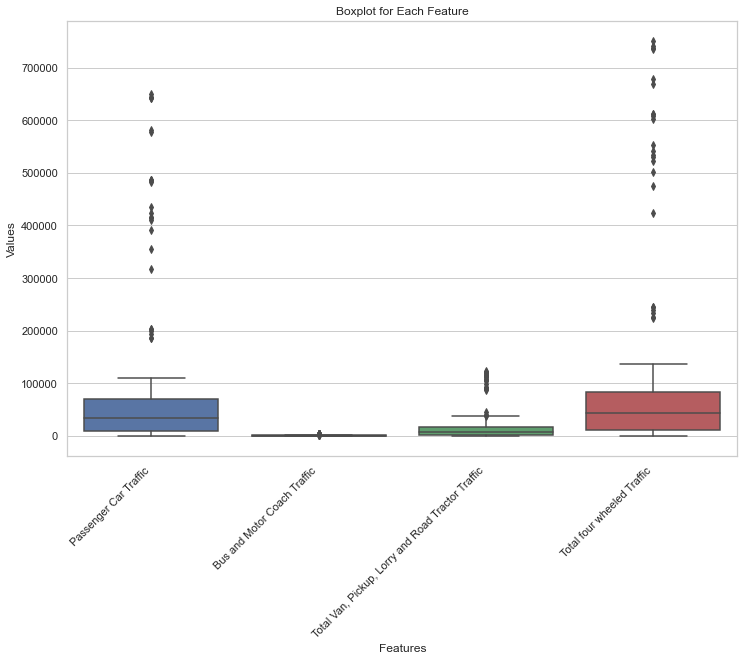

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop(columns=['Category', 'Year'])

# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data))
plt.title("Boxplot for Each Feature")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

From previous graph,  given that the features are not scaled for different countries, it is normal to see many outliers.
Let's see if we can spot outliers just looking at a single country given that we have data from 2016 to 2021.

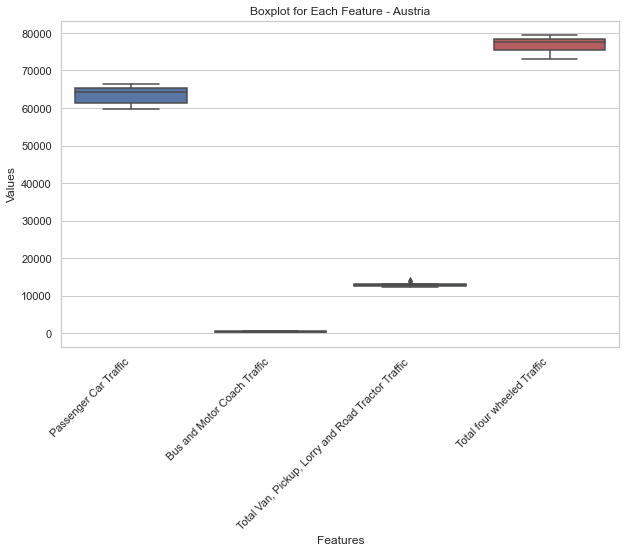

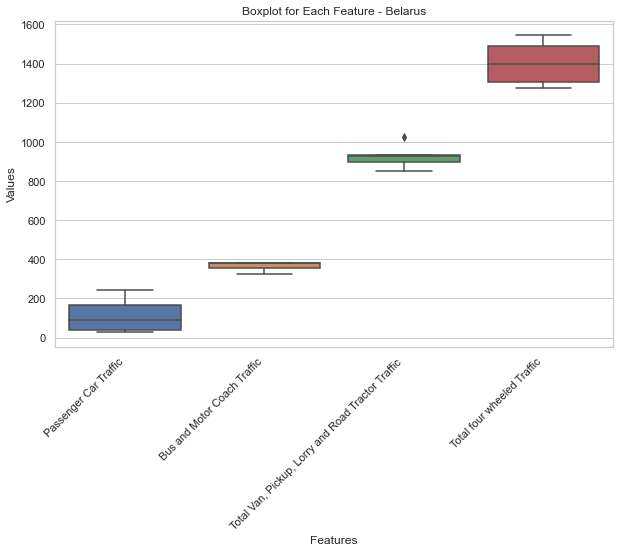

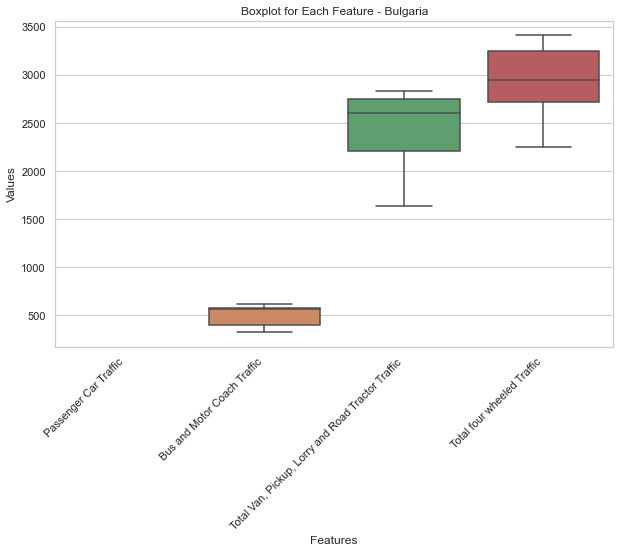

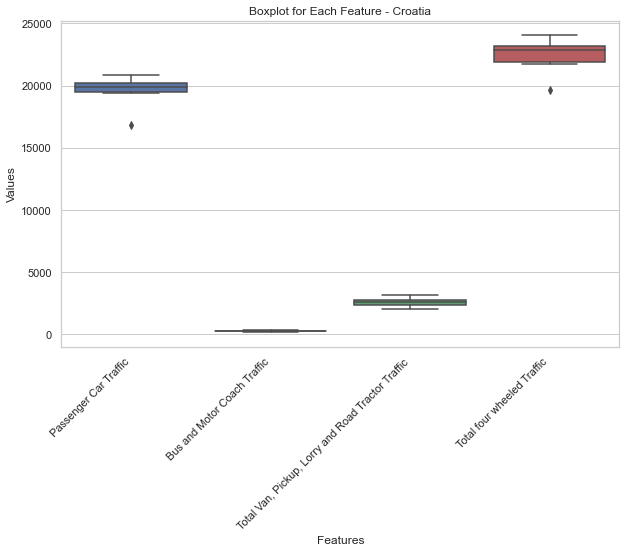

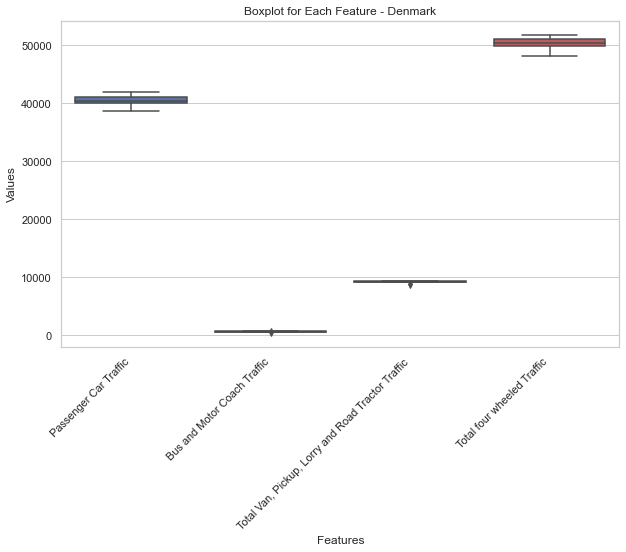

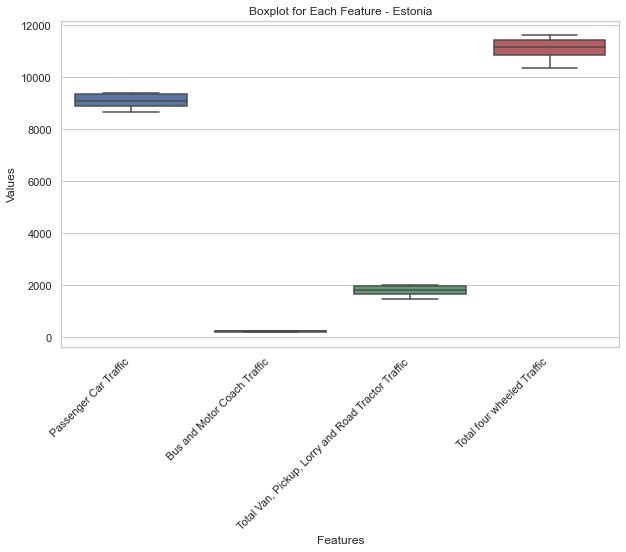

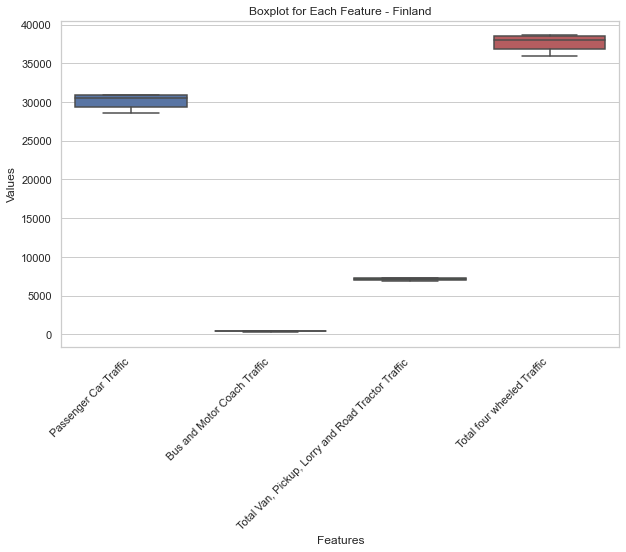

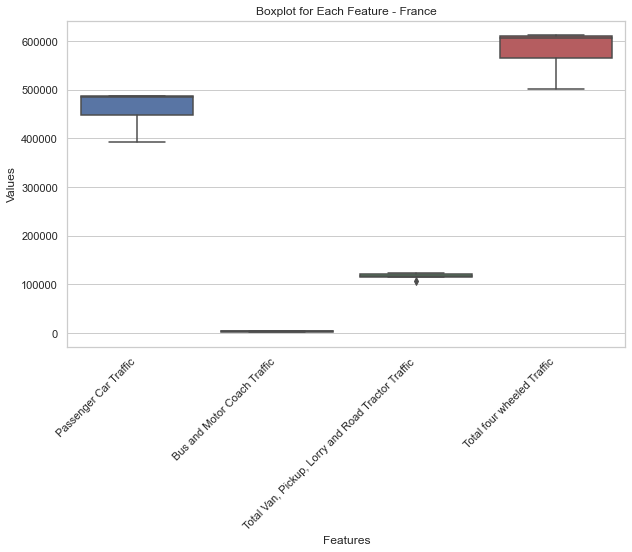

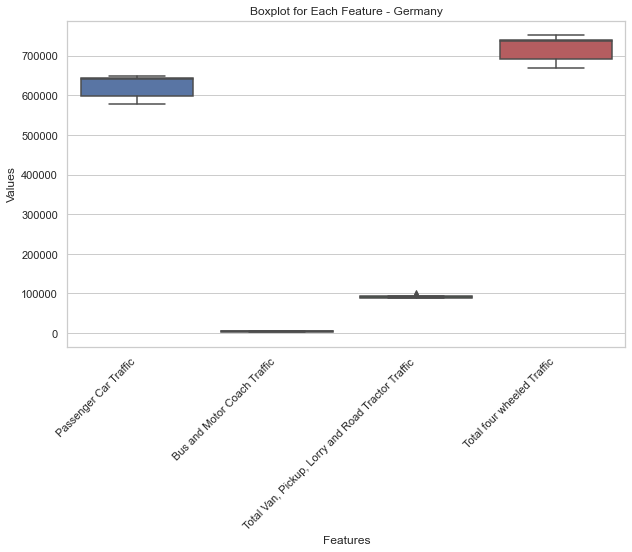

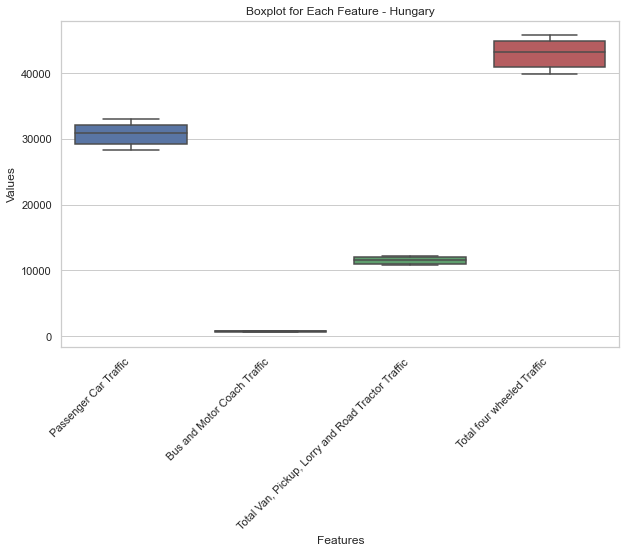

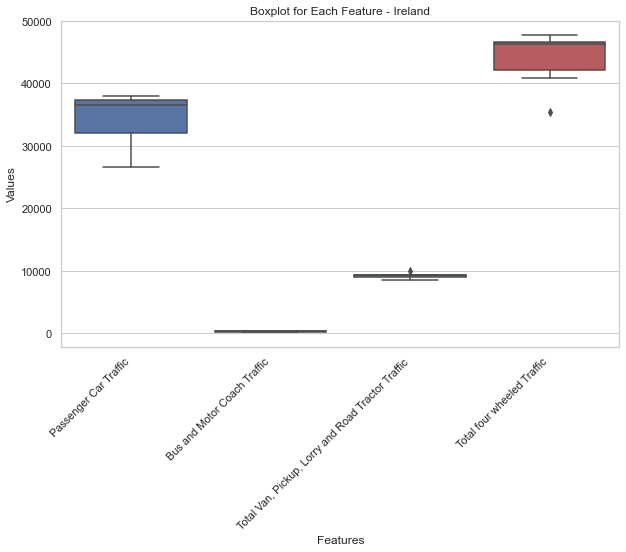

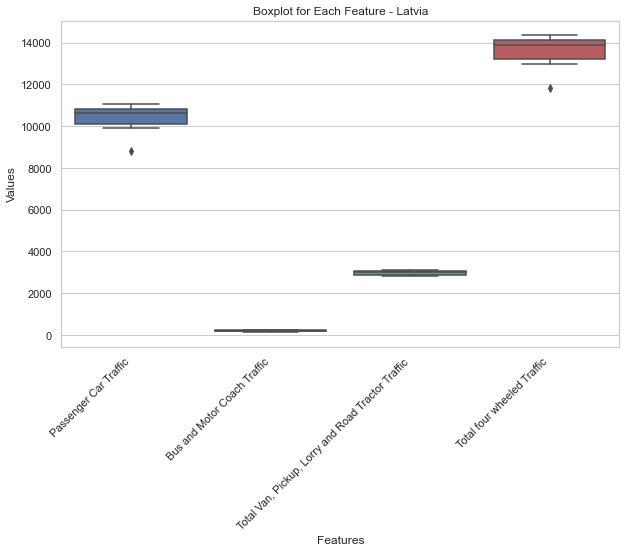

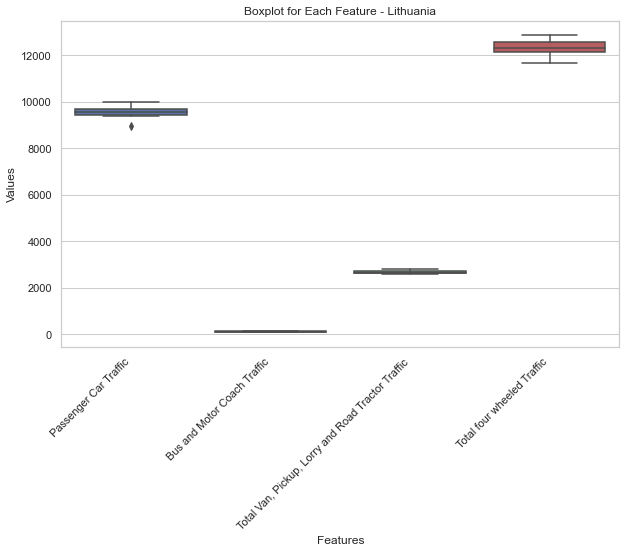

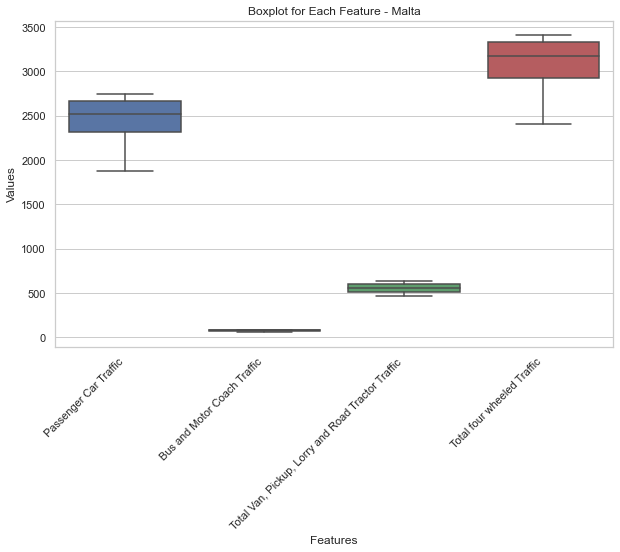

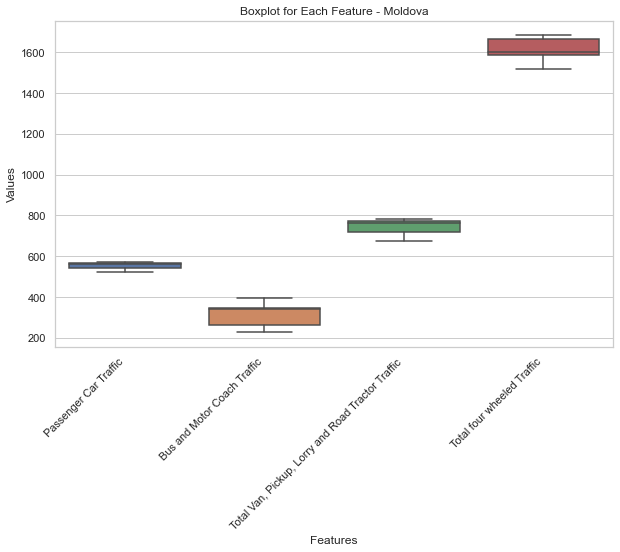

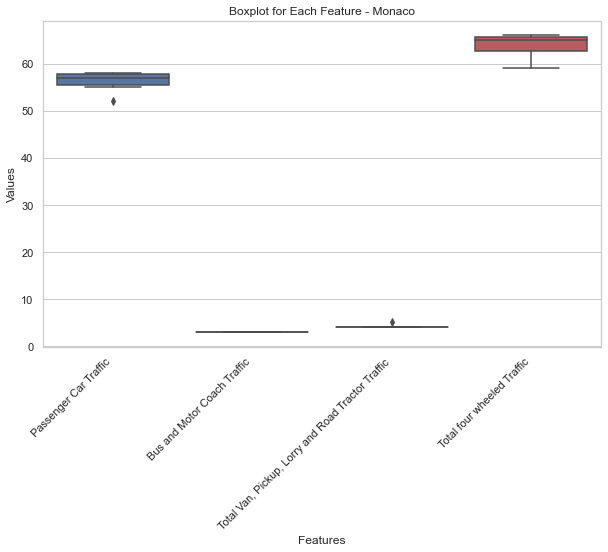

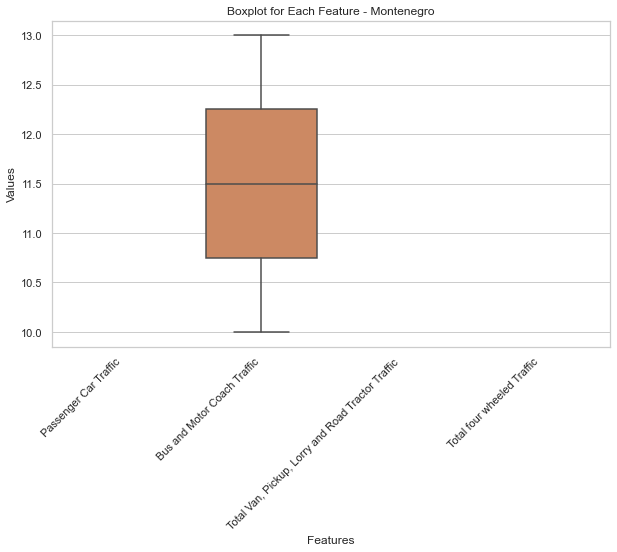

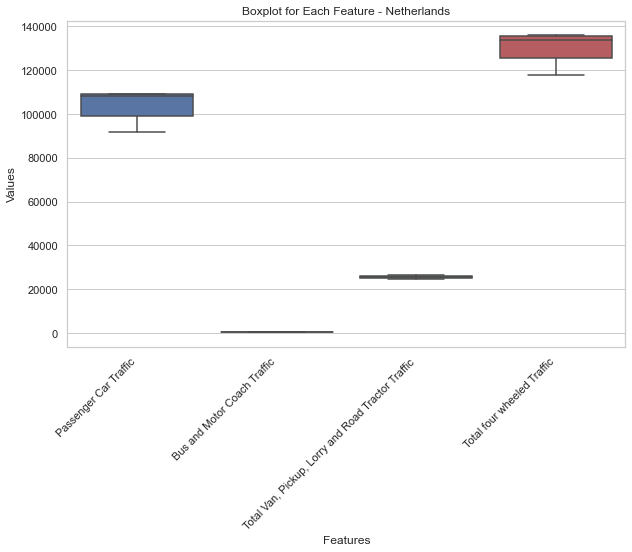

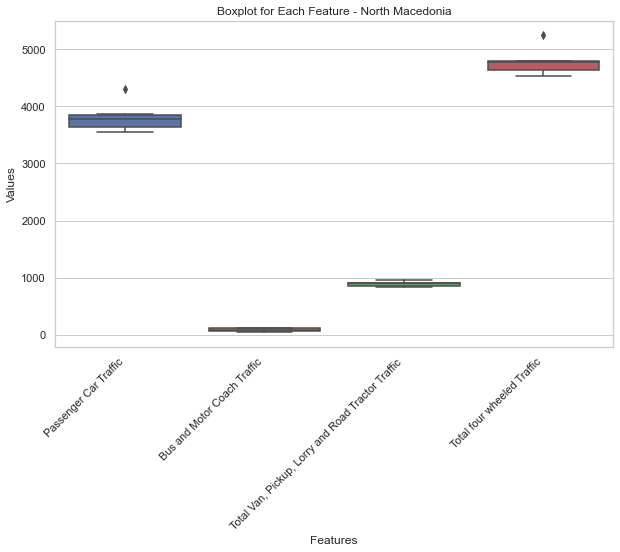

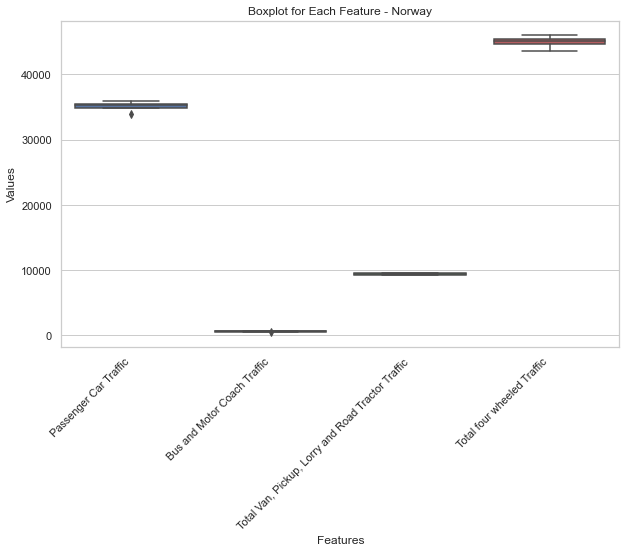

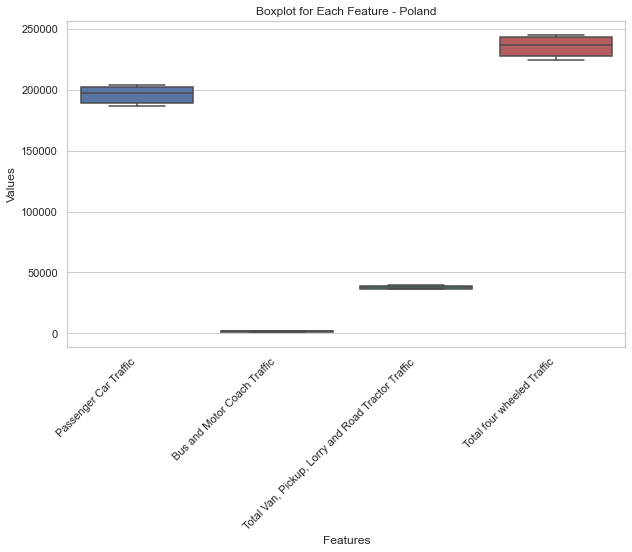

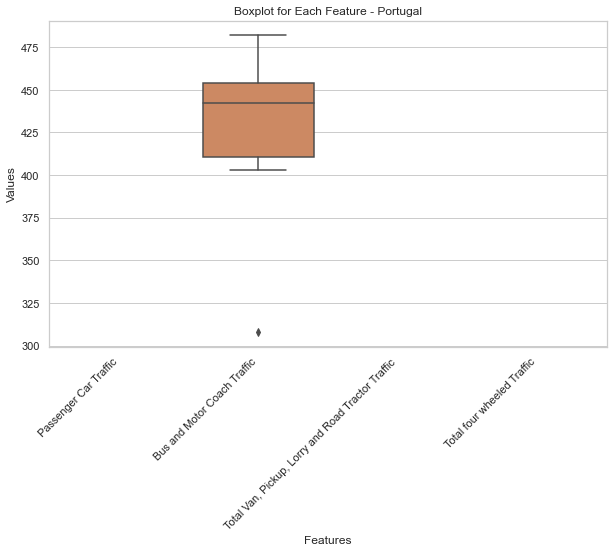

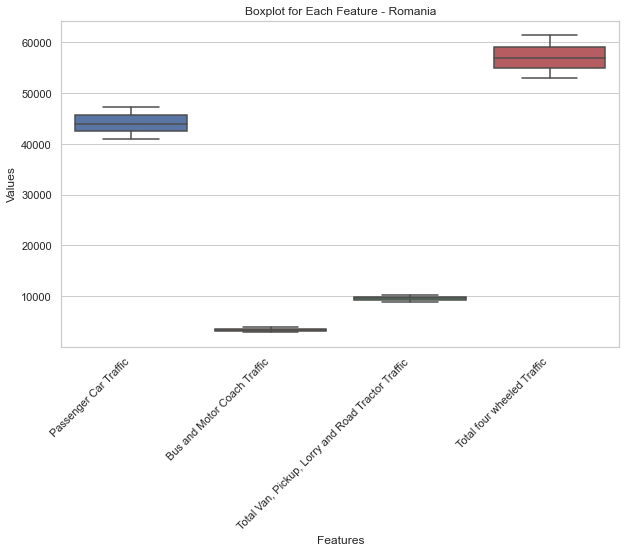

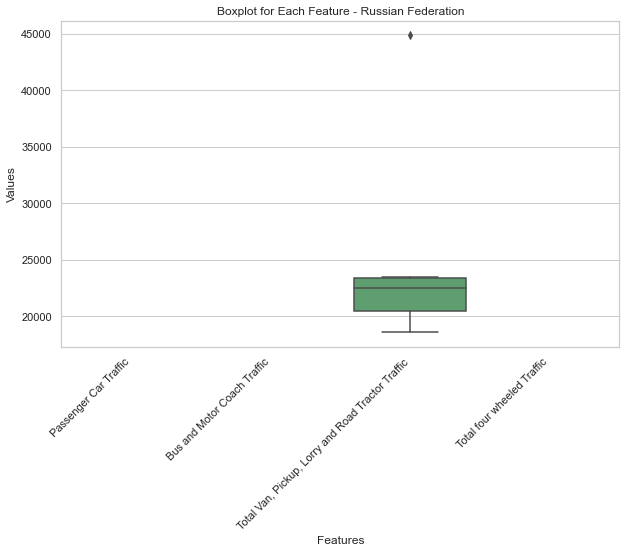

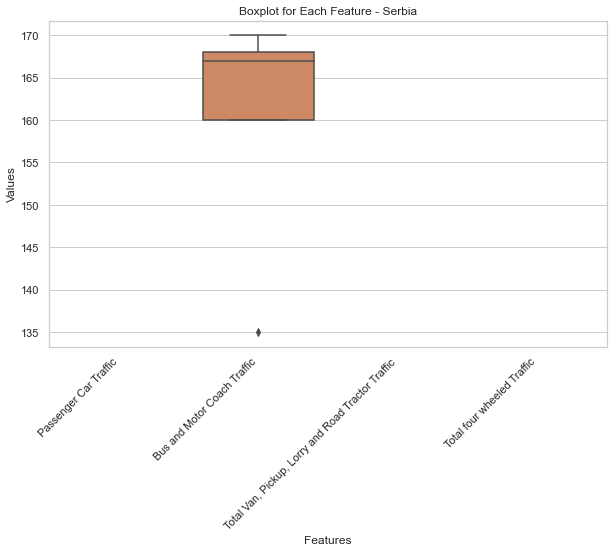

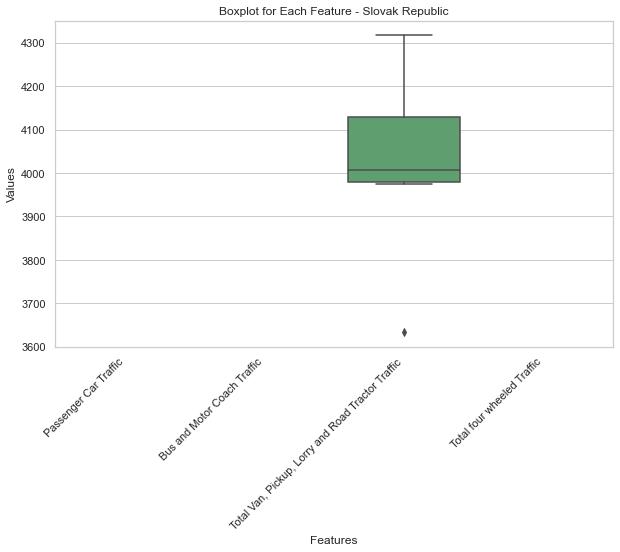

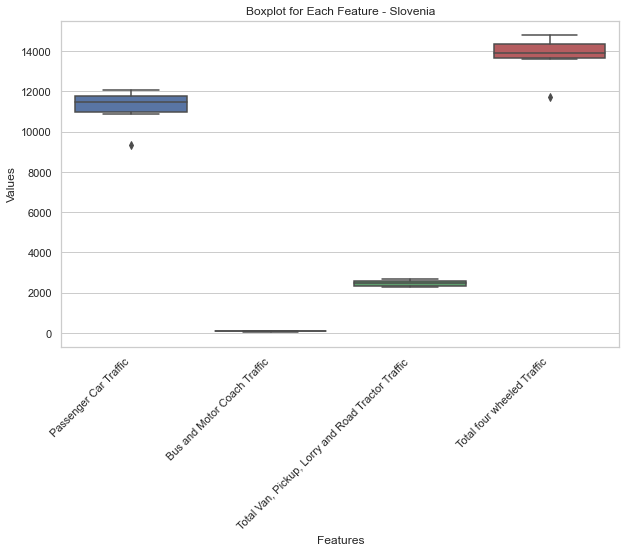

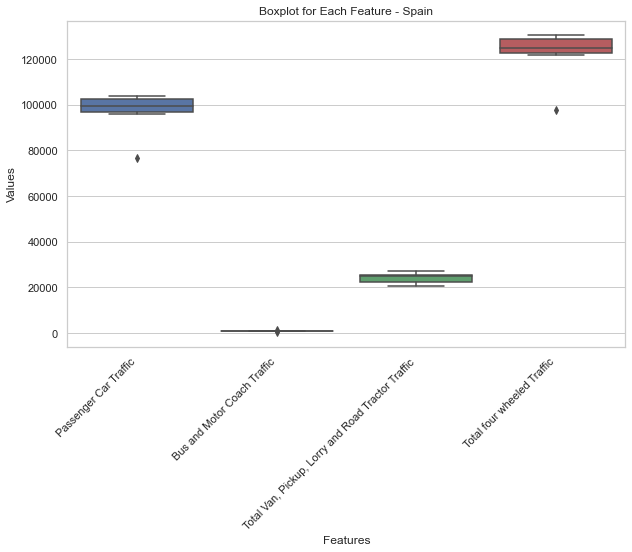

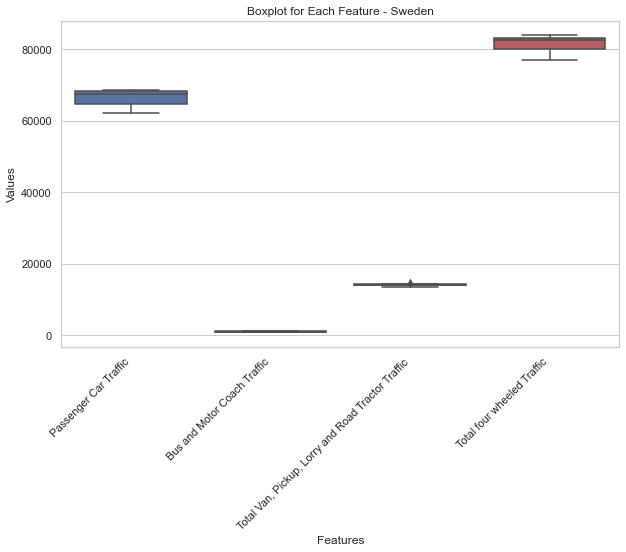

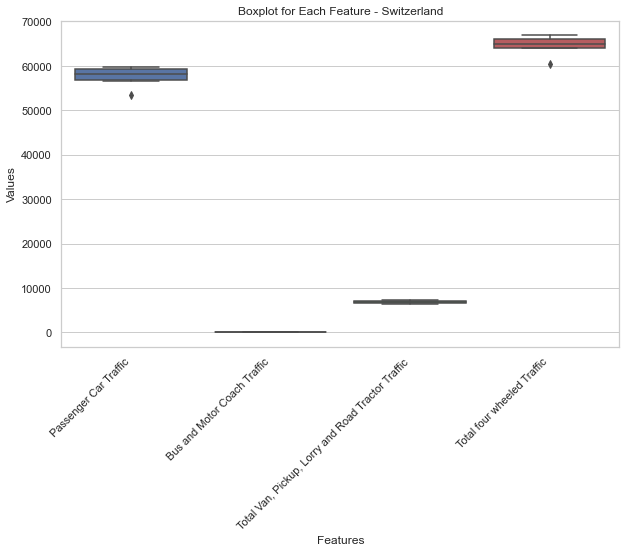

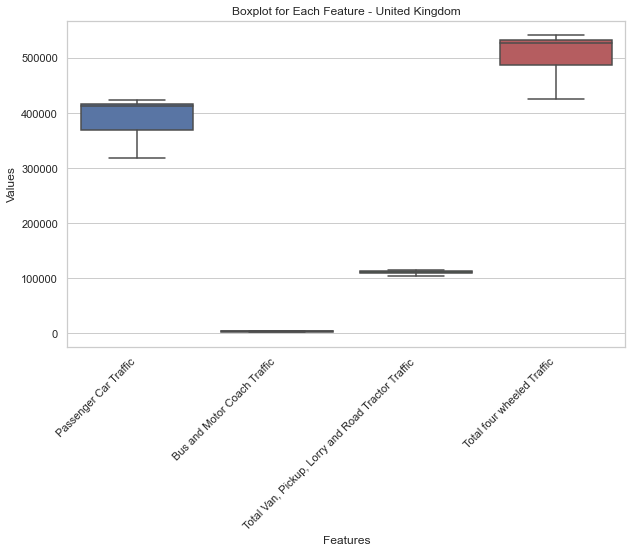

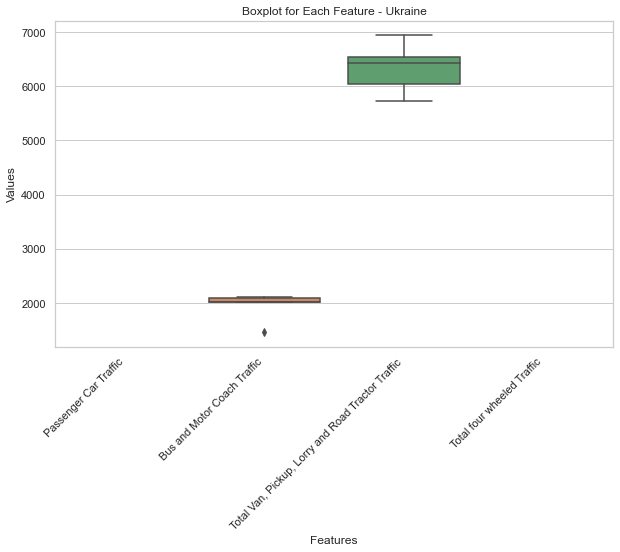

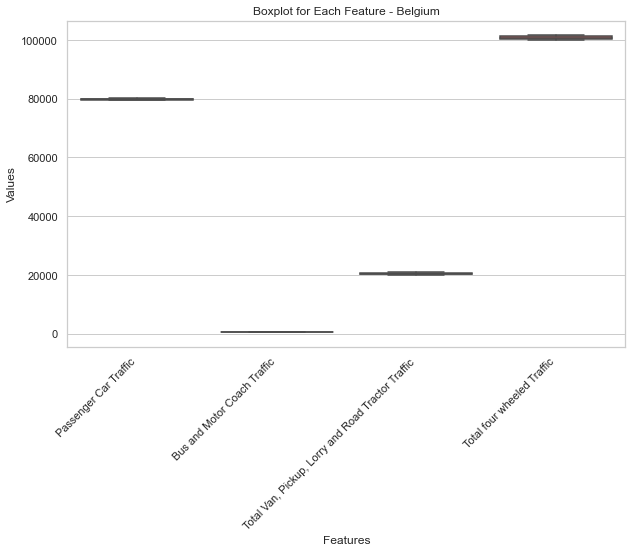

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.iloc[:,:-1]

# Get unique categories
categories = df['Category'].unique()

# Create a separate boxplot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data[boxplot_data["Category"] == category].iloc[:,1:]))
    plt.title(f"Boxplot for Each Feature - {category}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Many countries do present outliers and, in the following section, we decide how to handle them.

#### ●	Taking into consideration the tasks required in the machine learning section, use appropriate data cleaning, engineering, extraction and/or other techniques to structure and enrich your data. Rationalize your decisions and implementation, including evidence of how your process has addressed the problems identified in the EDA (Exploratory Data Analysis) stage and how your structured data will assist in the analysis stage. This should include visualizations to illustrate your work and evidence to support your methodology.[0-30]

From previous analysis we realized there are multiple things we need to work on:
- Weighting of features
- Handling of missing data

Let's work on the features weighting and let's do a quick head of the dataframe to better explain the importance of this point:

In [450]:
df.head()

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0   Austria                60721.0                        390.0   
1   Belarus                  244.0                        324.0   
2  Bulgaria                    NaN                        353.0   
3   Croatia                19780.0                        240.0   
4   Denmark                40313.0                        624.0   

   Total Van, Pickup, Lorry and Road Tractor Traffic  \
0                                            13810.0   
1                                              935.0   
2                                             2757.0   
3                                             3170.0   
4                                             9257.0   

   Total four wheeled Traffic  Year  
0                     74921.0  2021  
1                      1503.0  2021  
2                      3110.0  2021  
3                     23190.0  2021  
4                     50194.0  2021

If we look at data for Austria and Belarus in 2021, we can clearly see that the "Total four wheeled Traffic" is about 50 times bigger in Austria. This might be because of different reasons such as:
- Population size is different
- In one of the countries traffic data is not well represented with respect to the total population
- The development of a country may influence its vehicle traffic

For this reason, for our analysis, we want to consider the traffic % of vehicle categories with respect to the total four wheeled traffic of the specific country.

For this, the first thing we want to make sure is that the traffic sum of different vehicles type is equal to the four wheeled total:

In [451]:
df['Sum four wheeled Traffic'] = df['Passenger Car Traffic'] + df['Bus and Motor Coach Traffic'] + df['Total Van, Pickup, Lorry and Road Tractor Traffic']

# Check if the sum in the new column is equal to the values in column 4
df['Sum Check'] = df['Sum four wheeled Traffic'] == df['Total four wheeled Traffic']

# Display the rows where the sum is not equal to column 4
rows_with_mismatch = df[df['Sum Check'] == False]

Let's look at samples where we can see this miss match:

In [452]:
rows_with_mismatch

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
2             Bulgaria                    NaN                        353.0   
8              Germany               582400.0                       2900.0   
13               Malta                 2290.0                         59.0   
16          Montenegro                    NaN                         13.0   
21            Portugal                    NaN                        403.0   
..                 ...                    ...                          ...   
19              Norway                34849.0                        569.0   
21            Portugal                    NaN                        451.0   
23  Russian Federation                    NaN                          NaN   
24     Slovak Republic                    NaN                          NaN   
29             Ukraine                    NaN                       2026.0   

    Total Van, Pickup, Lorry and Road Tractor Traffic  \
2                                              2757.0   
8                                             92600.0   
13                                              502.0   
16                                                NaN   
21                                                NaN   
..                                                ...   
19                                             9208.0   
21                                                NaN   
23                                            44837.0   
24                                             4017.0   
29                                             5719.0   

    Total four wheeled Traffic  Year  Sum four wheeled Traffic  Sum Check  
2                       3110.0  2021                       NaN      False  
8                     677800.0  2021                  677900.0      False  
13                      2852.0  2021                    2851.0      False  
16                         NaN  2021                       NaN      False  
21                         NaN  2021                       NaN      False  
..                         ...   ...                       ...        ...  
19                     44625.0  2016                   44626.0      False  
21                         NaN  2016                       NaN      False  
23                         NaN  2016                       NaN      False  
24                         NaN  2016                       NaN      False  
29                         NaN  2016                       NaN      False  

[69 rows x 8 columns]

We can immediatelly observ that in some case the False flag is caused by the presence of NaN values.

Let's replace those NaN values and repeat the calculation:

In [453]:
rows_with_mismatch.fillna(0, inplace=True)

# Reset the index to avoid duplicate labels
rows_with_mismatch.reset_index(drop=True, inplace=True)

rows_with_mismatch['Sum four wheeled Traffic'] = (
    rows_with_mismatch['Passenger Car Traffic'] +
    rows_with_mismatch['Bus and Motor Coach Traffic'] +
    rows_with_mismatch['Total Van, Pickup, Lorry and Road Tractor Traffic']
)

# Check if the sum in the new column is equal to the values in column 4
rows_with_mismatch['Sum Check'] = rows_with_mismatch['Sum four wheeled Traffic'] == rows_with_mismatch['Total four wheeled Traffic']

# Display the rows where the sum is not equal to column 4
rows_with_mismatch = rows_with_mismatch[rows_with_mismatch['Sum Check'] == False]


In [454]:
rows_with_mismatch

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
1              Germany               582400.0                       2900.0   
2                Malta                 2290.0                         59.0   
3           Montenegro                    0.0                         13.0   
4             Portugal                    0.0                        403.0   
5              Romania                47249.0                       3862.0   
..                 ...                    ...                          ...   
64              Norway                34849.0                        569.0   
65            Portugal                    0.0                        451.0   
66  Russian Federation                    0.0                          0.0   
67     Slovak Republic                    0.0                          0.0   
68             Ukraine                    0.0                       2026.0   

    Total Van, Pickup, Lorry and Road Tractor Traffic  \
1                                             92600.0   
2                                               502.0   
3                                                 0.0   
4                                                 0.0   
5                                             10242.0   
..                                                ...   
64                                             9208.0   
65                                                0.0   
66                                            44837.0   
67                                             4017.0   
68                                             5719.0   

    Total four wheeled Traffic  Year  Sum four wheeled Traffic  Sum Check  
1                     677800.0  2021                  677900.0      False  
2                       2852.0  2021                    2851.0      False  
3                          0.0  2021                      13.0      False  
4                          0.0  2021                     403.0      False  
5                      61354.0  2021                   61353.0      False  
..                         ...   ...                       ...        ...  
64                     44625.0  2016                   44626.0      False  
65                         0.0  2016                     451.0      False  
66                         0.0  2016                   44837.0      False  
67                         0.0  2016                    4017.0      False  
68                         0.0  2016                    7745.0      False  

[63 rows x 8 columns]

With this operation we can clearly see that we reduced the samples from 69 to 63.

Given that numbers might be rounded, let's remove all samples where the difference between the already available sum and the calculated one is less than 1%:

In [455]:
# Set the percentage threshold
percentage_threshold = 1

# Calculate the absolute difference and percentage difference using .loc
rows_with_mismatch.loc[:, 'Absolute_Difference'] = rows_with_mismatch['Sum four wheeled Traffic'] - rows_with_mismatch['Total four wheeled Traffic']
rows_with_mismatch.loc[:, 'Percentage_Difference'] = (rows_with_mismatch['Absolute_Difference'] / rows_with_mismatch['Total four wheeled Traffic']) * 100

# Filter rows where the percentage difference is greater than or equal to the threshold using .loc
rows_with_mismatch = rows_with_mismatch.loc[rows_with_mismatch['Percentage_Difference'] >= percentage_threshold]

# Drop the additional columns used for calculations using .loc
rows_with_mismatch = rows_with_mismatch.drop(['Absolute_Difference', 'Percentage_Difference'], axis=1)

In [456]:
rows_with_mismatch

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
3           Montenegro                    0.0                         13.0   
4             Portugal                    0.0                        403.0   
6   Russian Federation                    0.0                          0.0   
7               Serbia                    0.0                        135.0   
8      Slovak Republic                    0.0                          0.0   
15          Montenegro                    0.0                         10.0   
17            Portugal                    0.0                        308.0   
18  Russian Federation                    0.0                          0.0   
19              Serbia                    0.0                        167.0   
20     Slovak Republic                    0.0                          0.0   
22             Ukraine                    0.0                       1468.0   
31            Portugal                    0.0                        434.0   
32  Russian Federation                    0.0                          0.0   
33              Serbia                    0.0                        168.0   
34     Slovak Republic                    0.0                          0.0   
37             Ukraine                    0.0                       2117.0   
44            Portugal                    0.0                        482.0   
45  Russian Federation                    0.0                          0.0   
46              Serbia                    0.0                        170.0   
47     Slovak Republic                    0.0                          0.0   
49             Ukraine                    0.0                       2084.0   
54            Portugal                    0.0                        455.0   
55  Russian Federation                    0.0                          0.0   
56              Serbia                    0.0                        160.0   
57     Slovak Republic                    0.0                          0.0   
59             Ukraine                    0.0                       2017.0   
65            Portugal                    0.0                        451.0   
66  Russian Federation                    0.0                          0.0   
67     Slovak Republic                    0.0                          0.0   
68             Ukraine                    0.0                       2026.0   

    Total Van, Pickup, Lorry and Road Tractor Traffic  \
3                                                 0.0   
4                                                 0.0   
6                                             23280.0   
7                                                 0.0   
8                                              3634.0   
15                                                0.0   
17                                                0.0   
18                                            23444.0   
19                                                0.0   
20                                             3974.0   
22                                             6935.0   
31                                                0.0   
32                                            20037.0   
33                                                0.0   
34                                             4167.0   
37                                             6538.0   
44                                                0.0   
45                                            18607.0   
46                                                0.0   
47                                             3997.0   
49                                             6418.0   
54                                                0.0   
55                                            21750.0   
56                                                0.0   
57                                             4317.0   
59                                             6031.0   
65                                                0.0   

In [457]:
rows_with_mismatch.shape

(30, 8)

We can now see that we are left with only with samples where "Total four wheeled Traffic" had originally a nan value. We thus want to make sure that first of all those samples are deleted from our dataframe:

In [458]:
df.dropna(subset=['Total four wheeled Traffic'], inplace=True)

In [459]:
df.shape

(158, 8)

We can see that the dataset is now dropped from 188 to 158, exactly 30 samples.

Let's now see how many other samples are left with null values:

In [460]:
df[df.isnull().any(axis=1)]

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
2  Bulgaria                    NaN                        353.0   
2  Bulgaria                    NaN                        329.0   
2  Bulgaria                    NaN                        614.0   
2  Bulgaria                    NaN                        574.0   
3  Bulgaria                    NaN                        560.0   
3  Bulgaria                    NaN                        578.0   

   Total Van, Pickup, Lorry and Road Tractor Traffic  \
2                                             2757.0   
2                                             2458.0   
2                                             1638.0   
2                                             2121.0   
3                                             2739.0   
3                                             2831.0   

   Total four wheeled Traffic  Year  Sum four wheeled Traffic  Sum Check  
2                      3110.0  2021                       NaN      False  
2                      2787.0  2020                       NaN      False  
2                      2252.0  2019                       NaN      False  
2                      2695.0  2018                       NaN      False  
3                      3299.0  2017                       NaN      False  
3                      3409.0  2016                       NaN      False

As Bulgaria is the only country with NaN values, we decide to drop it:

In [461]:
df.dropna(inplace=True)

In [462]:
df.shape

(152, 8)

Now, for the traffic by vehicle type column, we can get the % value with respect to the total traffic:

In [463]:
for i in df.iloc[:, 1:-4].columns:
    df[i] = (df[i]/df["Total four wheeled Traffic"])*100

Now that we have the % values, we can remove the following columns:
- Total four wheeled Traffic
- Sum four wheeled Traffic
- Sum Check

In [464]:
columns_to_delete = ['Total four wheeled Traffic', 'Sum four wheeled Traffic', 'Sum Check']

# Delete specified columns using del
for column in columns_to_delete:
    del df[column]

If we remember, we also had countries missing values for some years. Let's identify them and fill the values:

In [465]:
from itertools import product

all_categories = df['Category'].unique()
all_years = range(2016, 2022)
ref_df = pd.DataFrame(list(product(all_categories, all_years)), columns=['Category', 'Year'])

# Merge the reference DataFrame with the original DataFrame
ref_df = pd.merge(ref_df, df, on=['Category', 'Year'], how='left')

# Calculate the mean for each category
category_means = ref_df.groupby('Category').transform('mean')

# Fill missing values with the corresponding mean for each category
ref_df.fillna(category_means, inplace=True)

df = ref_df

Let's now visualize graph we used in EDA:

In [466]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='feature-selector',
        options=[{'label': col, 'value': col} for col in df.columns[2:]],
        value='Bus and Motor Coach Traffic',
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(id='traffic-bar-chart')
])

# Define callback to update the bar chart based on dropdown selection
@app.callback(
    Output('traffic-bar-chart', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_bar_chart(selected_feature):
    df_grouped = df.groupby(["Category", "Year"]).sum().reset_index()
    fig = px.bar(df_grouped, x='Year', y=selected_feature, animation_frame='Category',
                 title=f'{selected_feature} by Year Over Categories')
    fig.update_layout(xaxis_title='Year', yaxis_title=selected_feature)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

We have now resolved the problem of missing data, now we need to solve the outliers problem.

Let's first of all see if the situation has been improved so far:

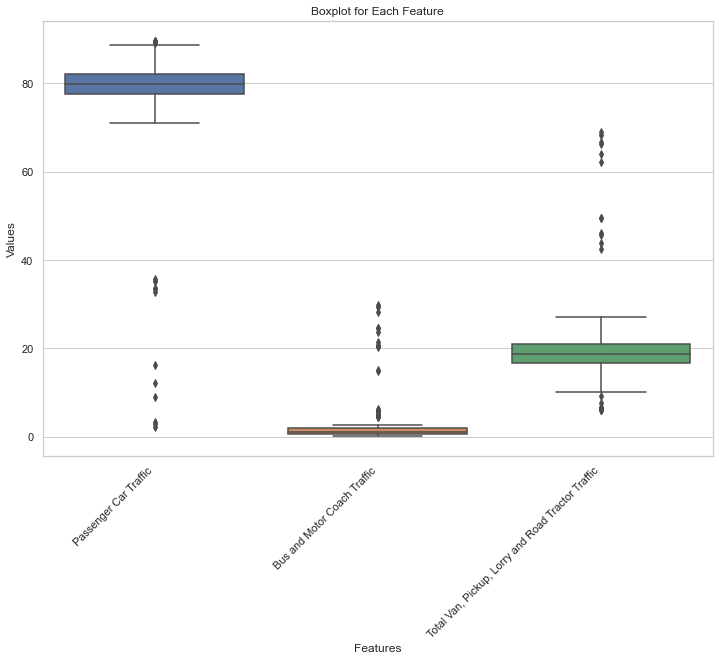

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop(columns=['Category', 'Year'])

# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data))
plt.title("Boxplot for Each Feature")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

If we look at the boxplot for each feature we see very different results after the feature transformation made so far. Let's see the same for the single countries: 

In [468]:
df

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0    Austria  2016              83.652140                     0.619617   
1    Austria  2017              83.591761                     0.624007   
2    Austria  2018              83.096423                     0.601927   
3    Austria  2019              82.437615                     0.606359   
4    Austria  2020              81.747229                     0.521233   
..       ...   ...                    ...                          ...   
151  Belgium  2017              78.861532                     0.604688   
152  Belgium  2018              79.103826                     0.609194   
153  Belgium  2019              79.103826                     0.609194   
154  Belgium  2020              79.103826                     0.609194   
155  Belgium  2021              79.103826                     0.609194   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
0                                            15.728243  
1                                            15.784232  
2                                            16.301651  
3                                            16.956026  
4                                            17.732909  
..                                                 ...  
151                                          20.532795  
152                                          20.286488  
153                                          20.286488  
154                                          20.286488  
155                                          20.286488  

[156 rows x 5 columns]

In [469]:
df.drop("Year", axis=1)

Category  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0    Austria              83.652140                     0.619617   
1    Austria              83.591761                     0.624007   
2    Austria              83.096423                     0.601927   
3    Austria              82.437615                     0.606359   
4    Austria              81.747229                     0.521233   
..       ...                    ...                          ...   
151  Belgium              78.861532                     0.604688   
152  Belgium              79.103826                     0.609194   
153  Belgium              79.103826                     0.609194   
154  Belgium              79.103826                     0.609194   
155  Belgium              79.103826                     0.609194   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
0                                            15.728243  
1                                            15.784232  
2                                            16.301651  
3                                            16.956026  
4                                            17.732909  
..                                                 ...  
151                                          20.532795  
152                                          20.286488  
153                                          20.286488  
154                                          20.286488  
155                                          20.286488  

[156 rows x 4 columns]

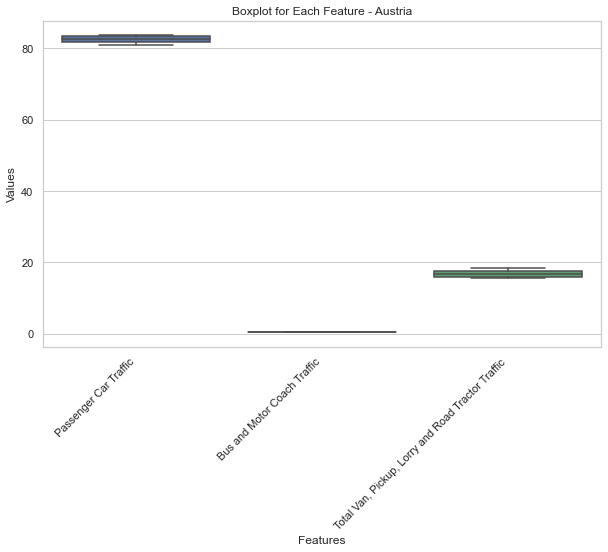

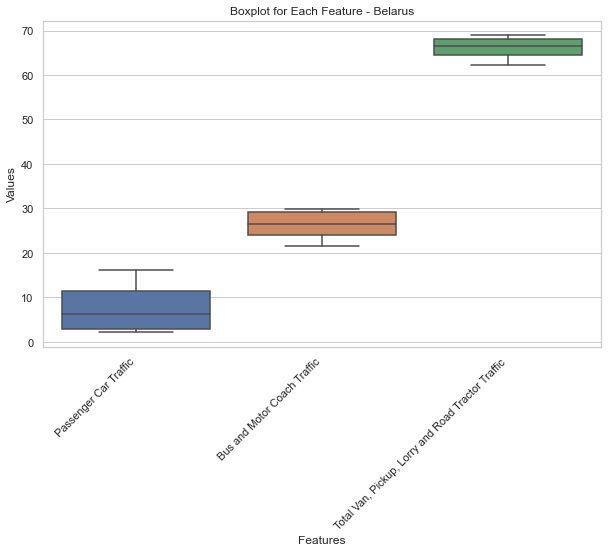

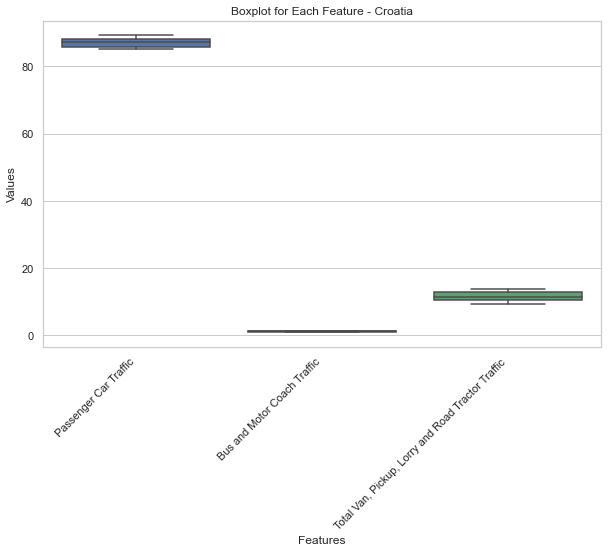

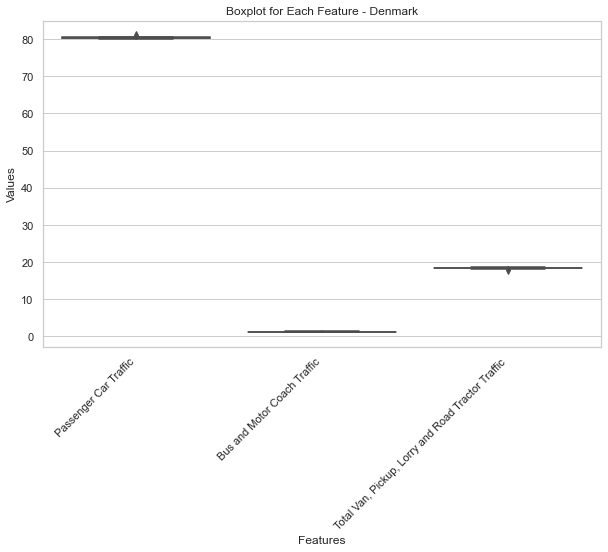

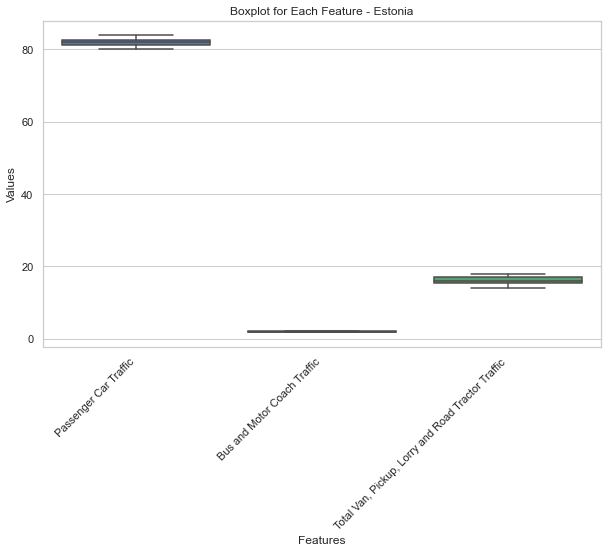

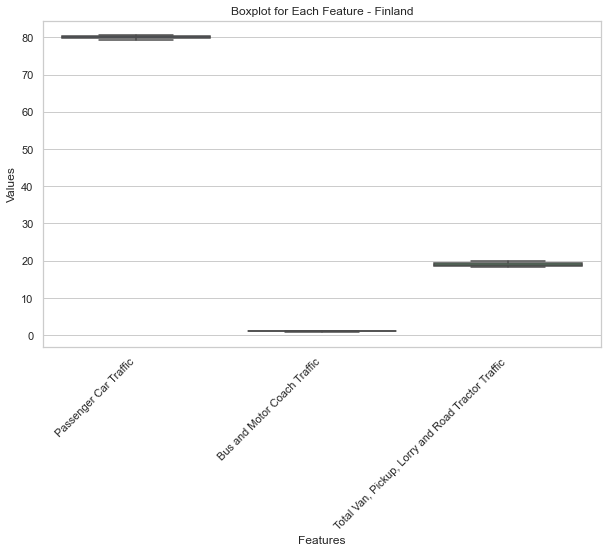

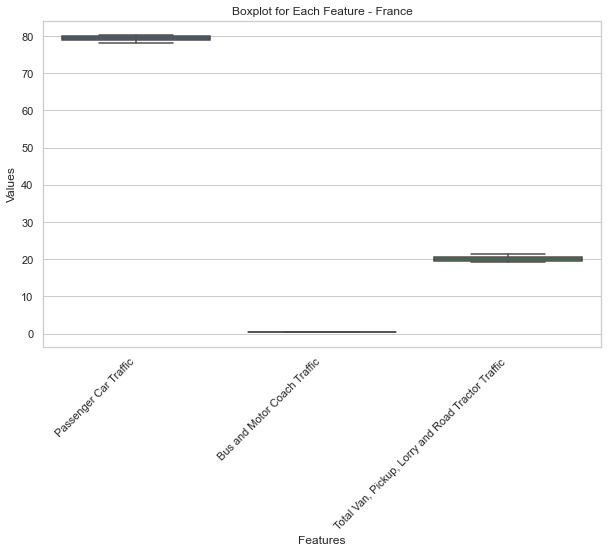

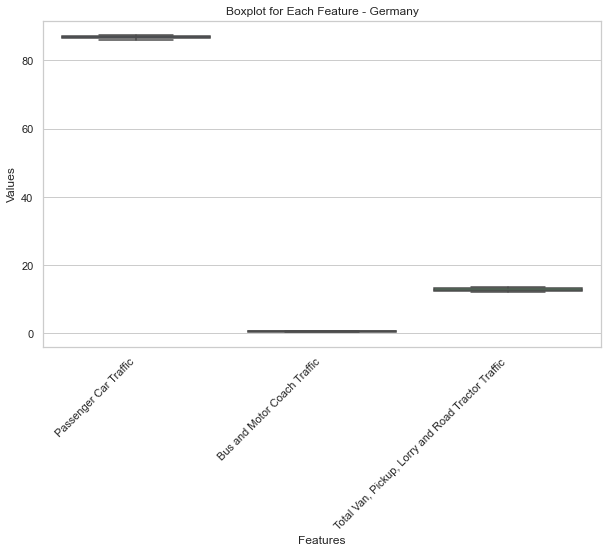

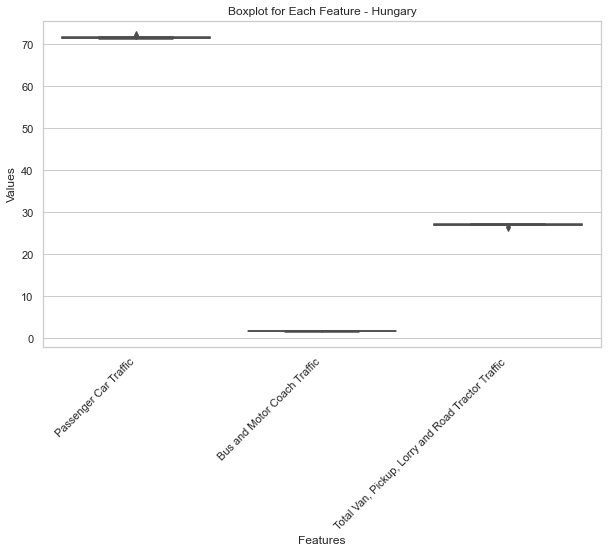

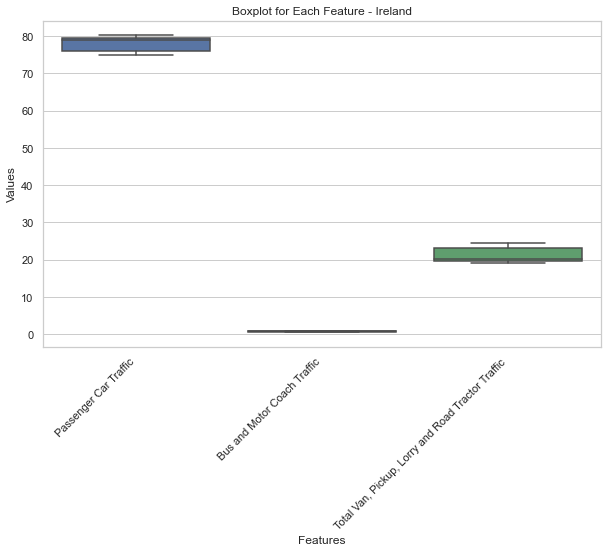

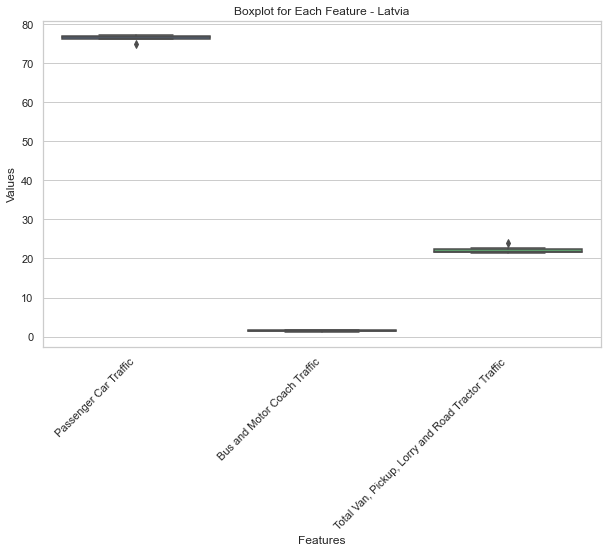

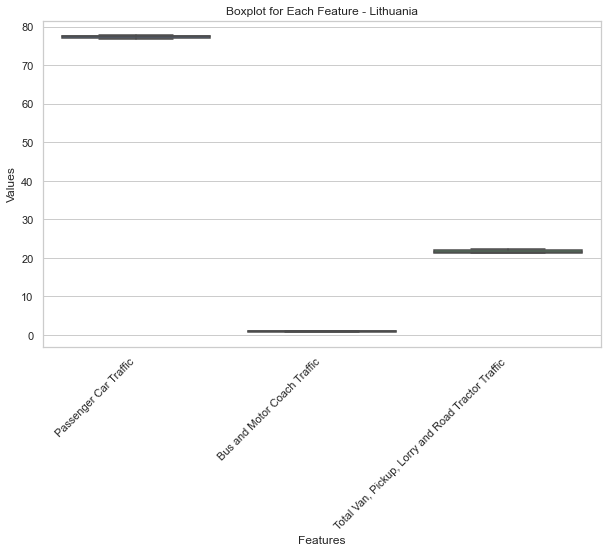

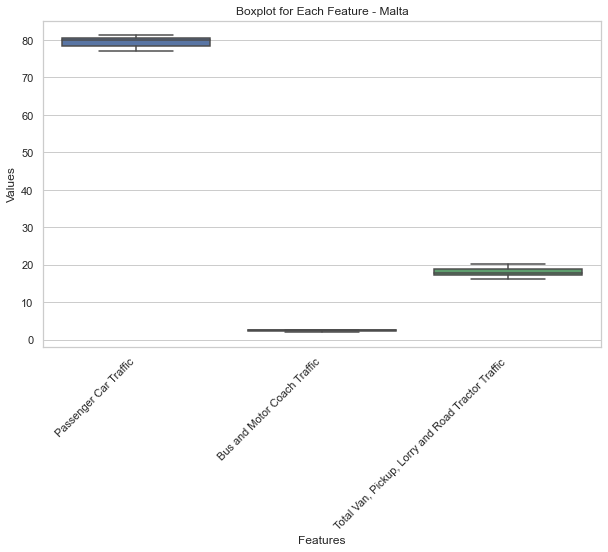

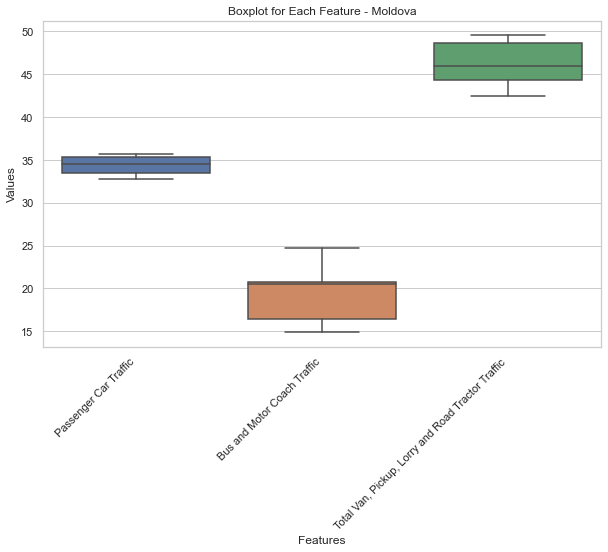

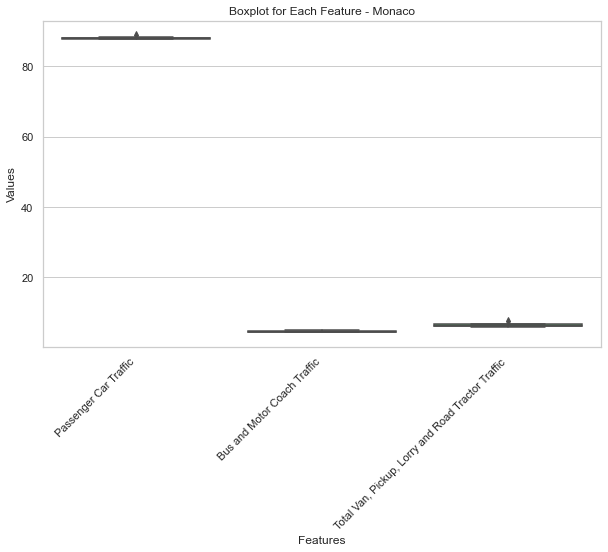

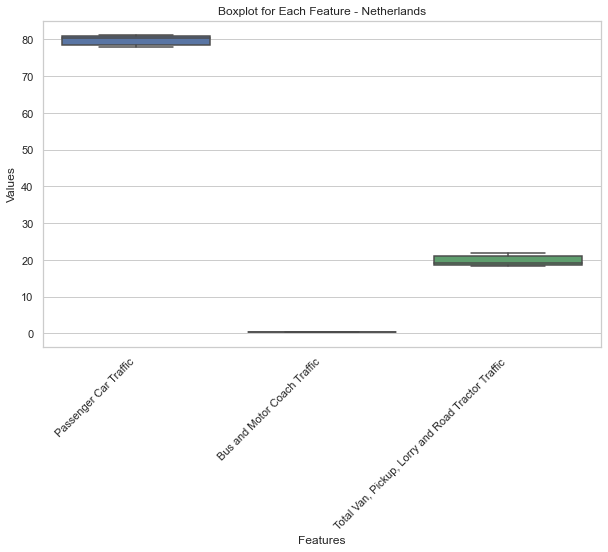

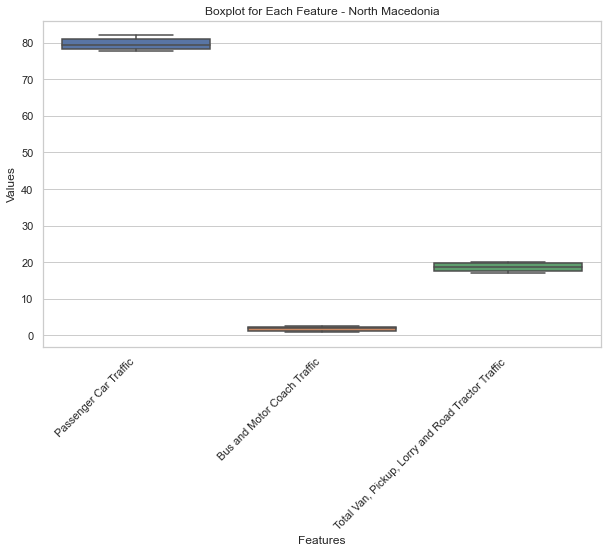

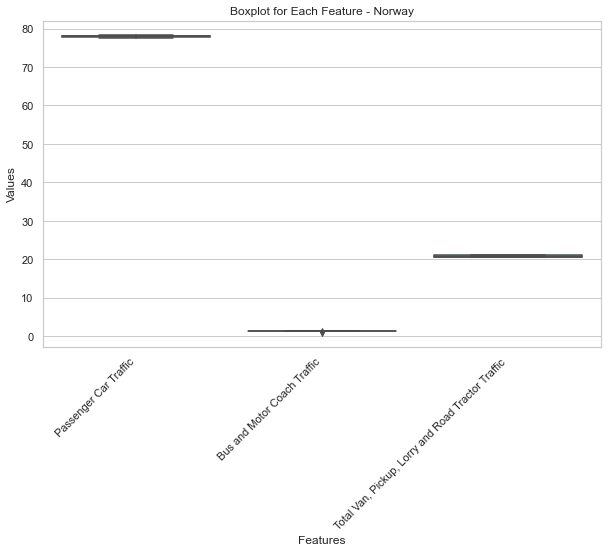

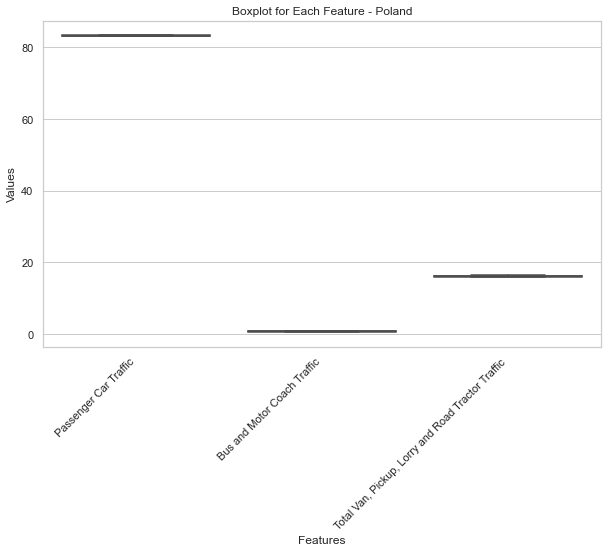

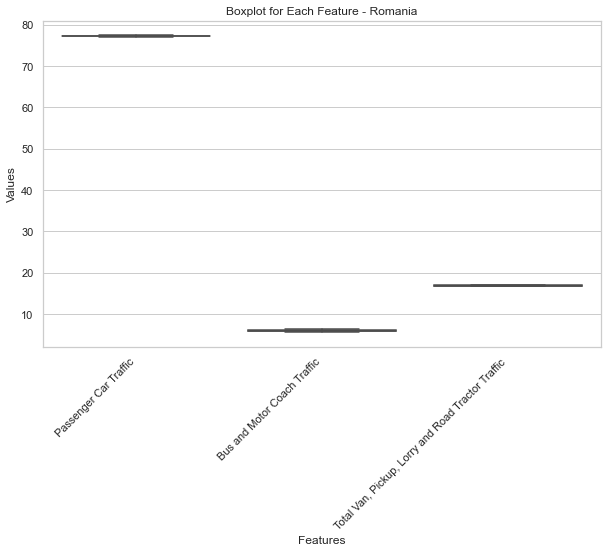

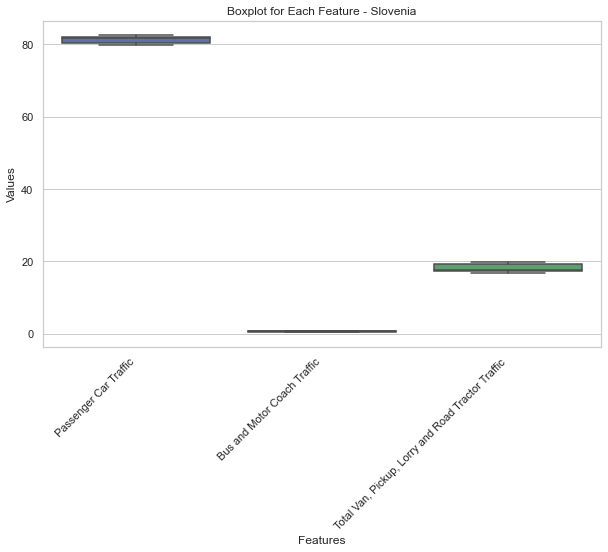

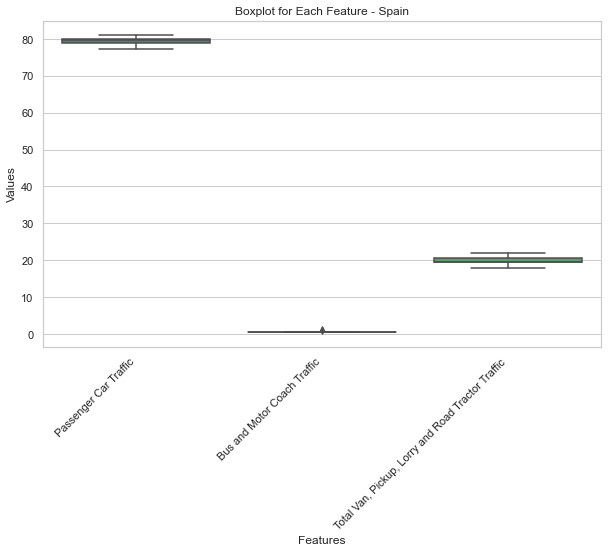

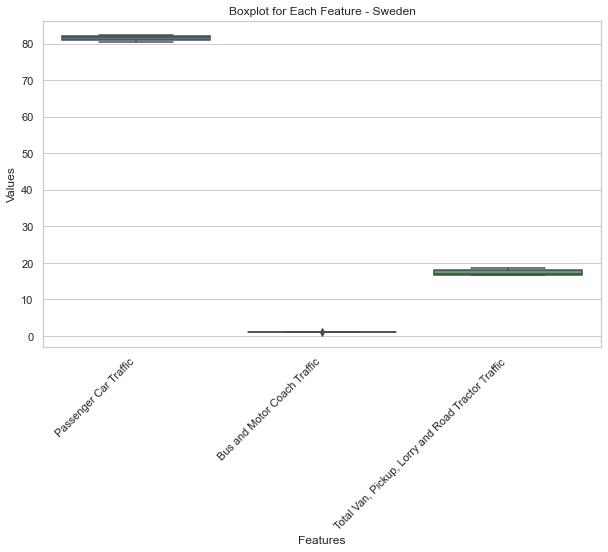

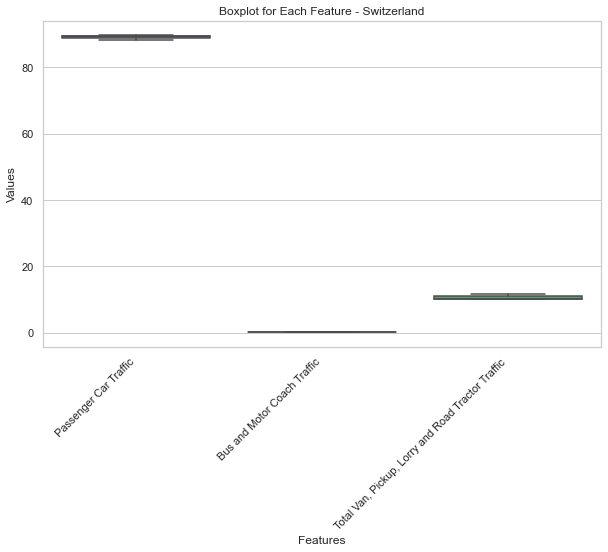

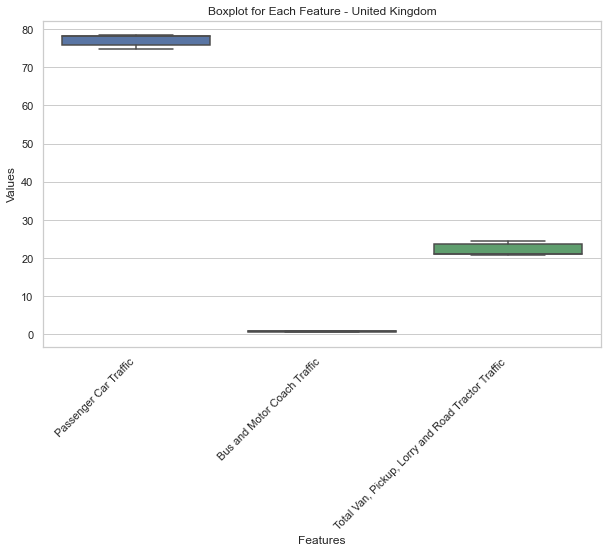

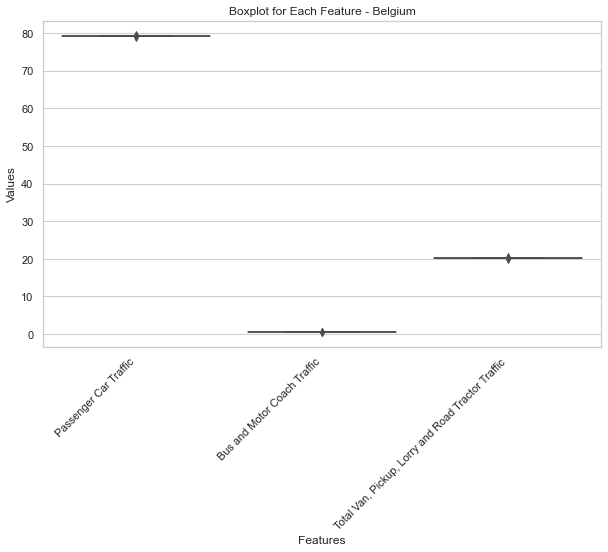

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop("Year", axis=1)

# Get unique categories
categories = df['Category'].unique()

# Create a separate boxplot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data[boxplot_data["Category"] == category].iloc[:,1:]))
    plt.title(f"Boxplot for Each Feature - {category}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Given that data is now between 0 and 100 (given that we are talking about %) it would make sense to scale the dataset using MinMaxScales:

In [471]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to be scaled
columns_to_scale = ['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform only the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [472]:
df

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0    Austria  2016               0.930971                     0.013921   
1    Austria  2017               0.930281                     0.014069   
2    Austria  2018               0.924616                     0.013323   
3    Austria  2019               0.917082                     0.013473   
4    Austria  2020               0.909188                     0.010596   
..       ...   ...                    ...                          ...   
151  Belgium  2017               0.876188                     0.013416   
152  Belgium  2018               0.878959                     0.013568   
153  Belgium  2019               0.878959                     0.013568   
154  Belgium  2020               0.878959                     0.013568   
155  Belgium  2021               0.878959                     0.013568   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
0                                             0.153818  
1                                             0.154708  
2                                             0.162941  
3                                             0.173352  
4                                             0.185713  
..                                                 ...  
151                                           0.230261  
152                                           0.226342  
153                                           0.226342  
154                                           0.226342  
155                                           0.226342  

[156 rows x 5 columns]

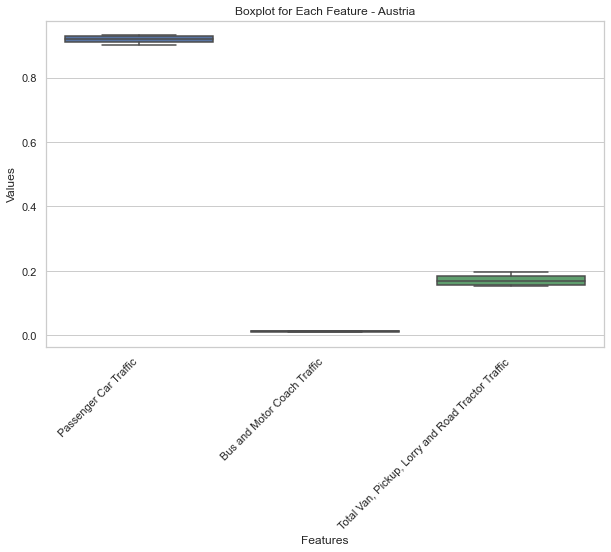

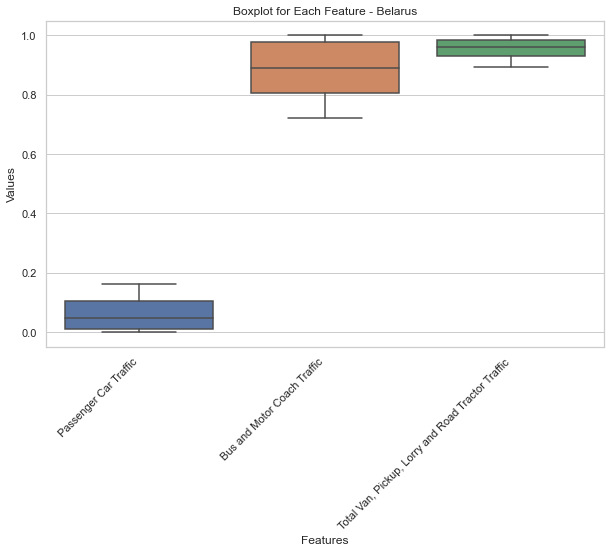

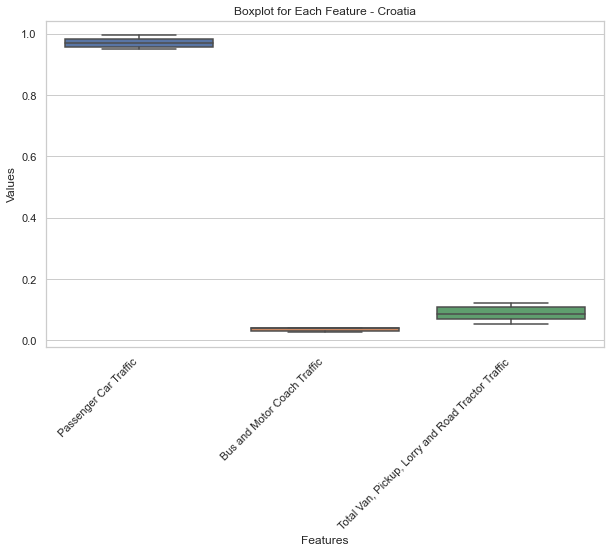

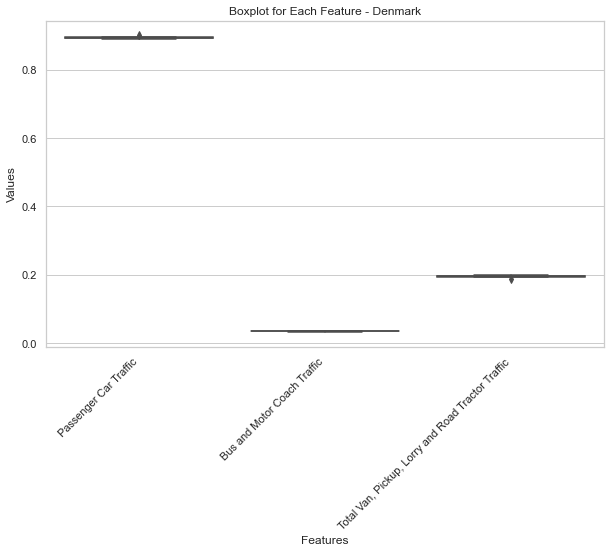

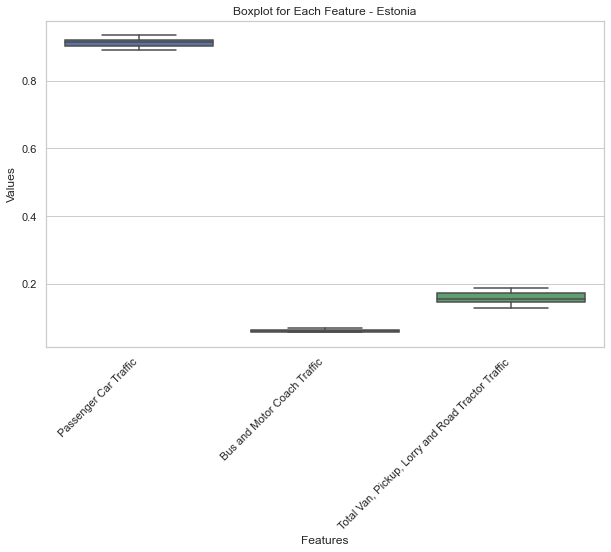

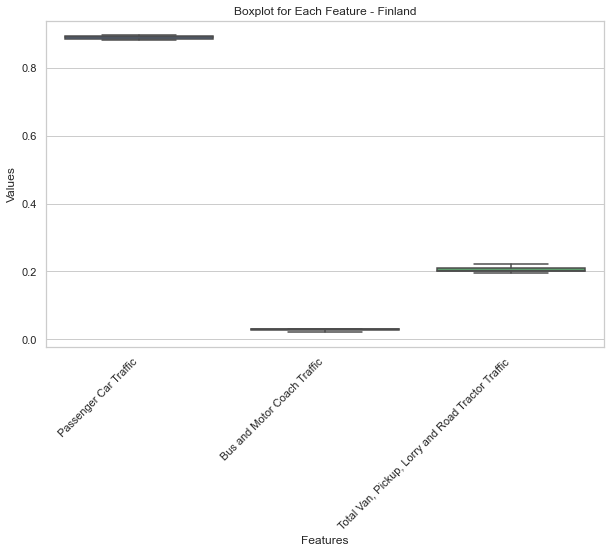

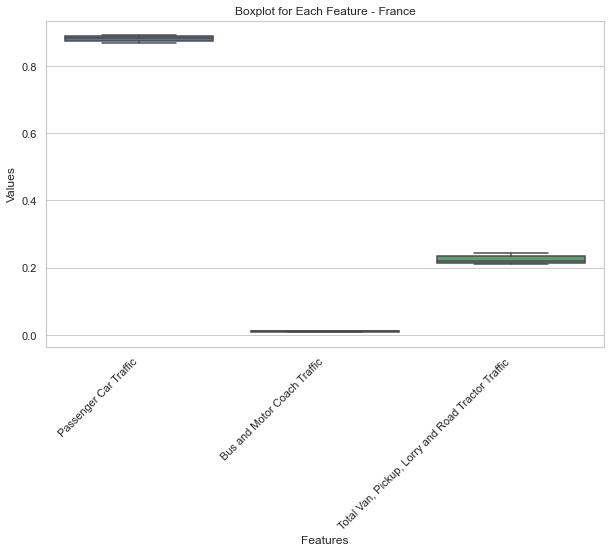

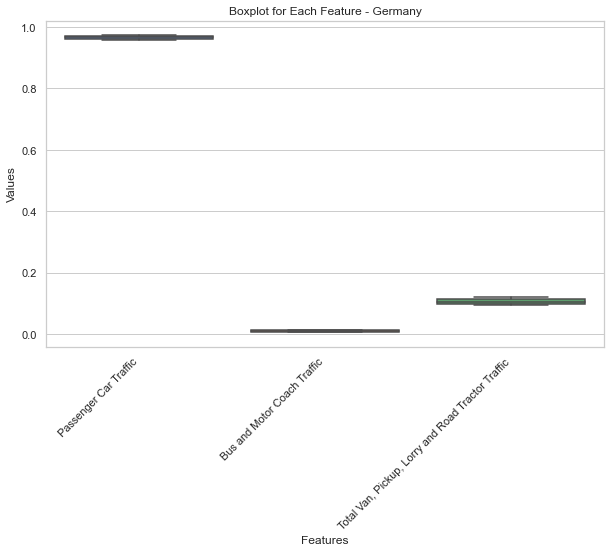

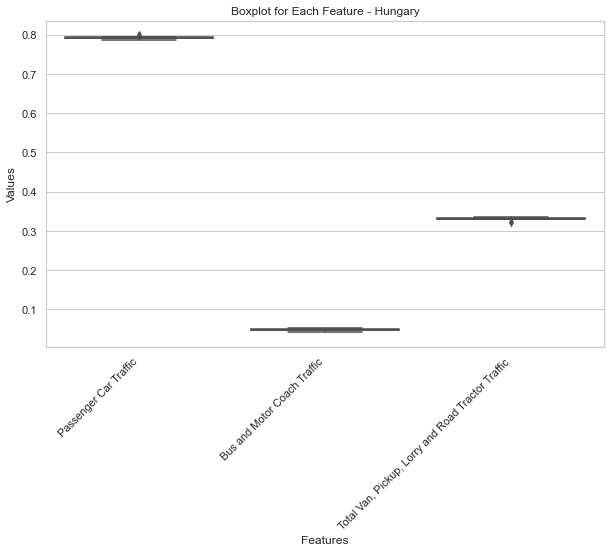

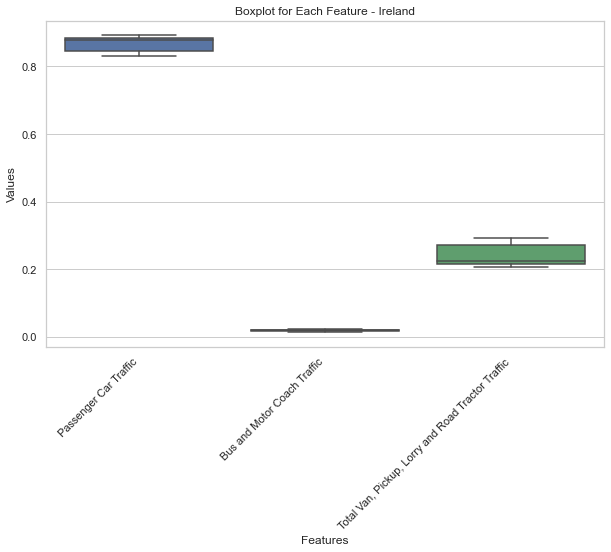

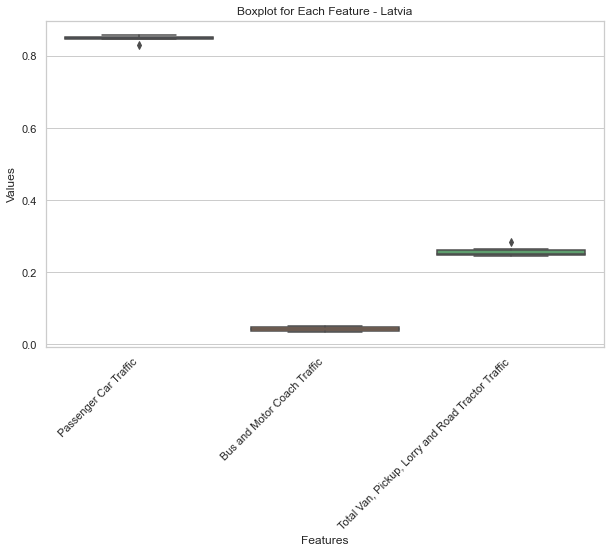

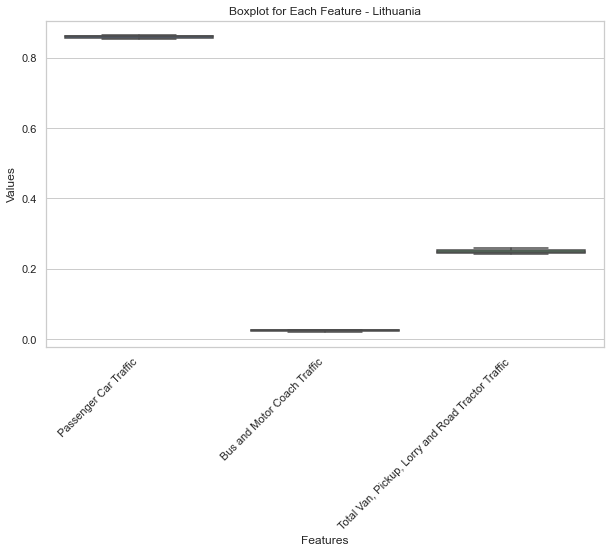

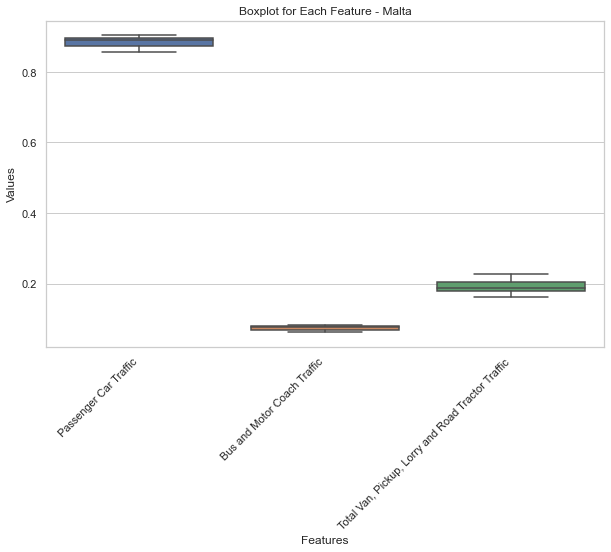

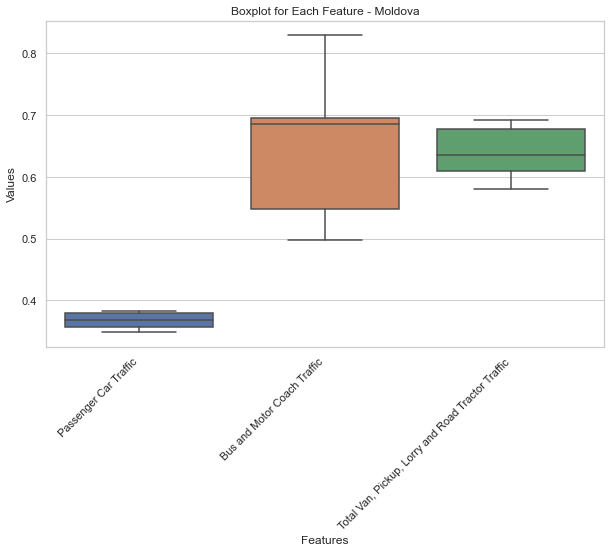

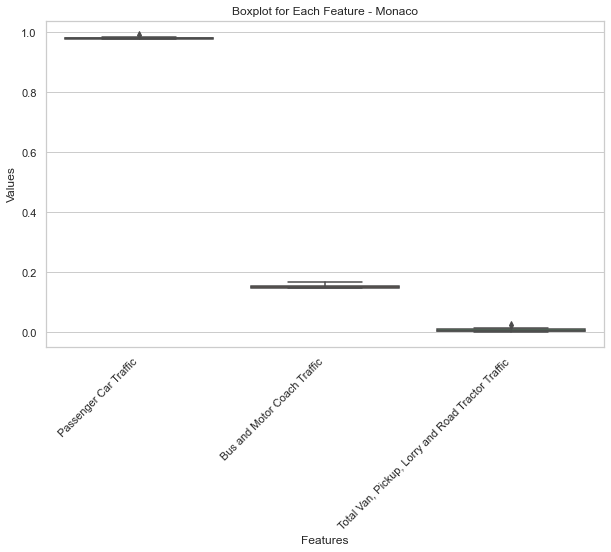

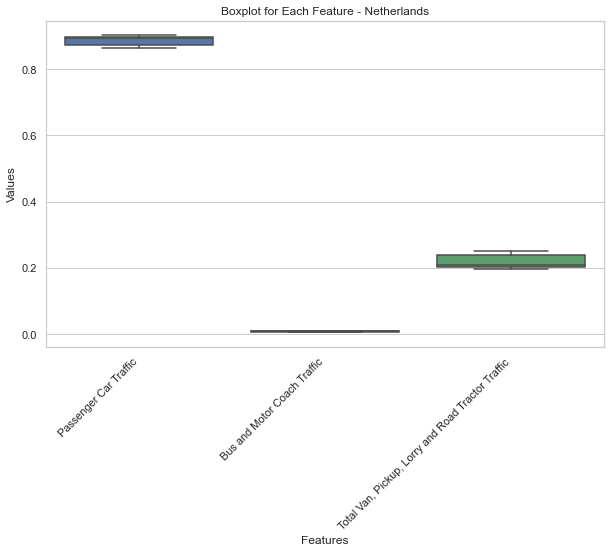

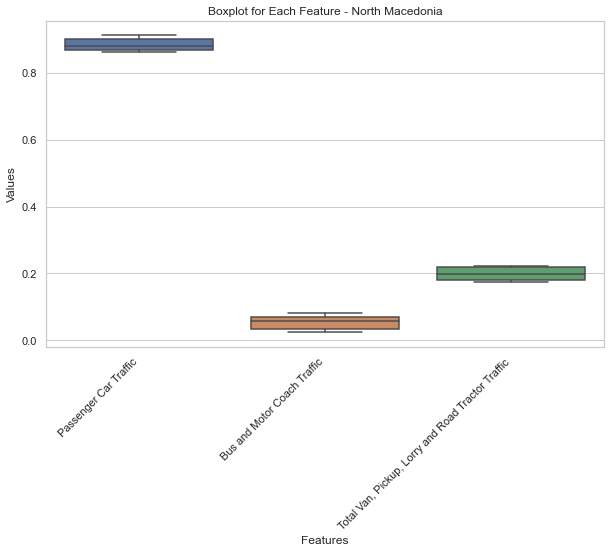

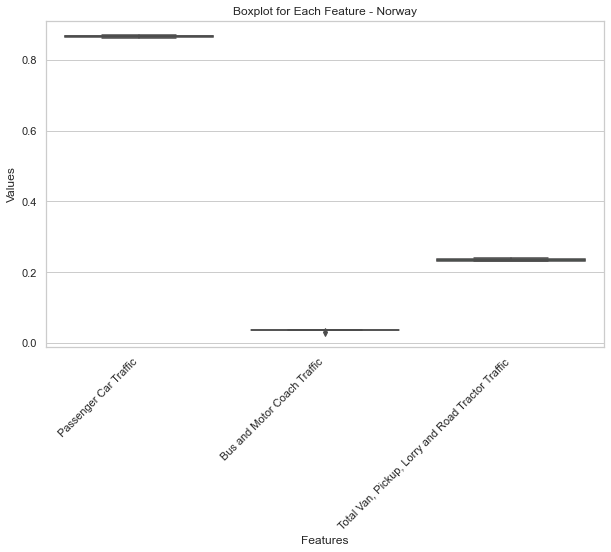

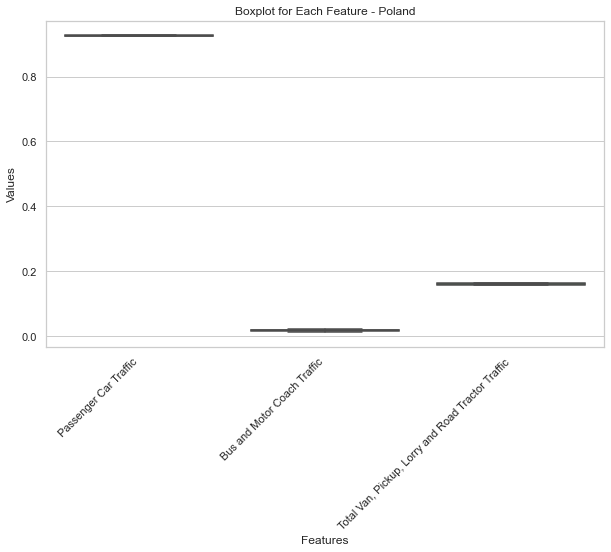

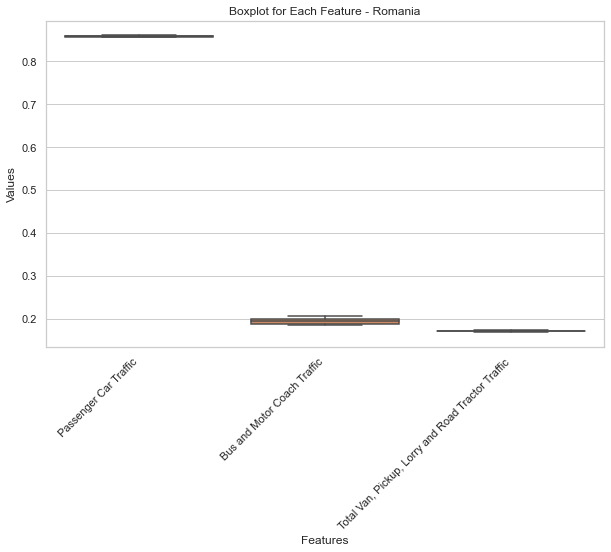

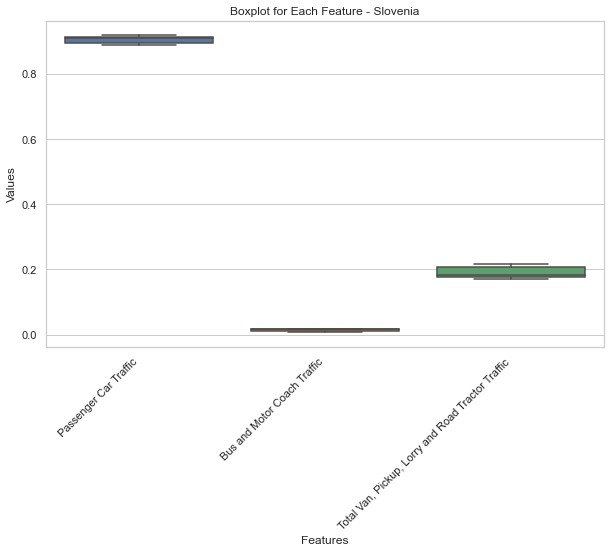

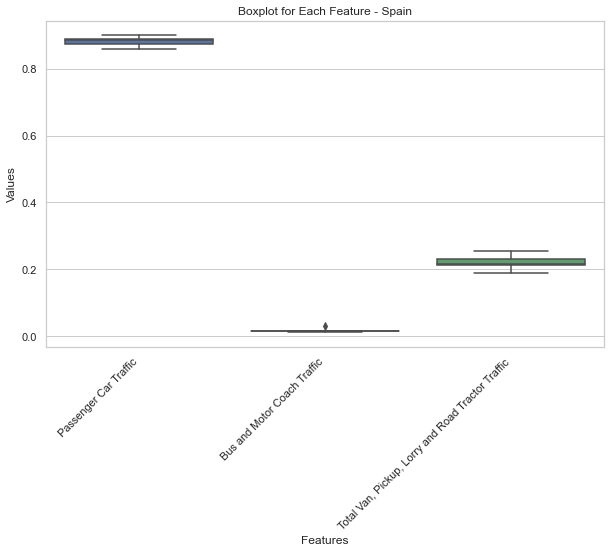

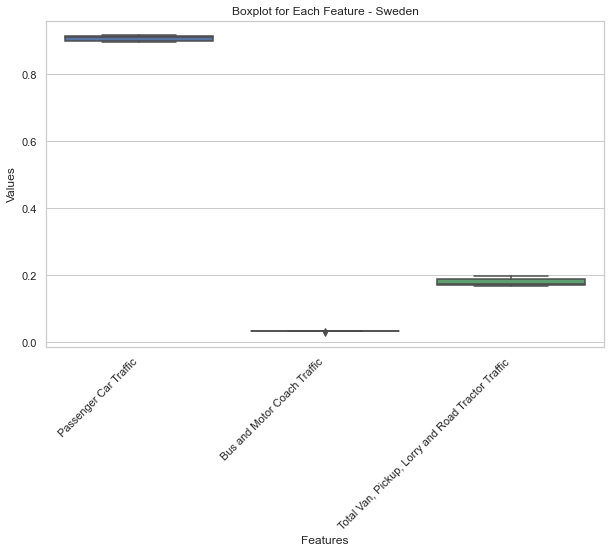

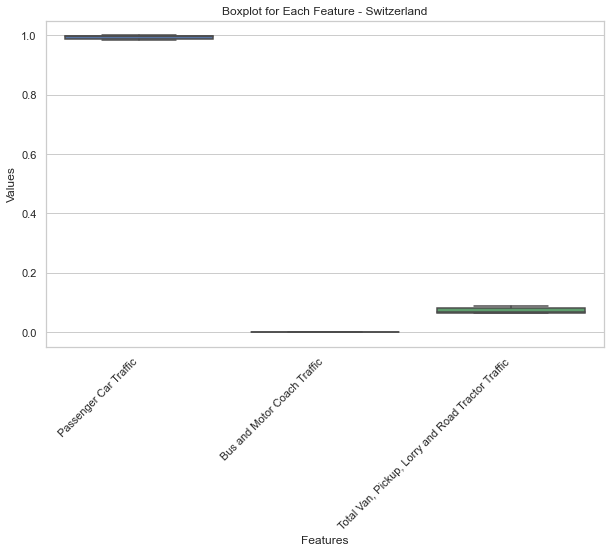

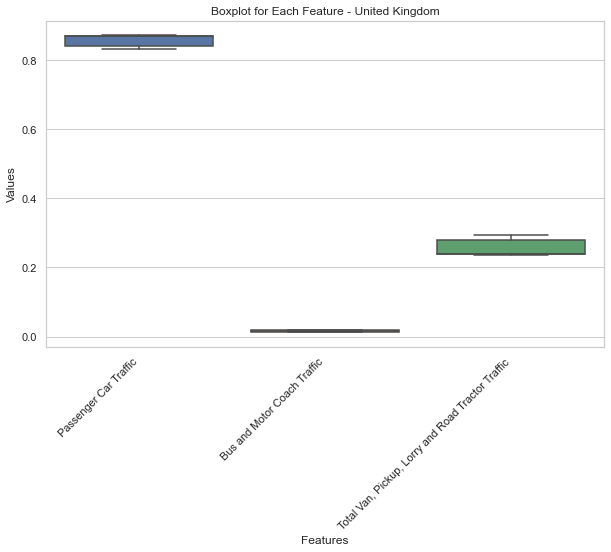

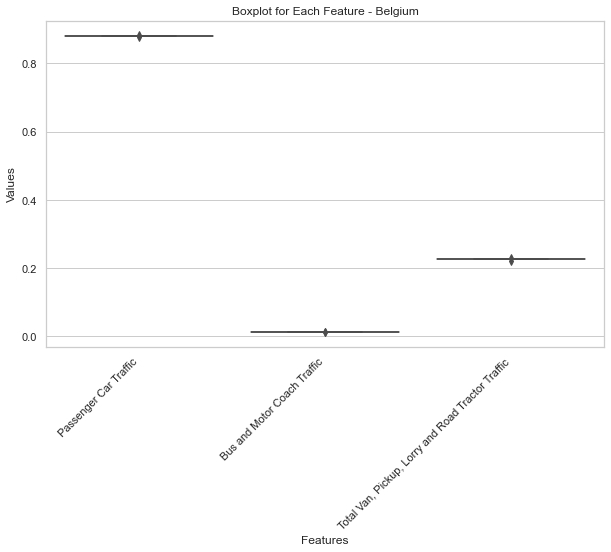

In [473]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop("Year", axis=1)

# Get unique categories
categories = df['Category'].unique()

# Create a separate boxplot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data[boxplot_data["Category"] == category].iloc[:,1:]))
    plt.title(f"Boxplot for Each Feature - {category}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Given that visible outliers are not extremely far from the box-plot, we decide to keep them in the dataset so that we avoid:
- The need to create more syntetich data
- Missing values for some countries in specifi years

Now that our dataset has been transformed and prepared, we can continue our work with some statistics.

# Statistics for Data Analytics Tasks 1-4

#### ●	Use descriptive statistics and appropriate visualisations in order to summarise the dataset(s) used, and to help justify the chosen models. [0-20]

Now that our dataset has been cleaned, let's look at it:

In [34]:
df.head()

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0  Austria  2016               0.930971                     0.013921   
1  Austria  2017               0.930281                     0.014069   
2  Austria  2018               0.924616                     0.013323   
3  Austria  2019               0.917082                     0.013473   
4  Austria  2020               0.909188                     0.010596   

   Total Van, Pickup, Lorry and Road Tractor Traffic  
0                                           0.153818  
1                                           0.154708  
2                                           0.162941  
3                                           0.173352  
4                                           0.185713

The head function gave us an idea of what the dataset looks like, let's check its dimension:

In [35]:
# Dysplay the shape of our dataset
df.shape

(156, 5)

Let's now see the type of each column, the presence of null values and unique values for each column:

In [36]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Category                                           156 non-null    object 
 1   Year                                               156 non-null    int64  
 2   Passenger Car Traffic                              156 non-null    float64
 3   Bus and Motor Coach Traffic                        156 non-null    float64
 4   Total Van, Pickup, Lorry and Road Tractor Traffic  156 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.3+ KB


Another important thing we want to double-check is the presence of null values:

In [37]:
# Display sum of null values for each column
df.isnull().sum()

Category                                             0
Year                                                 0
Passenger Car Traffic                                0
Bus and Motor Coach Traffic                          0
Total Van, Pickup, Lorry and Road Tractor Traffic    0
dtype: int64

Let's see which countries are represented by this dataset and for what years:

In [40]:
# Display of unique Countries
df.Category.unique()

array(['Austria', 'Belarus', 'Croatia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Hungary', 'Ireland', 'Latvia', 'Lithuania',
       'Malta', 'Moldova', 'Monaco', 'Netherlands', 'North Macedonia',
       'Norway', 'Poland', 'Romania', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Belgium'], dtype=object)

In [42]:
# Display of unique Years
df.Year.unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

So far we can say that our dataset contains transportation data  for European countries from 2016 to 2021.

Let's see the data distribution when using the describe function:

In [43]:
# Display data distribution
df.describe()

Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
count   156.000000             156.000000                   156.000000   
mean   2018.500000               0.843576                     0.095637   
std       1.713325               0.192802                     0.203472   
min    2016.000000               0.000000                     0.000000   
25%    2017.000000               0.861141                     0.013945   
50%    2018.500000               0.887486                     0.029216   
75%    2020.000000               0.914434                     0.057200   
max    2021.000000               1.000000                     1.000000   

       Total Van, Pickup, Lorry and Road Tractor Traffic  
count                                         156.000000  
mean                                            0.236475  
std                                             0.181279  
min                                             0.000000  
25%                                             0.168644  
50%                                             0.203518  
75%                                             0.239181  
max                                             1.000000

The data we see from the describe function is somehow interesting as it gives us an overview of how traffic by vehicle type is distributed across time and countries.

Let's look specifically at Ireland:

In [45]:
df.loc[df["Category"]=="Ireland"]

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
54  Ireland  2016               0.891713                     0.016772   
55  Ireland  2017               0.886555                     0.018563   
56  Ireland  2018               0.879613                     0.021027   
57  Ireland  2019               0.875842                     0.021748   
58  Ireland  2020               0.834539                     0.018825   
59  Ireland  2021               0.831206                     0.014442   

    Total Van, Pickup, Lorry and Road Tractor Traffic  
54                                           0.207096  
55                                           0.213429  
56                                           0.221927  
57                                           0.226835  
58                                           0.285677  
59                                           0.292379

In [47]:
df.loc[df["Category"]=="Ireland"].describe()

Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
count     6.000000               6.000000                     6.000000   
mean   2018.500000               0.866578                     0.018563   
std       1.870829               0.026699                     0.002701   
min    2016.000000               0.831206                     0.014442   
25%    2017.250000               0.844865                     0.017220   
50%    2018.500000               0.877728                     0.018694   
75%    2019.750000               0.884820                     0.020477   
max    2021.000000               0.891713                     0.021748   

       Total Van, Pickup, Lorry and Road Tractor Traffic  
count                                           6.000000  
mean                                            0.241224  
std                                             0.037708  
min                                             0.207096  
25%                                             0.215554  
50%                                             0.224381  
75%                                             0.270967  
max                                             0.292379

Looking at years available it seems that Ireland's traffic is composed by:
- A mean of 86% for passenger traffic, 2% for bus and motor coach traffic and 24% for other four wheeled vehicles
- A max of 89% for passenger traffic, 2% for bus and motor coach traffic and 29% for other four wheeled vehicles
- A min of 83% for passenger traffic, 1% for bus and motor coach traffic and 21% for other four wheeled vehicles

Let's visualize the trend of Ireland traffic by vehicle type over time:

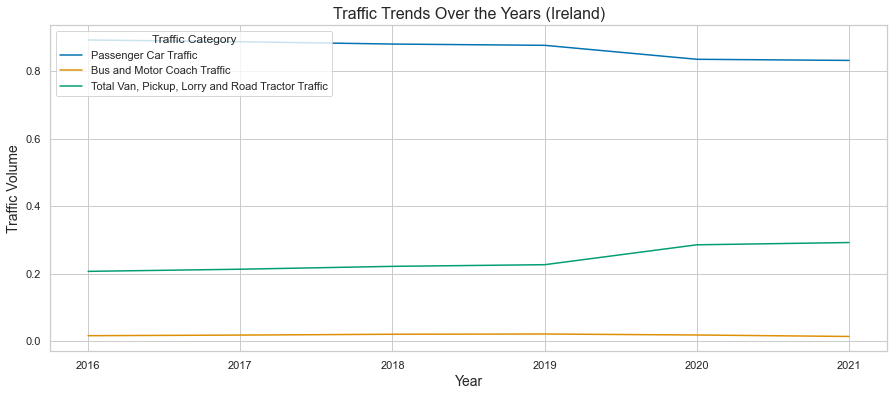

In [54]:
# Filter the DataFrame to extract vehicle categories for Ireland
passenger_df = df[df['Category'] == 'Ireland'][["Passenger Car Traffic", "Year"]]
bus_df = df[df['Category'] == 'Ireland'][["Bus and Motor Coach Traffic", "Year"]]
other_df = df[df['Category'] == 'Ireland'][["Total Van, Pickup, Lorry and Road Tractor Traffic", "Year"]]

# Create separate figures for better clarity
fig, ax = plt.subplots(figsize=(15, 6))

# Use a color palette that is colorblind-friendly
palette = sns.color_palette("colorblind")

# Plot separate lines for passenger car, bus, and other traffic
sns.lineplot(x='Year', y='Passenger Car Traffic', data=passenger_df, label="Passenger Car Traffic", color=palette[0], ax=ax)
sns.lineplot(x='Year', y='Bus and Motor Coach Traffic', data=bus_df, label="Bus and Motor Coach Traffic", color=palette[1], ax=ax)
sns.lineplot(x='Year', y='Total Van, Pickup, Lorry and Road Tractor Traffic', data=other_df, label="Total Van, Pickup, Lorry and Road Tractor Traffic", color=palette[2], ax=ax)

# Increase the font size for labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Traffic Volume', fontsize=14)
ax.set_title('Traffic Trends Over the Years (Ireland)', fontsize=16)

# Improve legend placement and add a title
ax.legend(title='Traffic Category', title_fontsize='12', loc='upper left')

plt.show()

Even though Bus and Motor coach traffic has been quite steady if we compare it to the other two types of traffic, it's interesting to see how passenger car traffic has decreased since 2019. This might indeed be related to Covid.

Let's now better visualize describe results we were previously looking at:

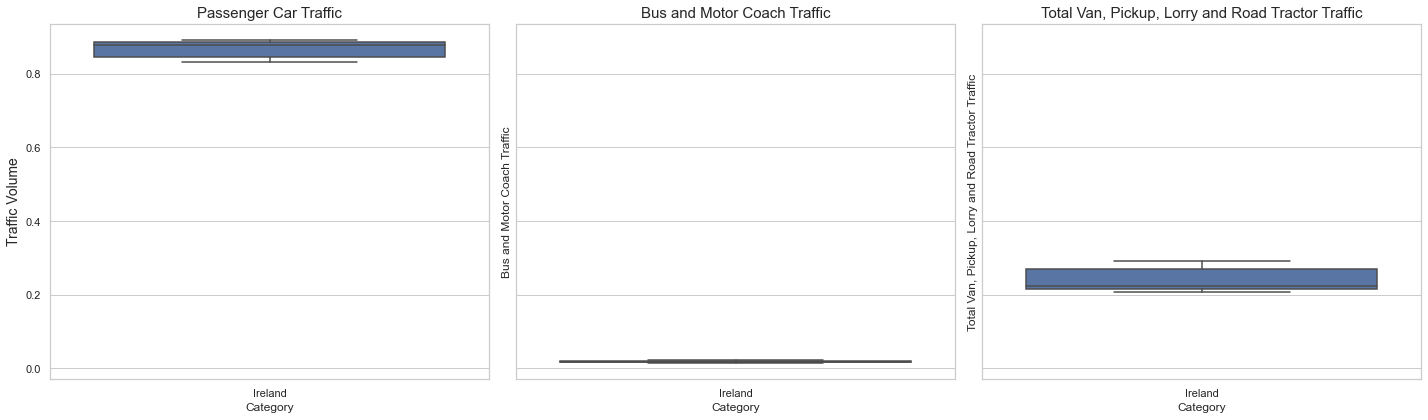

In [63]:
# Filter the DataFrame to extract data for Ireland
ireland_df = df[df['Category'] == 'Ireland']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)

# Create boxplots for each column
sns.boxplot(x='Category', y='Passenger Car Traffic', data=ireland_df, ax=axes[0])
sns.boxplot(x='Category', y='Bus and Motor Coach Traffic', data=ireland_df, ax=axes[1])
sns.boxplot(x='Category', y='Total Van, Pickup, Lorry and Road Tractor Traffic', data=ireland_df, ax=axes[2])

# Set titles for each subplot
axes[0].set_title('Passenger Car Traffic', fontsize=15)
axes[1].set_title('Bus and Motor Coach Traffic', fontsize=15)
axes[2].set_title('Total Van, Pickup, Lorry and Road Tractor Traffic', fontsize=15)

# Set common y-axis label
axes[0].set_ylabel('Traffic Volume', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Let's try to rebuild the graphs giving their own scale to the y axis:

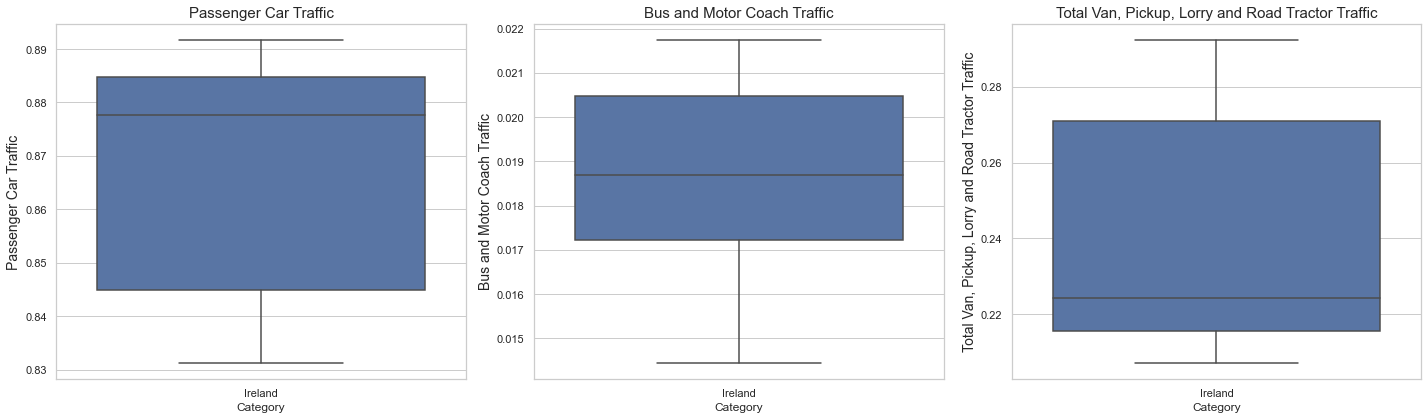

In [64]:
# Filter the DataFrame to extract data for Ireland
ireland_df = df[df['Category'] == 'Ireland']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Create boxplots for each column with individual y-axes
sns.boxplot(x='Category', y='Passenger Car Traffic', data=ireland_df, ax=axes[0])
sns.boxplot(x='Category', y='Bus and Motor Coach Traffic', data=ireland_df, ax=axes[1])
sns.boxplot(x='Category', y='Total Van, Pickup, Lorry and Road Tractor Traffic', data=ireland_df, ax=axes[2])

# Set titles for each subplot
axes[0].set_title('Passenger Car Traffic', fontsize=15)
axes[1].set_title('Bus and Motor Coach Traffic', fontsize=15)
axes[2].set_title('Total Van, Pickup, Lorry and Road Tractor Traffic', fontsize=15)

# Set individual y-axis labels
axes[0].set_ylabel('Passenger Car Traffic', fontsize=14)
axes[1].set_ylabel('Bus and Motor Coach Traffic', fontsize=14)
axes[2].set_ylabel('Total Van, Pickup, Lorry and Road Tractor Traffic', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Interestingly we see that Bus and Motor Coach Traffic hasn't been changing too much over time, with the mean right at the middle and a low standard deviation.

The situation for the two others vehicle type is quite different to the bus one and opposite to each other (predictable given that we are analysing %). Let's now calculate mean, median, mode and standard deviationf or the different traffic by vechicles columns:

In [69]:
median_passenger_traffic = ireland_df["Passenger Car Traffic"].sum()/2
median_bus_traffic = ireland_df["Bus and Motor Coach Traffic"].sum()/2
median_other_traffic = ireland_df["Total Van, Pickup, Lorry and Road Tractor Traffic"].sum()/2

print(f"Median of Passenger Car Traffic % in Ireland is {median_passenger_traffic}")
print(f"Median of Bus and Motor Coach Traffic % in Ireland is {median_bus_traffic}")
print(f"Median of Total Van, Pickup, Lorry and Road Tractor Traffic % in Ireland is {median_other_traffic}")

Median of Passenger Car Traffic % in Ireland is 2.599734157860812
Median of Bus and Motor Coach Traffic % in Ireland is 0.05568882856304127
Median of Total Van, Pickup, Lorry and Road Tractor Traffic % in Ireland is 0.7236719942389531


In [79]:
import pandas as pd

# Assuming your DataFrame is named df
# Extract columns 2, 3, and 4
selected_columns = ireland_df.iloc[:, 2:5]

# Compute Mean, Median, Mode, and Standard Deviation
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]  # Mode may have multiple values, so take the first one
std_dev_values = selected_columns.std()

# Create a summary DataFrame
summary_ireland_df = pd.DataFrame({
    'Mean': mean_values*100,
    'Median': median_values*100,
    'Mode': mode_values*100,
    'Standard Deviation': std_dev_values*100
})

In [80]:
summary_ireland_df

Mean     Median  \
Passenger Car Traffic                              86.657805  87.772757   
Bus and Motor Coach Traffic                         1.856294   1.869431   
Total Van, Pickup, Lorry and Road Tractor Traffic  24.122400  22.438121   

                                                        Mode  \
Passenger Car Traffic                              83.120605   
Bus and Motor Coach Traffic                         1.444190   
Total Van, Pickup, Lorry and Road Tractor Traffic  20.709604   

                                                   Standard Deviation  
Passenger Car Traffic                                        2.669924  
Bus and Motor Coach Traffic                                  0.270087  
Total Van, Pickup, Lorry and Road Tractor Traffic            3.770837

Let's now see how this data compares with rest of Europe:

In [82]:
no_ireland_df = df[df['Category'] != 'Ireland']

In [83]:
no_ireland_df

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0    Austria  2016               0.930971                     0.013921   
1    Austria  2017               0.930281                     0.014069   
2    Austria  2018               0.924616                     0.013323   
3    Austria  2019               0.917082                     0.013473   
4    Austria  2020               0.909188                     0.010596   
..       ...   ...                    ...                          ...   
151  Belgium  2017               0.876188                     0.013416   
152  Belgium  2018               0.878959                     0.013568   
153  Belgium  2019               0.878959                     0.013568   
154  Belgium  2020               0.878959                     0.013568   
155  Belgium  2021               0.878959                     0.013568   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
0                                             0.153818  
1                                             0.154708  
2                                             0.162941  
3                                             0.173352  
4                                             0.185713  
..                                                 ...  
151                                           0.230261  
152                                           0.226342  
153                                           0.226342  
154                                           0.226342  
155                                           0.226342  

[150 rows x 5 columns]

In [84]:
# Assuming your DataFrame is named df
# Extract columns 2, 3, and 4
selected_columns = no_ireland_df.iloc[:, 2:5]

# Compute Mean, Median, Mode, and Standard Deviation
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]  # Mode may have multiple values, so take the first one
std_dev_values = selected_columns.std()

# Create a summary DataFrame
summary_no_ireland_df = pd.DataFrame({
    'Mean': mean_values*100,
    'Median': median_values*100,
    'Mode': mode_values*100,
    'Standard Deviation': std_dev_values*100
})

In [85]:
summary_no_ireland_df

Mean     Median  \
Passenger Car Traffic                              84.265596  88.825158   
Bus and Motor Coach Traffic                         9.871954   3.062681   
Total Van, Pickup, Lorry and Road Tractor Traffic  23.628519  19.998857   

                                                        Mode  \
Passenger Car Traffic                              87.895908   
Bus and Motor Coach Traffic                         1.356844   
Total Van, Pickup, Lorry and Road Tractor Traffic  22.634184   

                                                   Standard Deviation  
Passenger Car Traffic                                       19.652827  
Bus and Motor Coach Traffic                                 20.692767  
Total Van, Pickup, Lorry and Road Tractor Traffic           18.476125

From the data extracted, we can observe the following:

- Passenger Car Traffic: The mean and median values for passenger car traffic in Ireland are higher than the mean for Europe excluding Ireland, but slightly lower than the European median. This suggests that Ireland has a higher reliance on passenger cars compared to the average European country, but not the highest. The standard deviation is significantly lower in Ireland, indicating less variability in passenger car traffic.


- Bus and Motor Coach Traffic: The mean and median values for bus and motor coach traffic in Ireland are significantly lower than in Europe excluding Ireland. This could suggest a lower reliance on public transportation in Ireland. The standard deviation is also much lower in Ireland, indicating less variability in bus and motor coach traffic.


- Total Van, Pickup, Lorry and Road Tractor Traffic: The mean value for this category in Ireland is slightly higher than the mean for Europe excluding Ireland, but the median is higher in Europe. This suggests that Ireland might have a higher reliance on these types of vehicles compared to the average European country, but not the highest. The standard deviation is lower in Ireland, indicating less variability in this type of traffic.


- Possible causes for these differences could be related to the geographical, economic, and infrastructural characteristics of Ireland. For example, Ireland’s smaller size and population density could lead to a higher reliance on personal vehicles (passenger cars) and less on public transportation (buses and motor coaches). Economic factors such as income levels, cost of vehicle ownership, and cost of public transportation could also play a role. Infrastructure factors such as the availability and quality of public transportation, road networks, and traffic congestion could also influence these patterns.

#### ●	Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values (e.g., if you were working with public transport, you could find a confidence interval for the population proportion of users commuting to Dublin by train). [0-20]

In [53]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [127]:
# We want to find a confidence interval for the mean of "Bus and Motor Coach Traffic" in Ireland
bus_traffic_data_dublin = ireland_df['Bus and Motor Coach Traffic']

# Calculate the confidence interval
confidence_interval = stats.norm.interval(0.95, loc=np.mean(bus_traffic_data_dublin), scale=np.std(bus_traffic_data_dublin))

print("95% Confidence Interval for Bus Car Traffic Mean:", confidence_interval)

95% Confidence Interval for Bus Car Traffic Mean: (0.013730561054052333, 0.023395324654641843)


In [90]:
t_stat, p_value = stats.ttest_1samp(bus_traffic_data_dublin, 0.05)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -28.511084529659996
P-value: 9.943239064306657e-07


Interpretation of Confidence Interval:
- The confidence interval provides a range in which we can be reasonably confident that the true population mean lies.

Interpretation of p-value from t-Test:
- The p-value from the t-test is compared to a significance level (commonly 0.05) to determine if there is enough evidence to reject the null hypothesis.

In this case, the small p-value (below 0.05) suggests that there is evidence to reject the null hypothesis that the mean of "Bus and Motor Coach Traffic" is equal to 5%.

Let's try to do the same test for 2%:

In [93]:
t_stat, p_value = stats.ttest_1samp(bus_traffic_data_dublin, 0.02)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.303304490742629
P-value: 0.24925528024925608


Interpretation:
- The t-statistic of -1.30 is the test statistic, indicating how many standard errors the sample mean of Dublin is from the assumed population mean of 0.015.
- The p-value of 0.25 is the probability of observing such an extreme t-statistic under the assumption that the null hypothesis (mean equals 300) is true.

Conclusion:
- With a p-value greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis.
- There is not enough evidence to suggest that the mean of "Bus and Motor Coach Traffic" in Dublin is significantly different from 2% at a 5% significance level.

Therefore, based on this analysis, we do not have sufficient statistical evidence to conclude that the mean bus and motor coach traffic in Dublin differs significantly from 2%.

And in fact, if we look at result over the years we can see that min is 1.4% and max 2.2% with a mean of 1.9%

In [98]:
ireland_df[["Year", "Bus and Motor Coach Traffic"]].describe()

Year  Bus and Motor Coach Traffic
count     6.000000                     6.000000
mean   2018.500000                     0.018563
std       1.870829                     0.002701
min    2016.000000                     0.014442
25%    2017.250000                     0.017220
50%    2018.500000                     0.018694
75%    2019.750000                     0.020477
max    2021.000000                     0.021748

Let's also visualize this Confidence interval:

DataFrame with Confidence Intervals:
                                                  Lower Bound Upper Bound
Passenger Car Traffic                                0.814248    0.918908
Bus and Motor Coach Traffic                          0.013269    0.023857
Total Van, Pickup, Lorry and Road Tractor Traffic    0.167317    0.315131


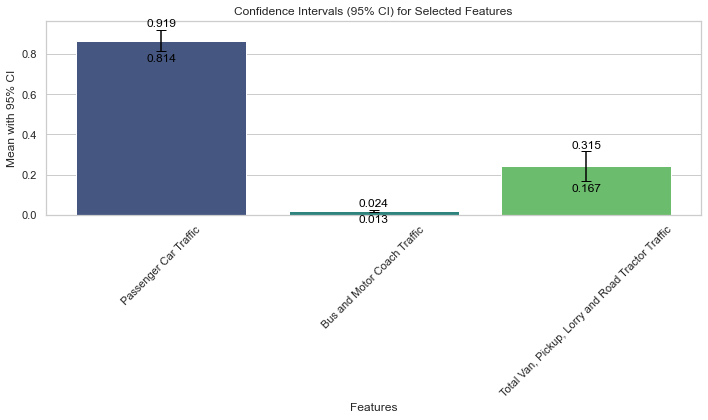

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming your DataFrame is named ireland_df
# Replace 'your_dataframe.csv' with the actual file or DataFrame
# containing your data.
# ireland_df = pd.read_csv('your_dataframe.csv')

# Select the features for which you want to calculate confidence intervals
features = ['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic']

# Create a new DataFrame to store confidence intervals
ci_df = pd.DataFrame(index=features, columns=['Lower Bound', 'Upper Bound'])

# Calculate confidence intervals for each feature using stats.norm.interval
for feature in features:
    mean = ireland_df[feature].mean()
    std_dev = ireland_df[feature].std()
    confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std_dev)
    ci_df.loc[feature] = confidence_interval

# Display the DataFrame with confidence intervals
print("DataFrame with Confidence Intervals:")
print(ci_df)

# Plotting the graph with numbers near the CI range
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ci_df.index, y=(ci_df['Lower Bound'] + ci_df['Upper Bound']) / 2, palette="viridis")

# Add numeric values near the CI range
for index, feature in enumerate(features):
    lower_bound, upper_bound = ci_df.loc[feature]
    plt.text(index, upper_bound + 0.005, f'{upper_bound:.3f}', ha='center', va='bottom', color='black')
    plt.text(index, lower_bound - 0.01, f'{lower_bound:.3f}', ha='center', va='top', color='black')

plt.errorbar(x=ci_df.index, y=(ci_df['Lower Bound'] + ci_df['Upper Bound']) / 2,
             yerr=(ci_df['Upper Bound'] - ci_df['Lower Bound']) / 2,
             fmt='none', color='black', capsize=5)

plt.title("Confidence Intervals (95% CI) for Selected Features")
plt.ylabel("Mean with 95% CI")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The width of the confidence interval reflects the precision of the estimate. A narrower interval means that the estimate is more precise, while a wider interval means that the estimate is less precise.

In the results obtained for Ireland, the confidence interval for bus and motor coach traffic is wider than the confidence interval for passenger car traffic, because the sample size for bus and motor coach traffic is smaller, the confidence level is the same, and the variability in the data is higher.

This means that the estimate for bus and motor coach traffic is less precise than the estimate for passenger car traffic.

#### ● Undertake research to find similarities between some country(s) against Ireland and apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others). You must justify your choices and verify the applicability of the tests. Hypotheses and conclusions must be clearly stated. You are expected to use at least 5 different inferential statistics tests. [0-40]

Now tha twe got an understanding of what are Confidence Intervals for specific traffic vehicles in Ireland, let's see how we can compare to other countries in Europe.

Parametric inferential statistical techniques used are:
- T-Test
- One-Way ANOVA
- Two-Way ANOVA

Non-parametric inferential statistical techniques used are:
- Kruskal-Wallis
- Wilcoxon test
- Chi-squared test


Before proceeding with parametric inferential statistical techniques, we need to make sure that our data follows the specific assumptions:
- The populations are independent. In other words, their outcomes do not affect each other.
- The populations have a normal distribution.
- The variances of the normal distributions are equal.

https://www.pythonfordatascience.org/parametric-assumptions-python/

The first test to perform it's to verify that the population is independent. 

In the context of time-series data, the concept of independence refers to the assumption that each observation in the time series is not influenced by or dependent on the previous observations. To verify this we perform an autocorrelation test called Ljung-Box test. 

Let's start with Passenger Car Traffic in Ireland first:

In [54]:
time_series = df[["Category", "Year", "Passenger Car Traffic"]]
time_series_ireland = time_series.loc[time_series["Category"]=="Ireland"].iloc[:,1:]
# Set 'Year' as the index
time_series_ireland.set_index('Year', inplace=True)

This is the time-series we want to check if autocorrelated or not:

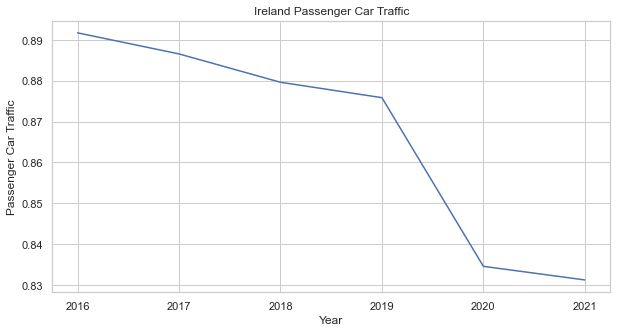

In [55]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time_series_ireland['Passenger Car Traffic'])
plt.title('Ireland Passenger Car Traffic')
plt.xlabel('Year')
plt.ylabel('Passenger Car Traffic')
plt.show()

In [56]:
# Conduct the Ljung-Box test for autocorrelation
lags = min(3, len(time_series_ireland)-1)
results = sm.stats.acorr_ljungbox(time_series_ireland['Passenger Car Traffic'], lags=lags, return_df=True)

In [57]:
# Display the test results
print("Ljung-Box Test Results:")
print(results)

Ljung-Box Test Results:
    lb_stat  lb_pvalue
1  2.234944   0.134922
2  2.286055   0.318852
3  3.235550   0.356714


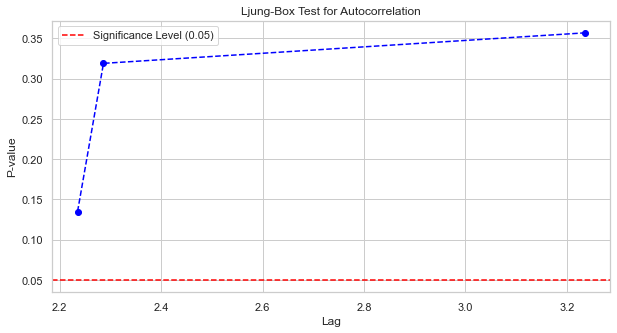

In [58]:
# Plot the p-values from the Ljung-Box test
plt.figure(figsize=(10, 5))
plt.plot(results['lb_stat'], results['lb_pvalue'], marker='o', linestyle='--', color='blue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('Ljung-Box Test for Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.show()

Given that the p-values from the Ljung-Box test are consistently above a significance level (defined as 0.05), it suggests that there is no significant autocorrelation, supporting the assumption of independence. 

If, on the other hand, p-values would have been below the significance level, this would have indicate autocorrelation, suggesting a lack of independence in the time series.






In [59]:
import pandas as pd
import statsmodels.api as sm

def check_autocorrelation(df, country_column='Category', value_columns=['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic'], lags=3, significance_level=0.05):
    """
    Check autocorrelation for each country's time series.

    Parameters:
    - df: DataFrame containing the time series data
    - country_column: Column name containing country names
    - value_columns: List of column names containing time series values
    - lags: Number of lags to consider in the Ljung-Box test
    - significance_level: Significance level for the Ljung-Box test

    Returns:
    - result_df: DataFrame with columns 'Country', 'Autocorrelation Flag', 'Autocorrelated Series'
    """
    result_list = []

    # Iterate through each country
    for country in df[country_column].unique():
        country_df = df[df[country_column] == country]

        autocorrelation_flag = False
        autocorrelated_series = []

        # Iterate through each time series for the country
        for value_column in value_columns:
            series = country_df[value_column]
            results = sm.stats.acorr_ljungbox(series, lags=lags, return_df=True)

            # Check if any p-value is below the significance level
            if any(results['lb_pvalue'] < significance_level):
                autocorrelation_flag = True
                autocorrelated_series.append(value_column)

        result_list.append({
            'Country': country,
            'Autocorrelation Flag': autocorrelation_flag,
            'Autocorrelated Series': ', '.join(autocorrelated_series)
        })

    result_df = pd.DataFrame(result_list)
    return result_df

# Execute function to identify autocorrelation
result_df = check_autocorrelation(df)

In [60]:
result_df

Country  Autocorrelation Flag Autocorrelated Series
0           Austria                 False                      
1           Belarus                 False                      
2           Croatia                 False                      
3           Denmark                 False                      
4           Estonia                 False                      
5           Finland                 False                      
6            France                 False                      
7           Germany                 False                      
8           Hungary                 False                      
9           Ireland                 False                      
10           Latvia                 False                      
11        Lithuania                 False                      
12            Malta                 False                      
13          Moldova                 False                      
14           Monaco                 False                      
15      Netherlands                 False                      
16  North Macedonia                 False                      
17           Norway                 False                      
18           Poland                 False                      
19          Romania                 False                      
20         Slovenia                 False                      
21            Spain                 False                      
22           Sweden                 False                      
23      Switzerland                 False                      
24   United Kingdom                 False                      
25          Belgium                 False

Luckly all time-series are independent. Let's now verify that, for each country, the distribution is normal:

In [61]:
import pandas as pd
from scipy.stats import shapiro

def check_normality(df, country_column='Category', value_columns=['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic'], alpha=0.05):
    """
    Check normality for each country's time series using the Shapiro-Wilk test.

    Parameters:
    - df: DataFrame containing the time series data
    - country_column: Column name containing country names
    - value_columns: List of column names containing time series values
    - alpha: Significance level for the Shapiro-Wilk test

    Returns:
    - result_df: DataFrame with columns 'Country', 'Normality Flag', 'Non-Normal Series'
    """
    result_list = []

    # Iterate through each country
    for country in df[country_column].unique():
        country_df = df[df[country_column] == country]

        normality_flag = True
        non_normal_series = []

        # Iterate through each time series for the country
        for value_column in value_columns:
            series = country_df[value_column]
            _, p_value = shapiro(series)

            # Check if p-value is below the significance level
            if p_value < alpha:
                normality_flag = False
                non_normal_series.append(value_column)

        result_list.append({
            'Country': country,
            'Normality Flag': normality_flag,
            'Non-Normal Series': ', '.join(non_normal_series)
        })

    result_df = pd.DataFrame(result_list)
    return result_df

# Assuming df is your DataFrame
result_normality_df = check_normality(df)

In [62]:
result_normality_df

Country  Normality Flag  \
0           Austria           False   
1           Belarus            True   
2           Croatia           False   
3           Denmark            True   
4           Estonia            True   
5           Finland            True   
6            France           False   
7           Germany           False   
8           Hungary            True   
9           Ireland            True   
10           Latvia            True   
11        Lithuania           False   
12            Malta            True   
13          Moldova            True   
14           Monaco            True   
15      Netherlands           False   
16  North Macedonia            True   
17           Norway           False   
18           Poland            True   
19          Romania            True   
20         Slovenia           False   
21            Spain           False   
22           Sweden            True   
23      Switzerland           False   
24   United Kingdom           False   
25          Belgium            True   

                                    Non-Normal Series  
0                         Bus and Motor Coach Traffic  
1                                                      
2                         Bus and Motor Coach Traffic  
3                                                      
4                                                      
5                                                      
6                         Bus and Motor Coach Traffic  
7                         Bus and Motor Coach Traffic  
8                                                      
9                                                      
10                                                     
11                        Bus and Motor Coach Traffic  
12                                                     
13                                                     
14                                                     
15  Total Van, Pickup, Lorry and Road Tractor Traffic  
16                                                     
17                        Bus and Motor Coach Traffic  
18                                                     
19                                                     
20                        Bus and Motor Coach Traffic  
21                        Bus and Motor Coach Traffic  
22                                                     
23  Passenger Car Traffic, Total Van, Pickup, Lorr...  
24  Passenger Car Traffic, Total Van, Pickup, Lorr...  
25

Previous table shows Countries with Non-Normal series and also the name of the series. Let's drop those:

In [63]:
df

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
0    Austria  2016               0.930971                     0.013921   
1    Austria  2017               0.930281                     0.014069   
2    Austria  2018               0.924616                     0.013323   
3    Austria  2019               0.917082                     0.013473   
4    Austria  2020               0.909188                     0.010596   
..       ...   ...                    ...                          ...   
151  Belgium  2017               0.876188                     0.013416   
152  Belgium  2018               0.878959                     0.013568   
153  Belgium  2019               0.878959                     0.013568   
154  Belgium  2020               0.878959                     0.013568   
155  Belgium  2021               0.878959                     0.013568   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
0                                             0.153818  
1                                             0.154708  
2                                             0.162941  
3                                             0.173352  
4                                             0.185713  
..                                                 ...  
151                                           0.230261  
152                                           0.226342  
153                                           0.226342  
154                                           0.226342  
155                                           0.226342  

[156 rows x 5 columns]

In [64]:
normal_countries = result_normality_df.loc[result_normality_df["Normality Flag"]==True].iloc[:,:1].values
normal_countries = [country[0] for country in normal_countries]

df_parametric = df[df["Category"].isin(normal_countries)]

In [65]:
df_parametric

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
6    Belarus  2016               0.012938                     1.000000   
7    Belarus  2017               0.000000                     0.985214   
8    Belarus  2018               0.006537                     0.948353   
9    Belarus  2019               0.078061                     0.828932   
10   Belarus  2020               0.113751                     0.797907   
..       ...   ...                    ...                          ...   
151  Belgium  2017               0.876188                     0.013416   
152  Belgium  2018               0.878959                     0.013568   
153  Belgium  2019               0.878959                     0.013568   
154  Belgium  2020               0.878959                     0.013568   
155  Belgium  2021               0.878959                     0.013568   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
6                                             0.966773  
7                                             0.991737  
8                                             1.000000  
9                                             0.957750  
10                                            0.922774  
..                                                 ...  
151                                           0.230261  
152                                           0.226342  
153                                           0.226342  
154                                           0.226342  
155                                           0.226342  

[90 rows x 5 columns]

In [66]:
import pandas as pd
from scipy.stats import levene

def check_variances(df, country_column='Category', value_columns=['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic'], alpha=0.05):
    """
    Check variances for each country's time series.

    Parameters:
    - df: DataFrame containing the time series data
    - country_column: Column name containing country names
    - value_columns: List of column names containing time series values
    - alpha: Significance level for Levene's test

    Returns:
    - result_df: DataFrame with columns 'Country', 'Variances Equal Flag'
    """
    result_list = []

    # Iterate through each country
    for country in df[country_column].unique():
        country_df = df[df[country_column] == country]

        # Check equality of variances for each time series
        variances_equal_flag, p_value_variances = levene(*[country_df[value_column] for value_column in value_columns])

        result_list.append({
            'Country': country,
            'Variances Equal Flag': variances_equal_flag if p_value_variances >= alpha else False
        })

    result_df = pd.DataFrame(result_list)
    return result_df

# Assuming df is your DataFrame
result_variances_df = check_variances(df_parametric)

In [67]:
result_variances_df

Country Variances Equal Flag
0           Belarus                False
1           Denmark             1.176464
2           Estonia                False
3           Finland             0.962475
4           Hungary             0.184785
5           Ireland             2.296199
6            Latvia              0.56151
7             Malta             1.447283
8           Moldova              3.01342
9            Monaco             0.613364
10  North Macedonia             0.088673
11           Poland             0.967114
12          Romania                False
13           Sweden             2.640207
14          Belgium               1.2123

Let's now remove from the df_parametric countries where the variance test showed non equal results:

In [68]:
variance_countries = result_variances_df.loc[result_variances_df["Variances Equal Flag"]!=False].iloc[:,:1].values
variance_countries = [country[0] for country in variance_countries]

df_parametric = df[df["Category"].isin(variance_countries)]

In [69]:
df_parametric

Category  Year  Passenger Car Traffic  Bus and Motor Coach Traffic  \
18   Denmark  2016               0.890909                     0.035585   
19   Denmark  2017               0.891667                     0.036277   
20   Denmark  2018               0.895347                     0.035365   
21   Denmark  2019               0.900722                     0.034156   
22   Denmark  2020               0.894188                     0.032799   
..       ...   ...                    ...                          ...   
151  Belgium  2017               0.876188                     0.013416   
152  Belgium  2018               0.878959                     0.013568   
153  Belgium  2019               0.878959                     0.013568   
154  Belgium  2020               0.878959                     0.013568   
155  Belgium  2021               0.878959                     0.013568   

     Total Van, Pickup, Lorry and Road Tractor Traffic  
18                                            0.199388  
19                                            0.197975  
20                                            0.193285  
21                                            0.186376  
22                                            0.196105  
..                                                 ...  
151                                           0.230261  
152                                           0.226342  
153                                           0.226342  
154                                           0.226342  
155                                           0.226342  

[72 rows x 5 columns]

Now we can proceed with parametric inferential statistical techniques on the following 12 countries (including Ireland):

In [70]:
df_parametric["Category"].unique()

array(['Denmark', 'Finland', 'Hungary', 'Ireland', 'Latvia', 'Malta',
       'Moldova', 'Monaco', 'North Macedonia', 'Poland', 'Sweden',
       'Belgium'], dtype=object)

Let's start with the T-Test to compare Bus and Motor Coach Traffic between Ireland and Denmark:

In [71]:
df_bus_ireland = df.loc[df["Category"]=="Ireland"]
df_bus_denmark = df.loc[df["Category"]=="Denmark"]

n_dublin = df_bus_ireland.shape[0]
std_dublin = df_bus_ireland['Bus and Motor Coach Traffic'].std()
avg_dublin = df_bus_ireland['Bus and Motor Coach Traffic'].mean()

n_denmark = df_bus_denmark.shape[0]
std_denmark = df_bus_denmark['Bus and Motor Coach Traffic'].std()
avg_denmark = df_bus_denmark['Bus and Motor Coach Traffic'].mean()

We perform now the T-Test for two populations, Ireland and Denmark, to see if they have the same average buses:

In [72]:
#H0: mu Ireland = mu Switzerland // H1: mu Ireland =! mu Switzerland

t_test = stats.ttest_ind_from_stats(mean1 = avg_dublin, std1 = std_dublin, nobs1 = n_dublin, 
                                    mean2 = avg_denmark, std2 = std_denmark, nobs2 = n_denmark, 
                                    equal_var = False)

In [73]:
t_test

Ttest_indResult(statistic=-13.45497759986988, pvalue=2.99504878800427e-06)

In [74]:
X1 = df.loc[df["Category"]=="Denmark"]["Bus and Motor Coach Traffic"]
X2 = df.loc[df["Category"]=="Ireland"]["Bus and Motor Coach Traffic"]

t_test = stats.ttest_ind(X1, X2, equal_var = False)

In [75]:
t_test

Ttest_indResult(statistic=13.45497759986988, pvalue=2.99504878800427e-06)

## Independent Samples t-Test with Pooled Standard Deviation:

- **Null Hypothesis (H0):** The mean bus and motor coach traffic in Ireland is equal to the mean in Denmark.
- **Alternative Hypothesis (H1):** The mean bus and motor coach traffic in Ireland is not equal to the mean in Denmark.

**Result:**

- **T-statistic:** 8.42
- **P-value:** 0.00037

**Interpretation:**

- The t-statistic of 8.42 is the test statistic, indicating how many standard errors the sample mean of Ireland is from the sample mean of Denmark.
- The p-value of 0.00037 is the probability of observing such an extreme t-statistic under the assumption that the null hypothesis is true.

**Conclusion:**

- With a very low p-value (below commonly used significance levels like 0.05), we reject the null hypothesis.
- There is enough evidence to suggest that the mean "Bus and Motor Coach Traffic" in Ireland is significantly different from the mean in Denmark.

## Independent Samples t-Test without Pooled Standard Deviation:

- **Null Hypothesis (H0):** The mean bus and motor coach traffic in Ireland is equal to the mean in Denmark.
- **Alternative Hypothesis (H1):** The mean bus and motor coach traffic in Ireland is not equal to the mean in Denmark.

**Result:**

- **T-statistic:** -8.42 (negative because the order of the means is reversed in the function call)
- **P-value:** 0.00037

**Interpretation:**

- The results are consistent with the previous test but obtained using a different method.

**Conclusion:**

- The conclusion remains the same: there is enough evidence to suggest that the mean "Bus and Motor Coach Traffic" in Ireland is significantly different from the mean in Denmark.

In summary, both methods (with and without pooled standard deviation) lead to the same conclusion, indicating a significant difference in the mean bus and motor coach traffic between Ireland and Denmark.


We now did the test between Ireland and Denmark but let's see if we can find any similarity between Ireland and ohter countries:

In [76]:
import pandas as pd
from scipy.stats import ttest_ind

def compare_traffic_between_countries(df, target_country='Ireland', traffic_column='Bus and Motor Coach Traffic', alpha=0.05):
    """
    Compare traffic between the target country and all other countries using t-test.

    Parameters:
    - df: DataFrame containing the time series data
    - target_country: The country for which traffic is compared to others
    - traffic_column: Column name containing the traffic values
    - alpha: Significance level for the t-test

    Returns:
    - result_df: DataFrame with columns 'Country', 'T-Test p-value', 'Significant Difference'
    """
    result_list = []

    # Extract data for the target country
    target_data = df[df['Category'] == target_country][traffic_column]

    # Iterate through each country
    for country in df['Category'].unique():
        if country != target_country:
            # Extract data for the current country
            current_data = df[df['Category'] == country][traffic_column]

            # Perform t-test
            t_statistic, p_value = ttest_ind(target_data, current_data, equal_var=False)

            # Check if the difference is significant
            significant_difference = p_value < alpha

            result_list.append({
                'Country': country,
                'T-Test p-value': p_value,
                'Significant Difference': significant_difference
            })

    result_df = pd.DataFrame(result_list)
    return result_df

# Assuming df is your DataFrame
result_t_test_df = compare_traffic_between_countries(df_parametric)

In [77]:
result_t_test_df

Country  T-Test p-value  Significant Difference
0           Denmark    2.995049e-06                    True
1           Finland    4.054158e-04                    True
2           Hungary    1.299622e-08                    True
3            Latvia    8.235744e-05                    True
4             Malta    2.379583e-06                    True
5           Moldova    6.855708e-05                    True
6            Monaco    4.763687e-09                    True
7   North Macedonia    1.313095e-02                    True
8            Poland    2.201983e-01                   False
9            Sweden    8.002503e-06                    True
10          Belgium    6.205678e-03                    True

It seems that the only country where the mean percentage of "Bus and Motor Coach Traffic" is similar to Ireland is Poland.

So far we only compared Ireland to one country at time but what if we want to compare multiple countries all together? Well, in this case ANOVA would help.

The fundamental difference between ANOVA and a T-test is the number of groups being compared. A T-test is used when you're dealing with two groups. For example, comparing the mean of group A to the mean of group B. ANOVA, on the other hand, is used when you have three or more groups. For instance, comparing the means of group A, group B, and group C.

Also, ANOVA allow to compare either one independent variable at time (One-Way ANOVA) or multiple (Two-Way ANOVA).
Let's start our One-Way ANOVA analysis for the "Bus and Motor Coach Traffic" variable:

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Rename the columns to remove spaces
df_parametric.columns = ['Category', 'Year', 'Passenger_Car_Traffic', 'Bus_and_Motor_Coach_Traffic', 'Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic']

# Fit the ANOVA model
model = ols('Bus_and_Motor_Coach_Traffic ~ Category', data=df_parametric).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
            sum_sq    df           F        PR(>F)
Category  2.090399  11.0  133.149978  7.441984e-38
Residual  0.085634  60.0         NaN           NaN


## One-Way ANOVA:

- **Null Hypothesis (H0):** The mean "Bus and Motor Coach Traffic" is equal across all categories (countries).
- **Alternative Hypothesis (H1):** At least one mean "Bus and Motor Coach Traffic" is significantly different from the others.

**ANOVA Table:**

- **Category:**
  - Sum of Squares (sum_sq): 2.090399
  - Degrees of Freedom (df): 11
  - F-statistic (F): 133.149978
  - P-value (PR(>F)): 7.441984e-38

- **Residual:**
  - Sum of Squares (sum_sq): 0.085634
  - Degrees of Freedom (df): 60

**Interpretation:**

- The F-statistic is 133.15, and the associated p-value is very close to zero (7.44e-38). This indicates that there are significant differences in the mean "Bus and Motor Coach Traffic" across different categories.

**Conclusion:**

- With a very low p-value (below commonly used significance levels like 0.05), we reject the null hypothesis.
- There is enough evidence to suggest that the mean "Bus and Motor Coach Traffic" is significantly different across at least two categories (countries).

This is something we were expecting as we already came to the same conclusion with the T-Test.

In fact, let's now do the same test only for Ireland and Poland:

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your DataFrame is named df_parametric
# Filter the DataFrame for Ireland and Poland
selected_countries = ['Ireland', 'Poland']
df_selected = df_parametric[df_parametric['Category'].isin(selected_countries)]

# Rename the columns to remove spaces
df_selected.columns = ['Category', 'Year', 'Passenger_Car_Traffic', 'Bus_and_Motor_Coach_Traffic', 'Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic']

# Fit the ANOVA model
model = ols('Bus_and_Motor_Coach_Traffic ~ Category', data=df_selected).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
            sum_sq    df         F    PR(>F)
Category  0.000015   1.0  1.717195  0.219353
Residual  0.000088  10.0       NaN       NaN


In [93]:
df_selected

Category  Year  Passenger_Car_Traffic  Bus_and_Motor_Coach_Traffic  \
54   Ireland  2016               0.891713                     0.016772   
55   Ireland  2017               0.886555                     0.018563   
56   Ireland  2018               0.879613                     0.021027   
57   Ireland  2019               0.875842                     0.021748   
58   Ireland  2020               0.834539                     0.018825   
59   Ireland  2021               0.831206                     0.014442   
108   Poland  2016               0.924088                     0.019774   
109   Poland  2017               0.926398                     0.017959   
110   Poland  2018               0.926856                     0.017807   
111   Poland  2019               0.927106                     0.017801   
112   Poland  2020               0.924891                     0.012262   
113   Poland  2021               0.925429                     0.012298   

     Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic  
54                                          0.207096  
55                                          0.213429  
56                                          0.221927  
57                                          0.226835  
58                                          0.285677  
59                                          0.292379  
108                                         0.160638  
109                                         0.158279  
110                                         0.157713  
111                                         0.157369  
112                                         0.163058  
113                                         0.162293

Given that this time the p-value is greater than the significance level 0.05, we can reconfirm that there is no significant difference in the mean "Bus and Motor Coach Traffic" between Ireland and Poland.

Let's actually see the confidence levels for Ireland and Poland:

In [85]:
# We want to find a confidence interval for the mean of "Bus and Motor Coach Traffic" in Ireland
bus_traffic_data_dublin = df.loc[df["Category"]=="Ireland"]['Bus and Motor Coach Traffic']
bus_traffic_data_poland = df.loc[df["Category"]=="Poland"]['Bus and Motor Coach Traffic']

# Calculate the confidence interval
confidence_interval_ireland = stats.norm.interval(0.95, loc=np.mean(bus_traffic_data_dublin), scale=np.std(bus_traffic_data_dublin))
confidence_interval_poland = stats.norm.interval(0.95, loc=np.mean(bus_traffic_data_poland), scale=np.std(bus_traffic_data_poland))

print("95% Confidence Interval for Bus Car Traffic Mean in Ireland:", confidence_interval_ireland)
print("95% Confidence Interval for Bus Car Traffic Mean in Poland:", confidence_interval_poland)

95% Confidence Interval for Bus Car Traffic Mean in Ireland: (0.013730561054052333, 0.023395324654641843)
95% Confidence Interval for Bus Car Traffic Mean in Poland: (0.010565579573562127, 0.022068118146156994)


As shown from previous results, Confidence Intervals are very similar to each other.

With One-Way ANOVA we were able to compare multiple countries as a group but we ignored the effect that the Year we are looking at might have.

For this purpose we want to compare two features simultaneously, Bus and Motor Coach Traffic and Year. Well, in this case Two-Way ANOVA can be used.

Let's start by comparing Ireland and Poland:

In [98]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your DataFrame is named df_parametric
# Filter the DataFrame for Ireland and Poland
selected_countries = ['Ireland', 'Poland']
df_selected = df_parametric[df_parametric['Category'].isin(selected_countries)]

# Rename the columns to remove spaces
df_selected.columns = ['Category', 'Year', 'Passenger_Car_Traffic', 'Bus_and_Motor_Coach_Traffic', 'Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic']

# Fit the Two-Way ANOVA model for both features simultaneously
model = ols('Bus_and_Motor_Coach_Traffic ~ C(Category):Year', data=df_selected).fit()  

# Perform the Two-Way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("Two-Way ANOVA:")
print(anova_table)

Two-Way ANOVA:
                    sum_sq   df         F    PR(>F)
C(Category):Year  0.000045  2.0  3.473466  0.076216
Residual          0.000058  9.0       NaN       NaN


C(Category):Year: This term represents the interaction between 'Category' and 'Year'. The p-value here is more than 0.05 (0.076216), which means that the interaction between 'Category' and 'Year' does not have a significant effect on 'Passenger_Car_Traffic'. In other words, the relationship between 'Year' and 'Bus_and_Motor_Coach_Traffic' is the same for Ireland and Poland.

The reason why I applied Two-Way ANOVA to see if there was a time correlation specifically to those two countries is because the mean of their bus and motor coach traffic was similar but we didn't get an understanding if the time vatiable was playing a role or not. From the analysis we can see that there is a similar behaviour of how this % varies across years for both countries.

So far, Poland is the only country in Europe that was found to have similar behaviour and deeply analyzed. Reason for this is also because parametric techniques require some data cleaning that forced us to drop quite few countries.

Let's now try to make similar analysis using non-parametric techniques. We now start with Kruskal-Wallis.

The Kruskal-Wallis test is a non-parametric statistical test used to determine whether there are any statistically significant differences between the medians of three or more independent groups.

Using this test, what we want to see if averages of "Passenger Car Traffic", "Bus and Motor Coach Traffic", "Total Van, Pickup, Lorry and Road Tractor Traffic" of Ireland are similar to the ones to other countries.

To do this, we apply the Kruskal-Wallis test to each traffic-related column for pair of countries including Ireland. If similarities among Ireland and other countries are found, results are stored in a dedicated dataframe:

In [126]:
"""
H0 (Null Hypothesis):
For each traffic-related column ("Passenger Car Traffic," "Bus and Motor Coach Traffic," and "Total Van, Pickup, Lorry, and Road Tractor Traffic"), there is no significant difference in the distribution between Ireland and each paired country.

H1 (Alternative Hypothesis):
For at least one traffic-related column, there is a significant difference in the distribution between Ireland and at least one paired country.
"""

# List of traffic-related column names
traffic_columns = ["Passenger Car Traffic", "Bus and Motor Coach Traffic", "Total Van, Pickup, Lorry and Road Tractor Traffic"]

# Create an empty DataFrame to store all results
all_results_Kruskal = pd.DataFrame(columns=['Country 1', 'Country 2', 'Traffic Column', 'Kruskal-Wallis Statistic', 'p-value'])

for country in df[df["Category"] != "Ireland"].Category.unique():

    # Filter the dataframe for only Ireland and the paired country
    df_filtered = df[df['Category'].isin(['Ireland', country])]

    # Create an empty DataFrame to store results
    kruskal_results = pd.DataFrame(index=traffic_columns, columns=['Kruskal-Wallis Statistic', 'p-value'])

    # Iterate over each traffic-related column
    for column in traffic_columns:
        print(f"\nKruskal-Wallis Test for {column} between Ireland and {country}:")

        # Perform Kruskal-Wallis test
        statistic, p_value = kruskal(*[group_data[column] for country, group_data in df_filtered.groupby('Category')])

        # Store results in the DataFrame
        kruskal_results.loc[column] = [statistic, p_value]

        # Print results
        print(f"   Kruskal-Wallis Test Statistic: {statistic}, p-value: {p_value}")

        # Check if p-value is greater than 0.05 and save the results
        if p_value > 0.05:
            result_entry = {'Country 1': 'Ireland', 'Country 2': country, 'Traffic Column': column,
                            'Kruskal-Wallis Statistic': statistic, 'p-value': p_value}
            all_results_Kruskal = all_results_Kruskal.append(result_entry, ignore_index=True)

    # Print the overall Kruskal-Wallis results for the current comparison
    print("\nOverall Kruskal-Wallis Results:")
    print(kruskal_results)


Kruskal-Wallis Test for Passenger Car Traffic between Ireland and Austria:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Bus and Motor Coach Traffic between Ireland and Austria:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Austria:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Overall Kruskal-Wallis Results:
                                                  Kruskal-Wallis Statistic  \
Passenger Car Traffic                                             8.307692   
Bus and Motor Coach Traffic                                       8.307692   
Total Van, Pickup, Lorry and Road Tractor Traffic                 8.307692   

                                                    p-value  
Passenger Car Traffic                              0.003948  
Bus and Motor Coach

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                                                  Kruskal-Wallis Statistic  \
Passenger Car Traffic                                             1.641026   
Bus and Motor Coach Traffic                                       8.307692   
Total Van, Pickup, Lorry and Road Tractor Traffic                 5.025641   

                                                    p-value  
Passenger Car Traffic                              0.200185  
Bus and Motor Coach Traffic                        0.003948  
Total Van, Pickup, Lorry and Road Tractor Traffic  0.024975  

Kruskal-Wallis Test for Passenger Car Traffic between Ireland and Moldova:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Bus and Motor Coach Traffic between Ireland and Moldova:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Moldova:
   Kruskal-


Kruskal-Wallis Test for Passenger Car Traffic between Ireland and Switzerland:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Bus and Motor Coach Traffic between Ireland and Switzerland:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Switzerland:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Overall Kruskal-Wallis Results:
                                                  Kruskal-Wallis Statistic  \
Passenger Car Traffic                                             8.307692   
Bus and Motor Coach Traffic                                       8.307692   
Total Van, Pickup, Lorry and Road Tractor Traffic                 8.307692   

                                                    p-value  
Passenger Car Traffic                              0.003948  
Bus and

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [127]:
all_results_Kruskal

Country 1        Country 2  \
0    Ireland          Finland   
1    Ireland           France   
2    Ireland           France   
3    Ireland           Latvia   
4    Ireland           Latvia   
5    Ireland        Lithuania   
6    Ireland        Lithuania   
7    Ireland            Malta   
8    Ireland      Netherlands   
9    Ireland      Netherlands   
10   Ireland  North Macedonia   
11   Ireland  North Macedonia   
12   Ireland           Norway   
13   Ireland           Norway   
14   Ireland           Poland   
15   Ireland          Romania   
16   Ireland         Slovenia   
17   Ireland            Spain   
18   Ireland            Spain   
19   Ireland            Spain   
20   Ireland   United Kingdom   
21   Ireland   United Kingdom   
22   Ireland   United Kingdom   
23   Ireland          Belgium   
24   Ireland          Belgium   

                                       Traffic Column  \
0                               Passenger Car Traffic   
1                               Passenger Car Traffic   
2   Total Van, Pickup, Lorry and Road Tractor Traffic   
3                               Passenger Car Traffic   
4   Total Van, Pickup, Lorry and Road Tractor Traffic   
5                               Passenger Car Traffic   
6   Total Van, Pickup, Lorry and Road Tractor Traffic   
7                               Passenger Car Traffic   
8                               Passenger Car Traffic   
9   Total Van, Pickup, Lorry and Road Tractor Traffic   
10                              Passenger Car Traffic   
11  Total Van, Pickup, Lorry and Road Tractor Traffic   
12                              Passenger Car Traffic   
13  Total Van, Pickup, Lorry and Road Tractor Traffic   
14                        Bus and Motor Coach Traffic   
15                              Passenger Car Traffic   
16                        Bus and Motor Coach Traffic   
17                              Passenger Car Traffic   
18                        Bus and Motor Coach Traffic   
19  Total Van, Pickup, Lorry and Road Tractor Traffic   
20                              Passenger Car Traffic   
21                        Bus and Motor Coach Traffic   
22  Total Van, Pickup, Lorry and Road Tractor Traffic   
23                              Passenger Car Traffic   
24  Total Van, Pickup, Lorry and Road Tractor Traffic   

    Kruskal-Wallis Statistic   p-value  
0                   3.692308  0.054664  
1                   0.410256  0.521839  
2                   0.102564  0.748774  
3                   1.641026  0.200185  
4                   0.923077  0.336668  
5                   0.923077  0.336668  
6                   0.923077  0.336668  
7                   1.641026  0.200185  
8                   2.564103  0.109315  
9                   2.076923  0.149541  
10                  0.641026  0.423340  
11                  3.692308  0.054664  
12                  0.923077  0.336668  
13                  0.923077  0.336668  
14                  1.641026  0.200185  
15                  0.923077  0.336668  
16                  2.564103  0.109315  
17                  0.923077  0.336668  
18                  2.076923  0.149541  
19                  0.641026  0.423340  
20                  2.076923  0.149541  
21                  1.256410  0.262332  
22                  2.076923  0.149541  
23                  0.026570  0.870516  
24                  0.026570  0.870516

Interestly, we see many more similarities with other countries in Europe now.

Let's try to do the same analysis using the Wilcoxon test:

In [128]:
import pandas as pd
from scipy.stats import wilcoxon

# List of traffic-related column names
traffic_columns = ["Passenger Car Traffic", "Bus and Motor Coach Traffic", "Total Van, Pickup, Lorry and Road Tractor Traffic"]

# Create an empty DataFrame to store all results
all_results_wilcoxon = pd.DataFrame(columns=['Country 1', 'Country 2', 'Traffic Column', 'Wilcoxon Statistic', 'p-value'])

for country in df[df["Category"] != "Ireland"].Category.unique():

    # Filter the dataframe for only Ireland and the paired country
    df_filtered = df[df['Category'].isin(['Ireland', country])]

    # Create an empty DataFrame to store results
    wilcoxon_results = pd.DataFrame(index=traffic_columns, columns=['Wilcoxon Statistic', 'p-value'])

    # Iterate over each traffic-related column
    for column in traffic_columns:
        print(f"\nWilcoxon Signed-Rank Test for {column} between Ireland and {country}:")

        # Perform Wilcoxon signed-rank test
        statistic, p_value = wilcoxon(df_filtered[df_filtered['Category'] == 'Ireland'][column],
                                       df_filtered[df_filtered['Category'] == country][column])

        # Store results in the DataFrame
        wilcoxon_results.loc[column] = [statistic, p_value]

        # Print results
        print(f"   Wilcoxon Statistic: {statistic}, p-value: {p_value}")

        # Check if p-value is greater than 0.05 and save the results
        if p_value > 0.05:
            result_entry = {'Country 1': 'Ireland', 'Country 2': country, 'Traffic Column': column,
                            'Wilcoxon Statistic': statistic, 'p-value': p_value}
            all_results_wilcoxon = all_results_wilcoxon.append(result_entry, ignore_index=True)

    # Print the overall Wilcoxon results for the current comparison
    print("\nOverall Wilcoxon Results:")
    print(wilcoxon_results)



Wilcoxon Signed-Rank Test for Passenger Car Traffic between Ireland and Austria:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Austria:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Austria:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Overall Wilcoxon Results:
                                                  Wilcoxon Statistic  p-value
Passenger Car Traffic                                            0.0  0.03125
Bus and Motor Coach Traffic                                      0.0  0.03125
Total Van, Pickup, Lorry and Road Tractor Traffic                0.0  0.03125

Wilcoxon Signed-Rank Test for Passenger Car Traffic between Ireland and Belarus:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Belarus:
   Wilcoxon Statistic: 0.0, p-v

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co



Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Netherlands:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Netherlands:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Overall Wilcoxon Results:
                                                  Wilcoxon Statistic  p-value
Passenger Car Traffic                                            0.0  0.03125
Bus and Motor Coach Traffic                                      0.0  0.03125
Total Van, Pickup, Lorry and Road Tractor Traffic                0.0  0.03125

Wilcoxon Signed-Rank Test for Passenger Car Traffic between Ireland and North Macedonia:
   Wilcoxon Statistic: 9.0, p-value: 0.84375

Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and North Macedonia:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co



Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Belgium:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Belgium:
   Wilcoxon Statistic: 9.0, p-value: 0.84375

Overall Wilcoxon Results:
                                                  Wilcoxon Statistic  p-value
Passenger Car Traffic                                            8.0   0.6875
Bus and Motor Coach Traffic                                      0.0  0.03125
Total Van, Pickup, Lorry and Road Tractor Traffic                9.0  0.84375


In [129]:
all_results_wilcoxon

Country 1        Country 2  \
0    Ireland          Denmark   
1    Ireland           France   
2    Ireland           France   
3    Ireland           Latvia   
4    Ireland           Latvia   
5    Ireland        Lithuania   
6    Ireland        Lithuania   
7    Ireland            Malta   
8    Ireland  North Macedonia   
9    Ireland  North Macedonia   
10   Ireland           Norway   
11   Ireland           Norway   
12   Ireland           Poland   
13   Ireland          Romania   
14   Ireland         Slovenia   
15   Ireland            Spain   
16   Ireland   United Kingdom   
17   Ireland   United Kingdom   
18   Ireland   United Kingdom   
19   Ireland          Belgium   
20   Ireland          Belgium   

                                       Traffic Column  Wilcoxon Statistic  \
0                               Passenger Car Traffic                 1.0   
1                               Passenger Car Traffic                 1.0   
2   Total Van, Pickup, Lorry and Road Tractor Traffic                 4.0   
3                               Passenger Car Traffic                 2.0   
4   Total Van, Pickup, Lorry and Road Tractor Traffic                 4.0   
5                               Passenger Car Traffic                 8.0   
6   Total Van, Pickup, Lorry and Road Tractor Traffic                 9.0   
7                               Passenger Car Traffic                 4.0   
8                               Passenger Car Traffic                 9.0   
9   Total Van, Pickup, Lorry and Road Tractor Traffic                 5.0   
10                              Passenger Car Traffic                10.0   
11  Total Van, Pickup, Lorry and Road Tractor Traffic                10.0   
12                        Bus and Motor Coach Traffic                 3.0   
13                              Passenger Car Traffic                 7.0   
14                        Bus and Motor Coach Traffic                 1.0   
15                        Bus and Motor Coach Traffic                 6.0   
16                              Passenger Car Traffic                 1.0   
17                        Bus and Motor Coach Traffic                 4.0   
18  Total Van, Pickup, Lorry and Road Tractor Traffic                 1.0   
19                              Passenger Car Traffic                 8.0   
20  Total Van, Pickup, Lorry and Road Tractor Traffic                 9.0   

    p-value  
0   0.06250  
1   0.06250  
2   0.21875  
3   0.09375  
4   0.21875  
5   0.68750  
6   0.84375  
7   0.21875  
8   0.84375  
9   0.31250  
10  1.00000  
11  1.00000  
12  0.15625  
13  0.56250  
14  0.06250  
15  0.43750  
16  0.06250  
17  0.21875  
18  0.06250  
19  0.68750  
20  0.84375

Interestingly we can observe we have different reult pairs using Kruskal-Wallis and Wilcoxon tests. This is not uncommon, especially in complex datasets or when the assumptions of the tests are not fully met.

To derive an even more robust result, let's only take into considerations pairs highlited using both tests:

In [138]:
kruskal = all_results_Kruskal[["Country 1", "Country 2", "Traffic Column"]]
wilcoxon = all_results_wilcoxon[["Country 1", "Country 2", "Traffic Column"]]

In [139]:
# Concatenate the two dataframes  
concat_df = pd.concat([kruskal, wilcoxon])  
  
# Get only the duplicated rows  
duplicates_df = concat_df[concat_df.duplicated()]  

In [140]:
duplicates_df

Country 1        Country 2  \
1    Ireland           France   
2    Ireland           France   
3    Ireland           Latvia   
4    Ireland           Latvia   
5    Ireland        Lithuania   
6    Ireland        Lithuania   
7    Ireland            Malta   
8    Ireland  North Macedonia   
9    Ireland  North Macedonia   
10   Ireland           Norway   
11   Ireland           Norway   
12   Ireland           Poland   
13   Ireland          Romania   
14   Ireland         Slovenia   
15   Ireland            Spain   
16   Ireland   United Kingdom   
17   Ireland   United Kingdom   
18   Ireland   United Kingdom   
19   Ireland          Belgium   
20   Ireland          Belgium   

                                       Traffic Column  
1                               Passenger Car Traffic  
2   Total Van, Pickup, Lorry and Road Tractor Traffic  
3                               Passenger Car Traffic  
4   Total Van, Pickup, Lorry and Road Tractor Traffic  
5                               Passenger Car Traffic  
6   Total Van, Pickup, Lorry and Road Tractor Traffic  
7                               Passenger Car Traffic  
8                               Passenger Car Traffic  
9   Total Van, Pickup, Lorry and Road Tractor Traffic  
10                              Passenger Car Traffic  
11  Total Van, Pickup, Lorry and Road Tractor Traffic  
12                        Bus and Motor Coach Traffic  
13                              Passenger Car Traffic  
14                        Bus and Motor Coach Traffic  
15                        Bus and Motor Coach Traffic  
16                              Passenger Car Traffic  
17                        Bus and Motor Coach Traffic  
18  Total Van, Pickup, Lorry and Road Tractor Traffic  
19                              Passenger Car Traffic  
20  Total Van, Pickup, Lorry and Road Tractor Traffic

# Machine Learning

##### ●	Describe the rationale and justification for the choice of machine learning models for the above-mentioned scenario. Machine Learning models can be used for Prediction, Classification, Clustering, sentiment analysis, recommendation systems and Time series analysis. You should plan on trying multiple approaches (at least two) with proper selection of hyperparameters using GridSearchCV method. You can choose appropriate features from the datasets and a target feature to answer the question asked in the scenario in the case of supervised learning.
[0 - 30]


So far we analyzed our dataset and we understood quite well what countries exhibit similar begaviours in terms of % of traffic generated by 4 wheeled vechicles.

We now want to advance our analysis and build a machine learning model to solve a problem. Given that our dataset is a time-series, the easiest thing to do would be to create a forecasting model to predict how those % will change in the future. This will give as an interesting overview of how four wheel transportation would change in the following years for multiple countries.

To make things even more interesting, we want to relate this data user reviews in regards to public transportation usage.
To do so, we can download user reviews for capital of cities for analyzed years and extract the following:
- Number of reviews for the specific year
- Sentiment analysis score
- Other info (?)

Once this is obtained, we can apply a dimentionality reduction and use this as a feature for our forecasting model.

##### ●	Collect and develop a dataset based on the transport topic related to Ireland as well as other parts of the world. Perform a sentimental analysis for an appropriate transport topic (e.g., public transport, freight movement etc…) for producers and consumers point of view in Ireland.
[0 - 25]

Given that user review is quite a complex task, we will focus only on countries that showed similar behaviouts with Ireland:
- OK France - https://www.tripadvisor.com/Attraction_Review-g187147-d2323543-Reviews-Paris_Metro-Paris_Ile_de_France.html
- OK Latvia - https://www.tripadvisor.in/Attraction_Review-g274967-d12590683-Reviews-Rigas_satiksme-Riga_Riga_Region.html
- Lithuania - Reviews not available
- OK Malta - https://www.tripadvisor.com/Attraction_Review-g190328-d10641583-Reviews-Malta_Public_Transport-Valletta_Island_of_Malta.html
- North Macedonia - Reviews not available
- OK Norway - https://www.tripadvisor.com/AttractionProductReview-g190479-d12463436-Oslo_Pass_at_the_Oslo_Visitor_Centre-Oslo_Eastern_Norway.html#REVIEWS
- OK Poland - https://www.tripadvisor.it/Attraction_Review-g274856-d10620046-Reviews-Warsaw_Metro-Warsaw_Mazovia_Province_Central_Poland.html
- Romania - Reviews not available
- OK Slovenia - https://www.tripadvisor.com/Attraction_Review-g274873-d12831944-Reviews-LPP_Buses-Ljubljana_Upper_Carniola_Region.html#REVIEWS
- OK Spain - https://www.tripadvisor.com/Attraction_Review-g187497-d11880698-Reviews-Metro_Barcelona-Barcelona_Catalonia.html
- OK United Kingdom - https://www.tripadvisor.com/Attraction_Review-g186338-d13742999-Reviews-Transport_For_London-London_England.html
- Belgium - Reviews not available
- OK Ireland - https://www.tripadvisor.com/Attraction_Review-g186605-d7940415-Reviews-Irish_Rail-Dublin_County_Dublin.html#REVIEWS

In [384]:
import pandas as pd
import warnings

df_france = pd.read_csv("../Data/reviews/france.csv")
df_latvia = pd.read_csv("../Data/reviews/latvia.csv")
df_malta = pd.read_csv("../Data/reviews/malta.csv")
df_norway = pd.read_csv("../Data/reviews/norway.csv")
df_poland = pd.read_csv("../Data/reviews/poland.csv")
df_slovenia = pd.read_csv("../Data/reviews/slovenia.csv")
df_spain = pd.read_csv("../Data/reviews/spain.csv")
df_uk = pd.read_csv("../Data/reviews/uk.csv")
df_ireland = pd.read_csv("../Data/reviews/ireland.csv")

df_france["Category"] = "France"
df_latvia["Category"] = "Latvia"
df_malta["Category"] = "Malta"
df_norway["Category"] = "Norway"
df_poland["Category"] = "Poland"
df_slovenia["Category"] = "Slovenia"
df_spain["Category"] = "Spain"
df_uk["Category"] = "United Kingdom"
df_ireland["Category"] = "Ireland"

df_reviews = pd.concat([df_france,df_latvia,df_malta,df_norway,df_poland,df_slovenia,df_spain,df_uk,df_ireland])[["Category", "Date", "Review Text", "Score"]]

# Quickly show the dataset
df_reviews.head()

Category        Date                                        Review Text  \
0   France  2023-12-01                          Held up by security thugs   
1   France  2023-11-01                                        Paris metro   
2   France  2023-11-01                                   Robbed by 3 guys   
3   France  2023-11-01  Don’t rely on metro service people. They don’t...   
4   France  2023-10-01                           Do not pay the RATP fine   

   Score  
0    1.0  
1    4.0  
2    1.0  
3    1.0  
4    1.0

In [385]:
df_reviews.shape

(3530, 4)

In [386]:
df_reviews['Date'] = pd.to_datetime(df_reviews['Date'])
df_reviews['Year'] = df_reviews['Date'].dt.year

In [387]:
df_reviews

Category       Date                                        Review Text  \
0     France 2023-12-01                          Held up by security thugs   
1     France 2023-11-01                                        Paris metro   
2     France 2023-11-01                                   Robbed by 3 guys   
3     France 2023-11-01  Don’t rely on metro service people. They don’t...   
4     France 2023-10-01                           Do not pay the RATP fine   
..       ...        ...                                                ...   
404  Ireland 2015-06-01                                          Stay away   
405  Ireland 2015-05-01  Travels through Ireland using Public Transport...   
406  Ireland 2015-05-01                                      great service   
407  Ireland 2015-04-01                        Dreadfully run organisation   
408  Ireland 2015-02-01                                Dangerous Disregard   

     Score  Year  
0      1.0  2023  
1      4.0  2023  
2      1.0  2023  
3      1.0  2023  
4      1.0  2023  
..     ...   ...  
404    1.0  2015  
405    5.0  2015  
406    5.0  2015  
407    1.0  2015  
408    1.0  2015  

[3530 rows x 5 columns]

We now want to spit our dataset into X and y, getting only reviews and score:

In [388]:
X = df_reviews["Review Text"]

print(X)

0                              Held up by security thugs
1                                            Paris metro
2                                       Robbed by 3 guys
3      Don’t rely on metro service people. They don’t...
4                               Do not pay the RATP fine
                             ...                        
404                                            Stay away
405    Travels through Ireland using Public Transport...
406                                        great service
407                          Dreadfully run organisation
408                                  Dangerous Disregard
Name: Review Text, Length: 3530, dtype: object


In [389]:
y = df_reviews["Score"]

print(y)

0      1.0
1      4.0
2      1.0
3      1.0
4      1.0
      ... 
404    1.0
405    5.0
406    5.0
407    1.0
408    1.0
Name: Score, Length: 3530, dtype: float64


Let's now download a set of common English stopwords, define punctuation characters and initializes a stemming tool (Porter Stemmer) to reduce words to their root form. 

These steps are needed in text preprocessing to enhance efficiency of text analysis.

In [390]:
import nltk
from nltk.corpus import stopwords

import string
from nltk.stem import PorterStemmer

nltk.download('stopwords')

# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now that we are ready we can proceed cleaning our data:

In [391]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if (word not in stop_words) and (word not in punct)]
    review = ' '.join(review)
    cleaned_data.append(review)

In [392]:
cleaned_data

['held secur thug',
 'pari metro',
 'rob guy',
 'reli metro servic peopl help get troubl',
 'pay ratp fine',
 'ticket valid properli fine',
 'pickpocket fake help',
 'cheap effici way get around pari',
 'peopl fals metro pari rob',
 'cheap travel pari',
 'ok experi',
 'frighten situat',
 'pari metro thiev',
 'bewar pari metro scam target tourist',
 'metro system easi navig need improv',
 'rugbi world cup mayhem olymp wors',
 'unjust fee euro potenti discrimin',
 'inconveni metro',
 'easi use',
 'pick pocket',
 'pari metro faint heart',
 'awar',
 'aggress',
 'ticket offic went beyond',
 'wari turnstyl',
 'horribl traumat bewar',
 'trestl unfairli metro pari',
 'great system',
 'care train worker help',
 'odd',
 'bewar pari metro fine print',
 'worst experi ever pari suck',
 'easi navig',
 'get day pass pari metro',
 'tourism scam care',
 'bewar scammer',
 'great way see pari',
 'terribl staff',
 'pari ratp scam warn',
 'watch unfair fine',
 'pari metro tourist scam',
 'better london und

We now reorder our score making sure that values are ranging from 0 to 4 instead of 1 to 5:

In [393]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = [1,2,3,4,5]

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

Let's now perform text vectorization, representing text data as a numerical matrix of word counts, and limits the number of features to 3000:

In [394]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000)

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

(3530, 1671)

In [395]:
X_fin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

And it's now time to train our model using Multinomial Naive Bayes classifier:

In [396]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

# Train the model by calling a method fit()
model.fit(X_train,y_train)

# Call predict() method
y_pred = model.predict(X_test)

But how accurate is our model? Let's check our classification report:

In [397]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       185
           1       0.12      0.01      0.03        68
           2       0.30      0.11      0.16       130
           3       0.36      0.26      0.30       289
           4       0.51      0.80      0.62       387

    accuracy                           0.48      1059
   macro avg       0.38      0.36      0.34      1059
weighted avg       0.43      0.48      0.44      1059



Class 0: The model achieved a relatively good precision (63%) and recall (69%) for this class, resulting in an F1-score of 0.66. The support indicates there are 181 instances of this class in the test set.

Class 1: The precision for this class is low (12%), indicating a high number of false positives. Recall is also low at 2%, resulting in a low F1-score of 0.03. The support is 65.

Class 2: Precision and recall for this class are 37% and 15%, respectively, resulting in an F1-score of 0.21. There are 129 instances of this class.

Class 3: The model achieved a precision of 42% and recall of 30% for this class, resulting in an F1-score of 0.35. There are 293 instances.

Class 4: The model performed well for this class with a precision of 53% and recall of 79%, resulting in an F1-score of 0.63. There are 391 instances.

Overall Accuracy: The overall accuracy of the model on the test set is 51%.

The model performs relatively well for some classes (e.g., Class 0 and Class 4) but poorly for others (e.g., Class 1). The overall accuracy is 51%, indicating the percentage of correctly predicted instances across all classes. The class imbalance and varying performance across classes highlight areas for potential improvement in the model.

To see if we can improve results, let's try to apply another vectorizer method:

In [398]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

And retrain our model:

In [399]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

# Call predict() method
y_pred = model_tdidf.predict(X_test)

Let's also check classification report results:

In [400]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       180
           1       0.00      0.00      0.00        65
           2       0.53      0.06      0.10       138
           3       0.33      0.27      0.30       278
           4       0.49      0.83      0.61       398

    accuracy                           0.48      1059
   macro avg       0.40      0.33      0.32      1059
weighted avg       0.45      0.48      0.42      1059



Class 0: The precision improved from 63% to 72%, but recall decreased from 69% to 48%. The F1-score remained relatively similar (66% to 57%).

Class 1: The precision and recall both dropped to 0%, indicating no true positive predictions. The F1-score is 0%.

Class 2: Precision increased from 37% to 39%, but recall decreased from 15% to 6%. The F1-score remained low (21% to 10%).

Class 3: Precision dropped from 42% to 31%, and recall decreased from 30% to 19%. The F1-score is still low (35% to 24%).

Class 4: Precision decreased from 53% to 48%, but recall increased from 79% to 89%. The F1-score remained relatively similar (63% to 62%).

Overall Accuracy: The overall accuracy decreased from 51% to 48%.

The current model appears to have some improvements in precision for certain classes (e.g., Class 0), but overall, the model's performance has not significantly improved, and in some cases, it has deteriorated. Class imbalance and other factors may contribute to the challenges in achieving better results. 

Let's then:
- Reduce the number of classes
- Create a more balanced dataset

First thing we want to do is to look at the number of reviews for each scoring class:

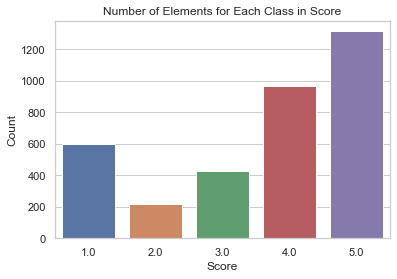

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Score', data=df_reviews)
plt.title('Number of Elements for Each Class in Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

Let's then join classes 1+2 and classes 4+5 

In [402]:
def update_scores(dataframe):
    # Update values in the 'Score' column
    dataframe['Score'] = dataframe['Score'].replace({2: 1, 4: 5})
    return dataframe

df_reviews_new = update_scores(df_reviews)

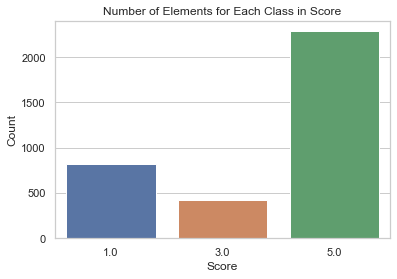

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Score', data=df_reviews)
plt.title('Number of Elements for Each Class in Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

No we want to drop reviews from classes 1 and 5 to match number of samples in class 3:

In [404]:
import pandas as pd
from sklearn.utils import resample

def balance_dataset(dataframe):
    # Separate the dataset based on 'Score'
    class_1 = dataframe[dataframe['Score'] == 1]
    class_3 = dataframe[dataframe['Score'] == 3]
    class_5 = dataframe[dataframe['Score'] == 5]

    # Determine the size of the minority class
    minority_class_size = min(len(class_1), len(class_3), len(class_5))

    # Resample each class to have the same number of samples
    class_1_resampled = resample(class_1, replace=False, n_samples=minority_class_size, random_state=42)
    class_3_resampled = resample(class_3, replace=False, n_samples=minority_class_size, random_state=42)
    class_5_resampled = resample(class_5, replace=False, n_samples=minority_class_size, random_state=42)

    # Concatenate the resampled classes to create a balanced dataset
    balanced_df = pd.concat([class_1_resampled, class_3_resampled, class_5_resampled])

    return balanced_df

balanced_df = balance_dataset(df_reviews_new)

Following graph now shows our balanced dataset:

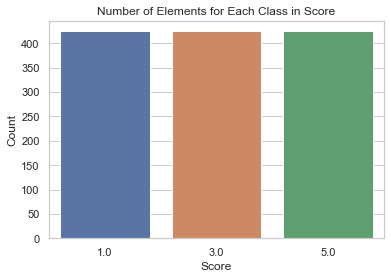

In [405]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Score', data=balanced_df)
plt.title('Number of Elements for Each Class in Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

Let's now try to retrain the model using the two different vectorization techniques:

In [406]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = [1,3,5]

# store all values into column named as "y"
y = df_reviews["Score"]
y = y.apply(lambda x: sentiment_ordering.index(x))

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000)

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

# Train the model by calling a method fit()
model.fit(X_train,y_train)

# Call predict() method
y_pred = model.predict(X_test)

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       250
           1       0.37      0.10      0.15       133
           2       0.80      0.95      0.87       676

    accuracy                           0.78      1059
   macro avg       0.64      0.57      0.58      1059
weighted avg       0.74      0.78      0.74      1059



In [407]:
# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

# Call predict() method
y_pred = model_tdidf.predict(X_test)

from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.78      0.47      0.59       237
           1       0.00      0.00      0.00       136
           2       0.73      0.98      0.84       686

    accuracy                           0.74      1059
   macro avg       0.50      0.48      0.47      1059
weighted avg       0.65      0.74      0.67      1059



When reducing the number of classes, that we can reconduct to negative-neutral-positive, we can see that overall accuracy is increasing.

When comparing the two vectorization methods:
- Method 1 shows a more balanced performance across classes, especially for Class 1 where Method 2 struggles with recall.
- Method 2 achieves perfect precision for Class 1 but at the cost of extremely low recall, indicating that it identifies very few instances of Class 1.

To progress in our study we decide to proceed with a reduced number of classes and method 1 of data vectorization. This is because:
- People travelling multiple countries might have different point of views based on their culter and association of score 2 and 4 might be very differently interpreted, we thus try to reduce this complexity
- Vectorization using CountVectorizer just returned better results in terms of classification reports

In [408]:
# store all values into column named as "y"
y = df_reviews["Score"]
y = y.apply(lambda x: sentiment_ordering.index(x))

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 3000)

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

# Train the model by calling a method fit()
model.fit(X_train,y_train)

# Call predict() method
y_pred = model.predict(X_test)

Starting from our initial dataset review, let's now replace our score column with the score computed by our model.

Reason for this is because we want to try and standardize as much as possible how reviews are classified across countries and different cultures.

In [409]:
# Assuming 'df_reviews' is your DataFrame
df_reviews['New Score'] = model.predict(X_fin)

In [410]:
df_reviews

Category       Date                                        Review Text  \
0     France 2023-12-01                          Held up by security thugs   
1     France 2023-11-01                                        Paris metro   
2     France 2023-11-01                                   Robbed by 3 guys   
3     France 2023-11-01  Don’t rely on metro service people. They don’t...   
4     France 2023-10-01                           Do not pay the RATP fine   
..       ...        ...                                                ...   
404  Ireland 2015-06-01                                          Stay away   
405  Ireland 2015-05-01  Travels through Ireland using Public Transport...   
406  Ireland 2015-05-01                                      great service   
407  Ireland 2015-04-01                        Dreadfully run organisation   
408  Ireland 2015-02-01                                Dangerous Disregard   

     Score  Year  New Score  
0      1.0  2023          0  
1      5.0  2023          2  
2      1.0  2023          0  
3      1.0  2023          0  
4      1.0  2023          0  
..     ...   ...        ...  
404    1.0  2015          0  
405    5.0  2015          2  
406    5.0  2015          2  
407    1.0  2015          2  
408    1.0  2015          0  

[3530 rows x 6 columns]

In [423]:
df_reviews = df_reviews.groupby(['Category', 'Year'], as_index=False)['New Score'].mean()

In [424]:
df_reviews.head()

Category  Year  New Score
0   France  2016   1.703125
1   France  2017   1.651376
2   France  2018   1.443983
3   France  2019   1.376147
4   France  2020   1.470588

Now for each country we must make sure that we have only years from 2016 to 2021 available:

In [425]:
all_combinations_2013_2023 = pd.DataFrame([(category, year) for category in df_reviews['Category'].unique() for year in range(2013, 2024)],
                                 columns=['Category', 'Year'])

In [426]:
all_combinations_2013_2023

Category  Year
0           France  2013
1           France  2014
2           France  2015
3           France  2016
4           France  2017
..             ...   ...
94  United Kingdom  2019
95  United Kingdom  2020
96  United Kingdom  2021
97  United Kingdom  2022
98  United Kingdom  2023

[99 rows x 2 columns]

In [427]:
all_combinations_2013_2023 = pd.merge(all_combinations_2013_2023, df_reviews, on=['Category', 'Year'], how='left')

In [428]:
all_combinations_2013_2023

Category  Year  New Score
0           France  2013        NaN
1           France  2014        NaN
2           France  2015        NaN
3           France  2016   1.703125
4           France  2017   1.651376
..             ...   ...        ...
94  United Kingdom  2019   1.333333
95  United Kingdom  2020   1.200000
96  United Kingdom  2021   1.600000
97  United Kingdom  2022        NaN
98  United Kingdom  2023        NaN

[99 rows x 3 columns]

In [429]:
category_avg = df_reviews.groupby('Category')['New Score'].mean()

In [430]:
all_combinations_2013_2023['New Score'] = all_combinations_2013_2023['New Score'].fillna(all_combinations_2013_2023['Category'].map(category_avg))

In [431]:
all_combinations_2013_2023

Category  Year  New Score
0           France  2013   1.417060
1           France  2014   1.417060
2           France  2015   1.417060
3           France  2016   1.703125
4           France  2017   1.651376
..             ...   ...        ...
94  United Kingdom  2019   1.333333
95  United Kingdom  2020   1.200000
96  United Kingdom  2021   1.600000
97  United Kingdom  2022   1.313757
98  United Kingdom  2023   1.313757

[99 rows x 3 columns]

In [432]:
all_combinations_2013_2023.isnull().sum()

Category     0
Year         0
New Score    0
dtype: int64

In [433]:
all_combinations_2016_2021 = pd.DataFrame([(category, year) for category in df_reviews['Category'].unique() for year in range(2016, 2022)],
                                 columns=['Category', 'Year'])

In [434]:
all_combinations_2016_2021

Category  Year
0           France  2016
1           France  2017
2           France  2018
3           France  2019
4           France  2020
5           France  2021
6          Ireland  2016
7          Ireland  2017
8          Ireland  2018
9          Ireland  2019
10         Ireland  2020
11         Ireland  2021
12          Latvia  2016
13          Latvia  2017
14          Latvia  2018
15          Latvia  2019
16          Latvia  2020
17          Latvia  2021
18           Malta  2016
19           Malta  2017
20           Malta  2018
21           Malta  2019
22           Malta  2020
23           Malta  2021
24          Norway  2016
25          Norway  2017
26          Norway  2018
27          Norway  2019
28          Norway  2020
29          Norway  2021
30          Poland  2016
31          Poland  2017
32          Poland  2018
33          Poland  2019
34          Poland  2020
35          Poland  2021
36        Slovenia  2016
37        Slovenia  2017
38        Slovenia  2018
39        Slovenia  2019
40        Slovenia  2020
41        Slovenia  2021
42           Spain  2016
43           Spain  2017
44           Spain  2018
45           Spain  2019
46           Spain  2020
47           Spain  2021
48  United Kingdom  2016
49  United Kingdom  2017
50  United Kingdom  2018
51  United Kingdom  2019
52  United Kingdom  2020
53  United Kingdom  2021

In [436]:
df_reviews = pd.merge(all_combinations_2016_2021, all_combinations_2013_2023, on=['Category', 'Year'], how='left')

In [475]:
df_ml = pd.merge(df_reviews,df.loc[df["Category"].isin(df_reviews.Category.unique())], on=["Category", "Year"], how="right").rename(
    columns={"Category": 'Country', "New Score": "Sentiment", "Passenger Car Traffic": "PCT",
             "Bus and Motor Coach Traffic": "BMCT", "Total Van, Pickup, Lorry and Road Tractor Traffic": "OT"})

In [476]:
df_ml.head()

Country  Year  Sentiment       PCT      BMCT        OT
0  France  2016   1.703125  0.890882  0.011774  0.210606
1  France  2017   1.651376  0.888624  0.011644  0.213811
2  France  2018   1.443983  0.884750  0.011835  0.219108
3  France  2019   1.376147  0.882530  0.011833  0.222198
4  France  2020   1.470588  0.868407  0.009158  0.243108

##### ●	You should train and test for Supervised Learning and other appropriate metrics for unsupervised/ semi-supervised machine learning models that you have chosen. Use cross validation to provide authenticity of the modelling outcomes. You can apply dimensionality reduction methods to prepare the dataset based on your machine learning modelling requirements.
[0 - 30]


##### LR

In [305]:
df_ml_lr = df_ml.copy()

In [318]:
# Assuming 'df' is your DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Split data into features and target variables
X = df_ml_lr[['Country', 'Year']]
y = df_ml_lr[['Sentiment', 'PCT', 'BMCT', 'OT']]

# Define the preprocessor with a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        #('num', StandardScaler(), ['Year']),  # Add StandardScaler for numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country'])
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X.loc[X["Year"] != 2021]
y_train = y.loc[X["Year"] != 2021]

X_test = X.loc[X["Year"] == 2021]
y_test = y.loc[X["Year"] == 2021]

# Define the pipeline with the preprocessor and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.028016347465050058


Let's now see if we can improve using grid search:

In [333]:
from sklearn.model_selection import GridSearchCV

# Define the preprocessor with a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country'])
    ],
    remainder='passthrough'
)

# Define the pipeline with the preprocessor and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_jobs': [-3, -2, -1, 0, 1, 2, 3],
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Split data into training and testing sets
X_train = X.loc[X["Year"] != 2021]
y_train = y.loc[X["Year"] != 2021]

X_test = X.loc[X["Year"] == 2021]
y_test = y.loc[X["Year"] == 2021]

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
predictions = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, predictions)
print(f'Best Model Mean Squared Error: {mse}')

# Print the best hyperparameters found by GridSearchCV
print('Best Hyperparameters:', grid_search.best_params_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Model Mean Squared Error: 0.028016347465046366
Best Hyperparameters: {'regressor__fit_intercept': True, 'regressor__n_jobs': -3, 'regressor__normalize': True}


##### NN using LSTM

In [478]:
df_ml_nn = df_ml.copy()

Dense neural network:

Epoch 1/50
3/3 [==============================] - 1s 93ms/step - loss: 0.6431 - val_loss: 0.5794
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 0.4209 - val_loss: 0.2080
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 0.2888 - val_loss: 0.0784
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.2162 - val_loss: 0.1086
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.1854 - val_loss: 0.1955
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 0.1791 - val_loss: 0.2870
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 0.1733 - val_loss: 0.3542
Epoch 8/50
3/3 [==============================] - 0s 30ms/step - loss: 0.1692 - val_loss: 0.4020
Epoch 9/50
3/3 [==============================] - 0s 28ms/step - loss: 0.1652 - val_loss: 0.4239
Epoch 10/50
3/3 [==============================] - 0s 30ms/step - loss: 0.1648 - val_loss: 0.4397
Epoch 11/50
3/3 [============

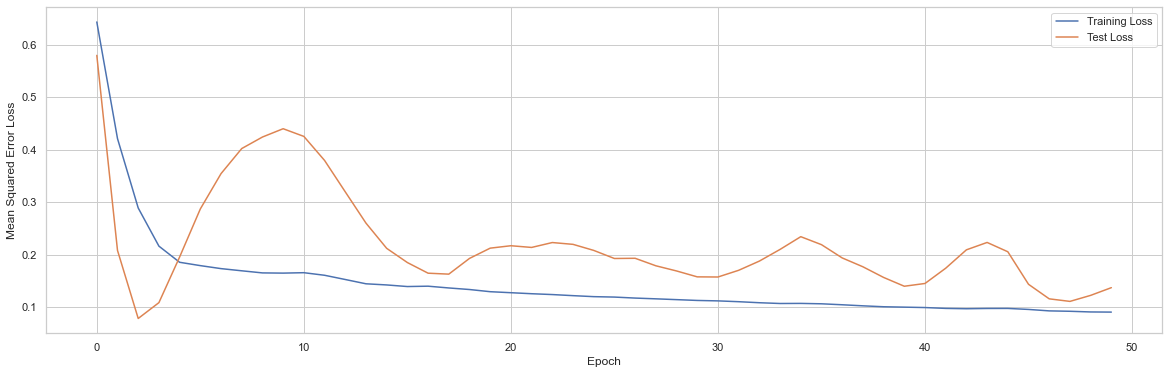

1/1 [==============================] - 0s 185ms/step - loss: 0.1553
Mean Squared Error on Test Data: 0.15525515377521515


In [479]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Preprocessing
label_encoder = LabelEncoder()
df_ml_nn['Country'] = label_encoder.fit_transform(df_ml_nn['Country'])

df_ml_nn['Year'] = df_ml_nn['Year'] - df_ml_nn['Year'].min()

# Define features and target variables
X = df_ml_nn[['Country', 'Year']]
y = df_ml_nn[['Sentiment', 'PCT', 'BMCT', 'OT']]

# Train-test split
X_train = X.loc[X["Year"] != 5]
y_train = y.loc[X["Year"] != 5]

X_test = X.loc[X["Year"] == 5]
y_test = y.loc[X["Year"] == 5]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and get the history
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Plot the training and test losses
plt.figure(figsize=(20, 6))  # Set the size of the figure
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')  # Change to 'Test Loss'
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

LSTM:

Epoch 1/50
3/3 [==============================] - 2s 220ms/step - loss: 0.6320 - val_loss: 0.4869
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5934 - val_loss: 0.4195
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.5560 - val_loss: 0.3576
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5183 - val_loss: 0.3008
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.4854 - val_loss: 0.2482
Epoch 6/50
3/3 [==============================] - 0s 29ms/step - loss: 0.4497 - val_loss: 0.2003
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 0.4176 - val_loss: 0.1562
Epoch 8/50
3/3 [==============================] - 0s 34ms/step - loss: 0.3818 - val_loss: 0.1186
Epoch 9/50
3/3 [==============================] - 0s 36ms/step - loss: 0.3503 - val_loss: 0.0893
Epoch 10/50
3/3 [==============================] - 0s 36ms/step - loss: 0.3169 - val_loss: 0.0730
Epoch 11/50
3/3 [===========

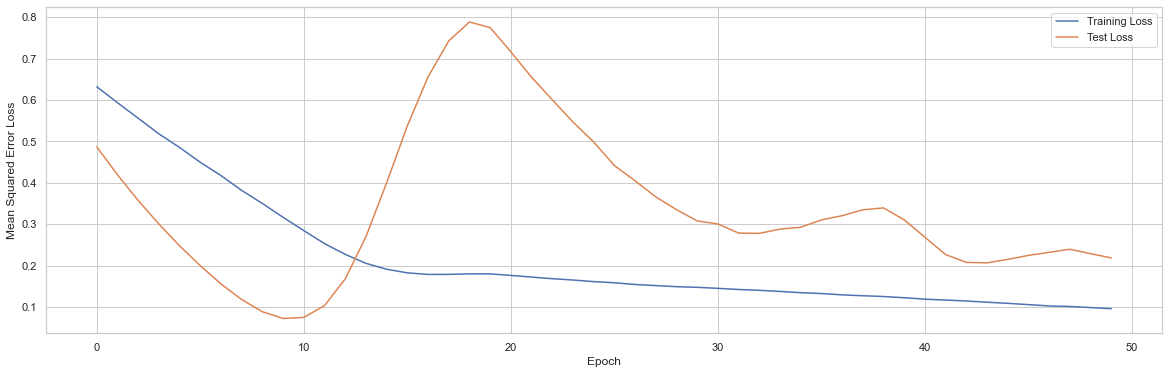

1/1 [==============================] - 0s 322ms/step - loss: 0.1330
Mean Squared Error on Test Data: 0.13300444185733795


In [480]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Preprocessing
label_encoder = LabelEncoder()
df_ml_nn['Country'] = label_encoder.fit_transform(df_ml_nn['Country'])

df_ml_nn['Year'] = df_ml_nn['Year'] - df_ml_nn['Year'].min()

# Define features and target variables
X = df_ml_nn[['Country', 'Year']]
y = df_ml_nn[['Sentiment', 'PCT', 'BMCT', 'OT']]

# Train-test split
X_train = X.loc[X["Year"] != 5]
y_train = y.loc[X["Year"] != 5]

X_test = X.loc[X["Year"] == 5]
y_test = y.loc[X["Year"] == 5]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation="relu"))
model.add(Dense(4, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and get the history
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Plot the training and test losses
plt.figure(figsize=(20, 6))  # Set the size of the figure
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')  # Change to 'Test Loss'
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

Hyperparameter tuning LSTM:

In [488]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_squared_error

# Preprocessing
label_encoder = LabelEncoder()
df_ml_nn['Country'] = label_encoder.fit_transform(df_ml_nn['Country'])

df_ml_nn['Year'] = df_ml_nn['Year'] - df_ml_nn['Year'].min()

# Define features and target variables
X = df_ml_nn[['Country', 'Year']]
y = df_ml_nn[['Sentiment', 'PCT', 'BMCT', 'OT']]

# Train-test split
X_train = X.loc[X["Year"] != 5]
y_train = y.loc[X["Year"] != 5]

X_test = X.loc[X["Year"] == 5]
y_test = y.loc[X["Year"] == 5]

# Function to create model
def create_model(neurons_layer1=64, optimizer='adam', activation_layer1='relu'):
    model = Sequential()
    model.add(LSTM(neurons_layer1, input_shape=(X_train.shape[1], 1), activation=activation_layer1))
    model.add(Dense(4, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create KerasRegressor
regressor = KerasRegressor(build_fn=create_model, epochs=50, verbose=1)

# Parameter grid for GridSearchCV
param_grid = {
    'neurons_layer1': [32, 64, 128],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [8, 16, 32],
    'activation_layer1': ['relu', 'sigmoid', 'tanh']
}

# Mean squared error scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# GridSearchCV
start_time_gridsearch = time.time()
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring=mse_scorer, verbose=1)
grid_result = grid.fit(X_train, y_train)
end_time_gridsearch = time.time()

# Display best parameters
print("Best parameters found: ", grid_result.best_params_)

# Evaluate the best model
best_model = grid_result.best_estimator_
start_time_evaluation = time.time()
loss = best_model.score(X_test, y_test)
end_time_evaluation = time.time()
print(f'Mean Squared Error on Test Data: {loss}')

# Print timing information
print(f'Time taken for GridSearchCV: {end_time_gridsearch - start_time_gridsearch} seconds')
print(f'Time taken for model evaluation: {end_time_evaluation - start_time_evaluation} seconds')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Epoch 1/50
4/4 [==============================] - 2s 5ms/step - loss: 0.9265
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.8722
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8188
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.7722
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7266
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.6832
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.6401
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.5989
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.5577
Epoch 10/50
4/4 [==============================] - 0s 8ms/step - loss: 0.5173
Epoch 11/50
4/4 [==============================] - 0s 7ms/step - loss: 0.4765
Epoch 12/50
4/4 [==============================] - 0s 8ms/step - loss: 0.4358
Epoch 13/50

Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7084
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6822
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6536
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6252
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.5978
Epoch 9/50
4/4 [==============================] - 0s 7ms/step - loss: 0.5680
Epoch 10/50
4/4 [==============================] - 0s 8ms/step - loss: 0.5389
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5091
Epoch 12/50
4/4 [==============================] - 0s 8ms/step - loss: 0.4766
Epoch 13/50
4/4 [==============================] - 0s 10ms/step - loss: 0.4468
Epoch 14/50
4/4 [==============================] - 0s 9ms/step - loss: 0.4138
Epoch 15/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3789
Epoch 16/50
4/4 [==============================] - 0s 9ms/step - loss

4/4 [==============================] - 0s 8ms/step - loss: 0.3193
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2799
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2462
Epoch 10/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2180
Epoch 11/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1961
Epoch 12/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1820
Epoch 13/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1733
Epoch 14/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1693
Epoch 15/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1652
Epoch 16/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1611
Epoch 17/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1584
Epoch 18/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1543
Epoch 19/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1516


4/4 [==============================] - 0s 9ms/step - loss: 0.2246
Epoch 12/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1800
Epoch 13/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1546
Epoch 14/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1475
Epoch 15/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1459
Epoch 16/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1452
Epoch 17/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1425
Epoch 18/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1388
Epoch 19/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1345
Epoch 20/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1325
Epoch 21/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1286
Epoch 22/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1257
Epoch 23/50
4/4 [==============================] - 0s 6ms/step - loss: 0.123

Epoch 15/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1417
Epoch 16/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1356
Epoch 17/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1355
Epoch 18/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1347
Epoch 19/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1328
Epoch 20/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1273
Epoch 21/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1239
Epoch 22/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1207
Epoch 23/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1186
Epoch 24/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1161
Epoch 25/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1135
Epoch 26/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1112
Epoch 27/50
4/4 [==============================] - 0s 7ms/step 

4/4 [==============================] - 0s 10ms/step - loss: 0.1387
Epoch 19/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1356
Epoch 20/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1315
Epoch 21/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1297
Epoch 22/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1250
Epoch 23/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1217
Epoch 24/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1183
Epoch 25/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1149
Epoch 26/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1111
Epoch 27/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1080
Epoch 28/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1065
Epoch 29/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1023
Epoch 30/50
4/4 [==============================] - 0s 6ms/step - loss: 0.09

4/4 [==============================] - 0s 9ms/step - loss: 0.1205
Epoch 22/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1177
Epoch 23/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1154
Epoch 24/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1129
Epoch 25/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1100
Epoch 26/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1073
Epoch 27/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1046
Epoch 28/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1018
Epoch 29/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0992
Epoch 30/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0973
Epoch 31/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0960
Epoch 32/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0924
Epoch 33/50
4/4 [==============================] - 0s 8ms/step - loss: 

4/4 [==============================] - 0s 14ms/step - loss: 0.0735
Epoch 25/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0690
Epoch 26/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0647
Epoch 27/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0597
Epoch 28/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0554
Epoch 29/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0508
Epoch 30/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0475
Epoch 31/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0443
Epoch 32/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0422
Epoch 33/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0404
Epoch 34/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0391
Epoch 35/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0382
Epoch 36/50
4/4 [==============================] - 0s 11ms/step - 

4/4 [==============================] - 0s 10ms/step - loss: 0.0734
Epoch 28/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0689
Epoch 29/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0650
Epoch 30/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0635
Epoch 31/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0594
Epoch 32/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0576
Epoch 33/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0571
Epoch 34/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0541
Epoch 35/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0531
Epoch 36/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0513
Epoch 37/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0519
Epoch 38/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0475
Epoch 39/50
4/4 [==============================] - 0s 11ms/step - 

2/2 [==============================] - 0s 9ms/step - loss: 0.4955
Epoch 31/50
2/2 [==============================] - 0s 13ms/step - loss: 0.4703
Epoch 32/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4452
Epoch 33/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4202
Epoch 34/50
2/2 [==============================] - 0s 10ms/step - loss: 0.3956
Epoch 35/50
2/2 [==============================] - 0s 12ms/step - loss: 0.3726
Epoch 36/50
2/2 [==============================] - 0s 12ms/step - loss: 0.3486
Epoch 37/50
2/2 [==============================] - 0s 9ms/step - loss: 0.3251
Epoch 38/50
2/2 [==============================] - 0s 13ms/step - loss: 0.3051
Epoch 39/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2845
Epoch 40/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2653
Epoch 41/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2478
Epoch 42/50
2/2 [==============================] - 0s 22ms/step - loss

2/2 [==============================] - 0s 8ms/step - loss: 0.1677
Epoch 34/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1571
Epoch 35/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1490
Epoch 36/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1438
Epoch 37/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1391
Epoch 38/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1367
Epoch 39/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1357
Epoch 40/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1354
Epoch 41/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1343
Epoch 42/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1344
Epoch 43/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1331
Epoch 44/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1321
Epoch 45/50
2/2 [==============================] - 0s 9ms/step - loss: 0.130

2/2 [==============================] - 0s 9ms/step - loss: 0.1447
Epoch 37/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1426
Epoch 38/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1409
Epoch 39/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1393
Epoch 40/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1374
Epoch 41/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1352
Epoch 42/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1334
Epoch 43/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1318
Epoch 44/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1300
Epoch 45/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1285
Epoch 46/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1273
Epoch 47/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1253
Epoch 48/50
2/2 [==============================] - 0s 9ms/step - loss: 0.

2/2 [==============================] - 0s 12ms/step - loss: 0.1273
Epoch 40/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1260
Epoch 41/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1248
Epoch 42/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1237
Epoch 43/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1227
Epoch 44/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1215
Epoch 45/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1204
Epoch 46/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1193
Epoch 47/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1182
Epoch 48/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1170
Epoch 49/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1160
Epoch 50/50
1/1 [==============================] - 0s 284ms/step
Epoch 1/50
2/2 [==============================] - 2s 7ms/step - loss: 0.6944
Ep

2/2 [==============================] - 0s 7ms/step - loss: 0.1199
Epoch 43/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1183
Epoch 44/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1178
Epoch 45/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1163
Epoch 46/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1152
Epoch 47/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1140
Epoch 48/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1127
Epoch 49/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1115
Epoch 50/50
1/1 [==============================] - 0s 250ms/step
Epoch 1/50
2/2 [==============================] - 4s 9ms/step - loss: 0.8601
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 0.7685
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.7043
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6507
Epoch 5/

2/2 [==============================] - 0s 10ms/step - loss: 0.1060
Epoch 46/50
2/2 [==============================] - 0s 13ms/step - loss: 0.1036
Epoch 47/50
2/2 [==============================] - 0s 14ms/step - loss: 0.1014
Epoch 48/50
2/2 [==============================] - 0s 14ms/step - loss: 0.1019
Epoch 49/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0979
Epoch 50/50
1/1 [==============================] - 0s 235ms/step
Epoch 1/50
2/2 [==============================] - 2s 8ms/step - loss: 0.8406
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 0.7829
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 0.7418
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 0.7080
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 0.6765
Epoch 6/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6467
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6187
Epoch 8/

2/2 [==============================] - 0s 23ms/step - loss: 0.0981
Epoch 48/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0970
Epoch 49/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0955
Epoch 50/50
1/1 [==============================] - 0s 254ms/step
Epoch 1/50
2/2 [==============================] - 2s 14ms/step - loss: 0.6706
Epoch 2/50
2/2 [==============================] - 0s 17ms/step - loss: 0.6263
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 0.5840
Epoch 4/50
2/2 [==============================] - 0s 20ms/step - loss: 0.5461
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: 0.5130
Epoch 6/50
2/2 [==============================] - 0s 21ms/step - loss: 0.4756
Epoch 7/50
2/2 [==============================] - 0s 20ms/step - loss: 0.4397
Epoch 8/50
2/2 [==============================] - 0s 20ms/step - loss: 0.4066
Epoch 9/50
2/2 [==============================] - 0s 26ms/step - loss: 0.3755
Epoch 10

2/2 [==============================] - 0s 20ms/step - loss: 0.0807
Epoch 50/50
1/1 [==============================] - 0s 265ms/step
Epoch 1/50
2/2 [==============================] - 2s 19ms/step - loss: 0.9012
Epoch 2/50
2/2 [==============================] - 0s 17ms/step - loss: 0.7778
Epoch 3/50
2/2 [==============================] - 0s 25ms/step - loss: 0.6861
Epoch 4/50
2/2 [==============================] - 0s 21ms/step - loss: 0.6028
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 0.5252
Epoch 6/50
2/2 [==============================] - 0s 20ms/step - loss: 0.4537
Epoch 7/50
2/2 [==============================] - 0s 21ms/step - loss: 0.3873
Epoch 8/50
2/2 [==============================] - 0s 20ms/step - loss: 0.3265
Epoch 9/50
2/2 [==============================] - 0s 20ms/step - loss: 0.2741
Epoch 10/50
2/2 [==============================] - 0s 25ms/step - loss: 0.2305
Epoch 11/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1973
Epoch 12

2/2 [==============================] - 2s 14ms/step - loss: 0.7748
Epoch 2/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6725
Epoch 3/50
2/2 [==============================] - 0s 22ms/step - loss: 0.6050
Epoch 4/50
2/2 [==============================] - 0s 21ms/step - loss: 0.5473
Epoch 5/50
2/2 [==============================] - 0s 17ms/step - loss: 0.4948
Epoch 6/50
2/2 [==============================] - 0s 19ms/step - loss: 0.4447
Epoch 7/50
2/2 [==============================] - 0s 18ms/step - loss: 0.3972
Epoch 8/50
2/2 [==============================] - 0s 19ms/step - loss: 0.3532
Epoch 9/50
2/2 [==============================] - 0s 19ms/step - loss: 0.3117
Epoch 10/50
2/2 [==============================] - 0s 19ms/step - loss: 0.2728
Epoch 11/50
2/2 [==============================] - 0s 21ms/step - loss: 0.2385
Epoch 12/50
2/2 [==============================] - 0s 19ms/step - loss: 0.2093
Epoch 13/50
2/2 [==============================] - 0s 21ms/step - loss: 

1/1 [==============================] - 0s 11ms/step - loss: 0.6541
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6419
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6298
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6179
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6062
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5947
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5835
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5724
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5615
Epoch 12/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5508
Epoch 13/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5401
Epoch 14/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5297
Epoch 15/50
1/1 [==============================] - 0s 10ms/step - loss: 

1/1 [==============================] - 0s 10ms/step - loss: 0.6587
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6377
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6182
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5998
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5825
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5660
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5501
Epoch 12/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5347
Epoch 13/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5198
Epoch 14/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5052
Epoch 15/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4910
Epoch 16/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4771
Epoch 17/50
1/1 [==============================] - 0s 14ms/step - loss

Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6524
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6397
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6275
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6158
Epoch 12/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6044
Epoch 13/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5934
Epoch 14/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5826
Epoch 15/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5720
Epoch 16/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5616
Epoch 17/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5513
Epoch 18/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5412
Epoch 19/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5312
Epoch 20/50
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 12ms/step - loss: 0.4596
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.4454
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4314
Epoch 13/50
1/1 [==============================] - 0s 16ms/step - loss: 0.4177
Epoch 14/50
1/1 [==============================] - 0s 13ms/step - loss: 0.4043
Epoch 15/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3910
Epoch 16/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3781
Epoch 17/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3653
Epoch 18/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3528
Epoch 19/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3406
Epoch 20/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3285
Epoch 21/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3168
Epoch 22/50
1/1 [==============================] - 0s 14ms/step 

1/1 [==============================] - 0s 17ms/step - loss: 0.4304
Epoch 13/50
1/1 [==============================] - 0s 15ms/step - loss: 0.4054
Epoch 14/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3815
Epoch 15/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3588
Epoch 16/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3373
Epoch 17/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3169
Epoch 18/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2979
Epoch 19/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2802
Epoch 20/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2637
Epoch 21/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2487
Epoch 22/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2351
Epoch 23/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2229
Epoch 24/50
1/1 [==============================] - 0s 15ms/step 

1/1 [==============================] - 0s 15ms/step - loss: 0.5168
Epoch 15/50
1/1 [==============================] - 0s 22ms/step - loss: 0.5003
Epoch 16/50
1/1 [==============================] - 0s 21ms/step - loss: 0.4840
Epoch 17/50
1/1 [==============================] - 0s 17ms/step - loss: 0.4677
Epoch 18/50
1/1 [==============================] - 0s 18ms/step - loss: 0.4514
Epoch 19/50
1/1 [==============================] - 0s 16ms/step - loss: 0.4353
Epoch 20/50
1/1 [==============================] - 0s 27ms/step - loss: 0.4191
Epoch 21/50
1/1 [==============================] - 0s 16ms/step - loss: 0.4030
Epoch 22/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3871
Epoch 23/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3713
Epoch 24/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3558
Epoch 25/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3404
Epoch 26/50
1/1 [==============================] - 0s 14ms/step 

1/1 [==============================] - 0s 28ms/step - loss: 0.3403
Epoch 17/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3233
Epoch 18/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3066
Epoch 19/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2905
Epoch 20/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2749
Epoch 21/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2601
Epoch 22/50
1/1 [==============================] - 0s 29ms/step - loss: 0.2461
Epoch 23/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2330
Epoch 24/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2211
Epoch 25/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2104
Epoch 26/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2012
Epoch 27/50
1/1 [==============================] - 0s 33ms/step - loss: 0.1936
Epoch 28/50
1/1 [==============================] - 0s 37ms/step 

1/1 [==============================] - 0s 27ms/step - loss: 0.2056
Epoch 19/50
1/1 [==============================] - 0s 25ms/step - loss: 0.1902
Epoch 20/50
1/1 [==============================] - 0s 24ms/step - loss: 0.1777
Epoch 21/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1681
Epoch 22/50
1/1 [==============================] - 0s 31ms/step - loss: 0.1609
Epoch 23/50
1/1 [==============================] - 0s 35ms/step - loss: 0.1557
Epoch 24/50
1/1 [==============================] - 0s 40ms/step - loss: 0.1521
Epoch 25/50
1/1 [==============================] - 0s 36ms/step - loss: 0.1496
Epoch 26/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1477
Epoch 27/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1462
Epoch 28/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1449
Epoch 29/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1436
Epoch 30/50
1/1 [==============================] - 0s 32ms/step 

1/1 [==============================] - 0s 25ms/step - loss: 0.2348
Epoch 21/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2167
Epoch 22/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2006
Epoch 23/50
1/1 [==============================] - 0s 23ms/step - loss: 0.1867
Epoch 24/50
1/1 [==============================] - 0s 24ms/step - loss: 0.1748
Epoch 25/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1648
Epoch 26/50
1/1 [==============================] - 0s 24ms/step - loss: 0.1566
Epoch 27/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1501
Epoch 28/50
1/1 [==============================] - 0s 25ms/step - loss: 0.1451
Epoch 29/50
1/1 [==============================] - 0s 25ms/step - loss: 0.1412
Epoch 30/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1381
Epoch 31/50
1/1 [==============================] - 0s 34ms/step - loss: 0.1357
Epoch 32/50
1/1 [==============================] - 0s 27ms/step 

4/4 [==============================] - 0s 5ms/step - loss: 0.0605
Epoch 24/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0597
Epoch 25/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0596
Epoch 26/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0595
Epoch 27/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0596
Epoch 28/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0595
Epoch 29/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0594
Epoch 30/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0594
Epoch 31/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0593
Epoch 32/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0593
Epoch 33/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0592
Epoch 34/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0592
Epoch 35/50
4/4 [==============================] - 0s 6ms/step - loss: 0.059

4/4 [==============================] - 0s 10ms/step - loss: 0.0372
Epoch 28/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0378
Epoch 29/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0372
Epoch 30/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0361
Epoch 31/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0359
Epoch 32/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0358
Epoch 33/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0362
Epoch 34/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0356
Epoch 35/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 36/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0356
Epoch 37/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0353
Epoch 38/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 39/50
4/4 [==============================] - 0s 7ms/step - loss: 0.

4/4 [==============================] - 0s 7ms/step - loss: 0.0710
Epoch 32/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0716
Epoch 33/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0707
Epoch 34/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0702
Epoch 35/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0697
Epoch 36/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0701
Epoch 37/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0700
Epoch 38/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0698
Epoch 39/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0710
Epoch 40/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0694
Epoch 41/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0694
Epoch 42/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0698
Epoch 43/50
4/4 [==============================] - 0s 7ms/step - loss: 0.070

4/4 [==============================] - 0s 7ms/step - loss: 0.0572
Epoch 35/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0570
Epoch 36/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0569
Epoch 37/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0574
Epoch 38/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0574
Epoch 39/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0568
Epoch 40/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0568
Epoch 41/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0569
Epoch 42/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0574
Epoch 43/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0567
Epoch 44/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 45/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 46/50
4/4 [==============================] - 0s 20ms/step - loss: 

4/4 [==============================] - 0s 7ms/step - loss: 0.0364
Epoch 38/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0327
Epoch 39/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0323
Epoch 40/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0331
Epoch 41/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0333
Epoch 42/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0328
Epoch 43/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0335
Epoch 44/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0332
Epoch 45/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0321
Epoch 46/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0315
Epoch 47/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0316
Epoch 48/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0342
Epoch 49/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0

4/4 [==============================] - 0s 7ms/step - loss: 0.0719
Epoch 41/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0666
Epoch 42/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0676
Epoch 43/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0678
Epoch 44/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0670
Epoch 45/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0686
Epoch 46/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0686
Epoch 47/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0670
Epoch 48/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 49/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0662
Epoch 50/50
2/2 [==============================] - 0s 6ms/step
Epoch 1/50
4/4 [==============================] - 2s 8ms/step - loss: 0.8273
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3594
Epoch 3/50

4/4 [==============================] - 0s 9ms/step - loss: 0.0575
Epoch 44/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0565
Epoch 45/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0565
Epoch 46/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0569
Epoch 47/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0565
Epoch 48/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0569
Epoch 49/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0564
Epoch 50/50
2/2 [==============================] - 0s 5ms/step
Epoch 1/50
4/4 [==============================] - 2s 8ms/step - loss: 0.5763
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2482
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0991
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0915
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1011
Epoch 6/50
4

4/4 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 47/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0360
Epoch 48/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 49/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0333
Epoch 50/50
2/2 [==============================] - 0s 5ms/step
Epoch 1/50
4/4 [==============================] - 2s 9ms/step - loss: 0.9915
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3380
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1517
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0901
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0706
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0613
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0625
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0646
Epoch 9/50
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.0682
Epoch 50/50
2/2 [==============================] - 0s 6ms/step
Epoch 1/50
2/2 [==============================] - 2s 7ms/step - loss: 1.6646
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 1.5763
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 1.4907
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 1.4083
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 1.3297
Epoch 6/50
2/2 [==============================] - 0s 10ms/step - loss: 1.2539
Epoch 7/50
2/2 [==============================] - 0s 10ms/step - loss: 1.1820
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 1.1130
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 1.0467
Epoch 10/50
2/2 [==============================] - 0s 11ms/step - loss: 0.9835
Epoch 11/50
2/2 [==============================] - 0s 9ms/step - loss: 0.9241
Epoch 12/50
2/2 [=

2/2 [==============================] - 2s 6ms/step - loss: 0.9603
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.9067
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.8559
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.8085
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 0.7613
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.7187
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6752
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6349
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5957
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.5586
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 0.5238
Epoch 12/50
2/2 [==============================] - 0s 10ms/step - loss: 0.4895
Epoch 13/50
2/2 [==============================] - 0s 9ms/step - loss: 0.4568
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.4377
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3956
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3595
Epoch 7/50
2/2 [==============================] - 0s 10ms/step - loss: 0.3274
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2985
Epoch 9/50
2/2 [==============================] - 0s 11ms/step - loss: 0.2723
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2484
Epoch 11/50
2/2 [==============================] - 0s 9ms/step - loss: 0.2267
Epoch 12/50
2/2 [==============================] - 0s 10ms/step - loss: 0.2069
Epoch 13/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1886
Epoch 14/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1721
Epoch 15/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1572
Epoch 16/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1438

2/2 [==============================] - 0s 8ms/step - loss: 0.1849
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1412
Epoch 9/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1081
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0821
Epoch 11/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0631
Epoch 12/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0500
Epoch 13/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0418
Epoch 14/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0381
Epoch 15/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0357
Epoch 16/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0366
Epoch 17/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0364
Epoch 18/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0382
Epoch 19/50
2/2 [==============================] - 0s 10ms/step - l

2/2 [==============================] - 0s 10ms/step - loss: 0.1471
Epoch 11/50
2/2 [==============================] - 0s 14ms/step - loss: 0.1204
Epoch 12/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1025
Epoch 13/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0906
Epoch 14/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0829
Epoch 15/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0757
Epoch 16/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0734
Epoch 17/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0723
Epoch 18/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0713
Epoch 19/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0723
Epoch 20/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0739
Epoch 21/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0739
Epoch 22/50
2/2 [==============================] - 0s 9ms/step - los

2/2 [==============================] - 0s 9ms/step - loss: 0.0613
Epoch 14/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0594
Epoch 15/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0595
Epoch 16/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0587
Epoch 17/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0585
Epoch 18/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0583
Epoch 19/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0586
Epoch 20/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0582
Epoch 21/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0583
Epoch 22/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0590
Epoch 23/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0590
Epoch 24/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0581
Epoch 25/50
2/2 [==============================] - 0s 10ms/step - lo

2/2 [==============================] - 0s 14ms/step - loss: 0.0736
Epoch 17/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0659
Epoch 18/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0558
Epoch 19/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0461
Epoch 20/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0402
Epoch 21/50
2/2 [==============================] - 0s 55ms/step - loss: 0.0361
Epoch 22/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0339
Epoch 23/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0339
Epoch 24/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0346
Epoch 25/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0354
Epoch 26/50
2/2 [==============================] - 0s 14ms/step - loss: 0.0363
Epoch 27/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0366
Epoch 28/50
2/2 [==============================] - 0s 24ms/step 

2/2 [==============================] - 0s 33ms/step - loss: 0.0821
Epoch 19/50
2/2 [==============================] - 0s 28ms/step - loss: 0.0752
Epoch 20/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0744
Epoch 21/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0715
Epoch 22/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0718
Epoch 23/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0736
Epoch 24/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0736
Epoch 25/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0750
Epoch 26/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0747
Epoch 27/50
2/2 [==============================] - 0s 28ms/step - loss: 0.0742
Epoch 28/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0734
Epoch 29/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0729
Epoch 30/50
2/2 [==============================] - 0s 32ms/step 

2/2 [==============================] - 0s 20ms/step - loss: 0.0583
Epoch 21/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0617
Epoch 22/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0599
Epoch 23/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0596
Epoch 24/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0594
Epoch 25/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0628
Epoch 26/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0614
Epoch 27/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0586
Epoch 28/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0596
Epoch 29/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0595
Epoch 30/50
2/2 [==============================] - 0s 30ms/step - loss: 0.0592
Epoch 31/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0603
Epoch 32/50
2/2 [==============================] - 0s 19ms/step 

1/1 [==============================] - 0s 12ms/step - loss: 0.5923
Epoch 23/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5698
Epoch 24/50
1/1 [==============================] - 0s 15ms/step - loss: 0.5479
Epoch 25/50
1/1 [==============================] - 0s 17ms/step - loss: 0.5267
Epoch 26/50
1/1 [==============================] - 0s 14ms/step - loss: 0.5060
Epoch 27/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4860
Epoch 28/50
1/1 [==============================] - 0s 13ms/step - loss: 0.4666
Epoch 29/50
1/1 [==============================] - 0s 17ms/step - loss: 0.4477
Epoch 30/50
1/1 [==============================] - 0s 17ms/step - loss: 0.4295
Epoch 31/50
1/1 [==============================] - 0s 14ms/step - loss: 0.4118
Epoch 32/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3947
Epoch 33/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3781
Epoch 34/50
1/1 [==============================] - 0s 11ms/step 

Epoch 25/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2710
Epoch 26/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2608
Epoch 27/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2508
Epoch 28/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2413
Epoch 29/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2321
Epoch 30/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2233
Epoch 31/50
1/1 [==============================] - 0s 17ms/step - loss: 0.2147
Epoch 32/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2066
Epoch 33/50
1/1 [==============================] - 0s 16ms/step - loss: 0.1987
Epoch 34/50
1/1 [==============================] - 0s 15ms/step - loss: 0.1912
Epoch 35/50
1/1 [==============================] - 0s 13ms/step - loss: 0.1840
Epoch 36/50
1/1 [==============================] - 0s 16ms/step - loss: 0.1771
Epoch 37/50
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step - loss: 0.3251
Epoch 28/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3129
Epoch 29/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3011
Epoch 30/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2897
Epoch 31/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2786
Epoch 32/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2679
Epoch 33/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2575
Epoch 34/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2474
Epoch 35/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2376
Epoch 36/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2281
Epoch 37/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2189
Epoch 38/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2101
Epoch 39/50
1/1 [==============================] - 0s 9ms/step - loss

1/1 [==============================] - 0s 14ms/step - loss: 0.0378
Epoch 31/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0384
Epoch 32/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0390
Epoch 33/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0396
Epoch 34/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 35/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0404
Epoch 36/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0407
Epoch 37/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0408
Epoch 38/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0407
Epoch 39/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0405
Epoch 40/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0402
Epoch 41/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0398
Epoch 42/50
1/1 [==============================] - 0s 12ms/step 

1/1 [==============================] - 0s 14ms/step - loss: 0.0718
Epoch 33/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0720
Epoch 34/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0724
Epoch 35/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0729
Epoch 36/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0736
Epoch 37/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0743
Epoch 38/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0750
Epoch 39/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0756
Epoch 40/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0761
Epoch 41/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0765
Epoch 42/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0767
Epoch 43/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0768
Epoch 44/50
1/1 [==============================] - 0s 10ms/step 

1/1 [==============================] - 0s 13ms/step - loss: 0.0593
Epoch 35/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0592
Epoch 36/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0591
Epoch 37/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0590
Epoch 38/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0589
Epoch 39/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0588
Epoch 40/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0587
Epoch 41/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0586
Epoch 42/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0585
Epoch 43/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0584
Epoch 44/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0583
Epoch 45/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0582
Epoch 46/50
1/1 [==============================] - 0s 12ms/step 

1/1 [==============================] - 0s 26ms/step - loss: 0.0386
Epoch 37/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0377
Epoch 38/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0367
Epoch 39/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0357
Epoch 40/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0347
Epoch 41/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0339
Epoch 42/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0334
Epoch 43/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0331
Epoch 44/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0330
Epoch 45/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0330
Epoch 46/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0332
Epoch 47/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0334
Epoch 48/50
1/1 [==============================] - 0s 42ms/step 

1/1 [==============================] - 0s 31ms/step - loss: 0.0836
Epoch 39/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0808
Epoch 40/50
1/1 [==============================] - 0s 30ms/step - loss: 0.0782
Epoch 41/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0761
Epoch 42/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0745
Epoch 43/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0733
Epoch 44/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0725
Epoch 45/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0721
Epoch 46/50
1/1 [==============================] - 0s 40ms/step - loss: 0.0720
Epoch 47/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0721
Epoch 48/50
1/1 [==============================] - 0s 37ms/step - loss: 0.0723
Epoch 49/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0727
Epoch 50/50
1/1 [==============================] - 0s 229ms/step

1/1 [==============================] - 0s 28ms/step - loss: 0.0591
Epoch 41/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0592
Epoch 42/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0593
Epoch 43/50
1/1 [==============================] - 0s 40ms/step - loss: 0.0593
Epoch 44/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0593
Epoch 45/50
1/1 [==============================] - 0s 43ms/step - loss: 0.0591
Epoch 46/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0589
Epoch 47/50
1/1 [==============================] - 0s 46ms/step - loss: 0.0587
Epoch 48/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0585
Epoch 49/50
1/1 [==============================] - 0s 49ms/step - loss: 0.0585
Epoch 50/50
1/1 [==============================] - 0s 332ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.7703
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 1.1949
Epo

4/4 [==============================] - 0s 7ms/step - loss: 0.0493
Epoch 44/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0486
Epoch 45/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0482
Epoch 46/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 47/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 48/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 49/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 50/50
2/2 [==============================] - 1s 5ms/step
Epoch 1/50
4/4 [==============================] - 3s 6ms/step - loss: 0.3868
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.3346
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2908
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2519
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2184
Epoch 6/50
4/4 [==

4/4 [==============================] - 0s 6ms/step - loss: 0.0855
Epoch 48/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0850
Epoch 49/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0842
Epoch 50/50
2/2 [==============================] - 1s 3ms/step
Epoch 1/50
4/4 [==============================] - 4s 7ms/step - loss: 0.6520
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.5186
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.4282
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3541
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2920
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2399
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1961
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1602
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1313
Epoch 10/50
4/4 [====

2/2 [==============================] - 1s 4ms/step
Epoch 1/50
4/4 [==============================] - 3s 6ms/step - loss: 0.6098
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.5199
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.4593
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.4062
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3601
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3172
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.2790
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2444
Epoch 9/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2127
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1865
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1648
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1473
Epoch 13/50
4/4 [===

Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3846
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3198
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2671
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2235
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1881
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1632
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1514
Epoch 11/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1451
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1452
Epoch 13/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1454
Epoch 14/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1426
Epoch 15/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1389
Epoch 16/50
4/4 [==============================] - 0s 10ms/step -

4/4 [==============================] - 0s 10ms/step - loss: 0.1136
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0985
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0919
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0887
Epoch 11/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0867
Epoch 12/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0825
Epoch 13/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0805
Epoch 14/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0781
Epoch 15/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0763
Epoch 16/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0723
Epoch 17/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0693
Epoch 18/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0682
Epoch 19/50
4/4 [==============================] - 0s 11ms/step - loss: 0.06

4/4 [==============================] - 0s 9ms/step - loss: 0.1288
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1242
Epoch 12/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1232
Epoch 13/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1198
Epoch 14/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1164
Epoch 15/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1144
Epoch 16/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1121
Epoch 17/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1097
Epoch 18/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1088
Epoch 19/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1052
Epoch 20/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1007
Epoch 21/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0982
Epoch 22/50
4/4 [==============================] - 0s 8ms/step - loss: 0.096

4/4 [==============================] - 0s 9ms/step - loss: 0.1390
Epoch 14/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1354
Epoch 15/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1320
Epoch 16/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1281
Epoch 17/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1240
Epoch 18/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1208
Epoch 19/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1178
Epoch 20/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1144
Epoch 21/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1117
Epoch 22/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1088
Epoch 23/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1059
Epoch 24/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1036
Epoch 25/50
4/4 [==============================] - 0s 9ms/step - loss: 

4/4 [==============================] - 0s 9ms/step - loss: 0.0698
Epoch 17/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0673
Epoch 18/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0670
Epoch 19/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0706
Epoch 20/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0599
Epoch 21/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0564
Epoch 22/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0552
Epoch 23/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0539
Epoch 24/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0500
Epoch 25/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0494
Epoch 26/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 27/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0440
Epoch 28/50
4/4 [==============================] - 0s 14ms/step - lo

4/4 [==============================] - 0s 10ms/step - loss: 0.0858
Epoch 20/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0806
Epoch 21/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0807
Epoch 22/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0754
Epoch 23/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0723
Epoch 24/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0717
Epoch 25/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0696
Epoch 26/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0681
Epoch 27/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0670
Epoch 28/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0661
Epoch 29/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0672
Epoch 30/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0662
Epoch 31/50
4/4 [==============================] - 0s 9ms/step - loss

2/2 [==============================] - 0s 9ms/step - loss: 0.1981
Epoch 23/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1872
Epoch 24/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1772
Epoch 25/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1687
Epoch 26/50
2/2 [==============================] - 0s 15ms/step - loss: 0.1608
Epoch 27/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1545
Epoch 28/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1490
Epoch 29/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1441
Epoch 30/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1391
Epoch 31/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1363
Epoch 32/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1340
Epoch 33/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1316
Epoch 34/50
2/2 [==============================] - 0s 12ms/step - l

2/2 [==============================] - 0s 11ms/step - loss: 0.0951
Epoch 26/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0875
Epoch 27/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0810
Epoch 28/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0757
Epoch 29/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0715
Epoch 30/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0689
Epoch 31/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0657
Epoch 32/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0635
Epoch 33/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0620
Epoch 34/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0611
Epoch 35/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0599
Epoch 36/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0586
Epoch 37/50
2/2 [==============================] - 0s 10ms/step -

2/2 [==============================] - 0s 10ms/step - loss: 0.1641
Epoch 29/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1537
Epoch 30/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1440
Epoch 31/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1357
Epoch 32/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1284
Epoch 33/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1225
Epoch 34/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1179
Epoch 35/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1141
Epoch 36/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1109
Epoch 37/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1081
Epoch 38/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1055
Epoch 39/50
2/2 [==============================] - 0s 7ms/step - loss: 0.1036
Epoch 40/50
2/2 [==============================] - 0s 9ms/step - loss: 0.

2/2 [==============================] - 0s 8ms/step - loss: 0.1454
Epoch 32/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1437
Epoch 33/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1420
Epoch 34/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1401
Epoch 35/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1384
Epoch 36/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1367
Epoch 37/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1350
Epoch 38/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1336
Epoch 39/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1325
Epoch 40/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1309
Epoch 41/50
2/2 [==============================] - 0s 12ms/step - loss: 0.1300
Epoch 42/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1287
Epoch 43/50
2/2 [==============================] - 0s 9ms/step - los

2/2 [==============================] - 0s 14ms/step - loss: 0.0651
Epoch 35/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0626
Epoch 36/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0608
Epoch 37/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0602
Epoch 38/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0595
Epoch 39/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0564
Epoch 40/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0550
Epoch 41/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0535
Epoch 42/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0538
Epoch 43/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0523
Epoch 44/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0538
Epoch 45/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0483
Epoch 46/50
2/2 [==============================] - 0s 9ms/step - 

2/2 [==============================] - 0s 9ms/step - loss: 0.0951
Epoch 38/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0940
Epoch 39/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0921
Epoch 40/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0908
Epoch 41/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0902
Epoch 42/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0882
Epoch 43/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0859
Epoch 44/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0847
Epoch 45/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0833
Epoch 46/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0817
Epoch 47/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0811
Epoch 48/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0792
Epoch 49/50
2/2 [==============================] - 0s 10ms/step - los

2/2 [==============================] - 0s 21ms/step - loss: 0.1052
Epoch 40/50
2/2 [==============================] - 0s 19ms/step - loss: 0.1038
Epoch 41/50
2/2 [==============================] - 0s 17ms/step - loss: 0.1023
Epoch 42/50
2/2 [==============================] - 0s 16ms/step - loss: 0.1007
Epoch 43/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0993
Epoch 44/50
2/2 [==============================] - 0s 15ms/step - loss: 0.0979
Epoch 45/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0963
Epoch 46/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0949
Epoch 47/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0937
Epoch 48/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0925
Epoch 49/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0908
Epoch 50/50
1/1 [==============================] - 1s 510ms/step
Epoch 1/50
2/2 [==============================] - 3s 15ms/step - loss: 0.7566


2/2 [==============================] - 0s 20ms/step - loss: 0.0524
Epoch 42/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0519
Epoch 43/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0491
Epoch 44/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0468
Epoch 45/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0454
Epoch 46/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0455
Epoch 47/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0424
Epoch 48/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0441
Epoch 49/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0416
Epoch 50/50
1/1 [==============================] - 1s 694ms/step
Epoch 1/50
2/2 [==============================] - 3s 16ms/step - loss: 0.5620
Epoch 2/50
2/2 [==============================] - 0s 14ms/step - loss: 0.3842
Epoch 3/50
2/2 [==============================] - 0s 16ms/step - loss: 0.2914
Ep

2/2 [==============================] - 0s 24ms/step - loss: 0.0678
Epoch 44/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0654
Epoch 45/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0657
Epoch 46/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0653
Epoch 47/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0635
Epoch 48/50
2/2 [==============================] - 0s 19ms/step - loss: 0.0630
Epoch 49/50
2/2 [==============================] - 0s 17ms/step - loss: 0.0617
Epoch 50/50
1/1 [==============================] - 1s 625ms/step
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.8887
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.8663
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.8443
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.8226
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.8014
Epoch 6/

1/1 [==============================] - 0s 10ms/step - loss: 0.1441
Epoch 47/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1420
Epoch 48/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1402
Epoch 49/50
1/1 [==============================] - 0s 11ms/step - loss: 0.1385
Epoch 50/50
1/1 [==============================] - 1s 673ms/step
Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.6664
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6508
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6354
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6202
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6052
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5905
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.5759
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5615
Epoch 9/50
1/

1/1 [==============================] - 0s 14ms/step - loss: 0.0790
Epoch 50/50
1/1 [==============================] - 0s 495ms/step
Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7291
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6774
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6431
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6158
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5925
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5719
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5531
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5358
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5195
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5042
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.4896
Epoch 12/50
1

1/1 [==============================] - 3s 3s/step - loss: 0.9807
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.9441
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.9085
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 0.8739
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.8403
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.8076
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.7757
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.7447
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.7144
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6848
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6559
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6276
Epoch 13/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6000

Epoch 4/50
1/1 [==============================] - 0s 17ms/step - loss: 0.9181
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 0.8929
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.8684
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 0.8446
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.8214
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7988
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.7767
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.7551
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.7339
Epoch 13/50
1/1 [==============================] - 0s 11ms/step - loss: 0.7132
Epoch 14/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6929
Epoch 15/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6730
Epoch 16/50
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 9ms/step - loss: 0.3953
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3652
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3385
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3148
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2935
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2744
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2574
Epoch 13/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2422
Epoch 14/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2287
Epoch 15/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2167
Epoch 16/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2062
Epoch 17/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1969
Epoch 18/50
1/1 [==============================] - 0s 11ms/step - loss:

Epoch 9/50
1/1 [==============================] - 0s 27ms/step - loss: 0.5060
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 0.4561
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - loss: 0.4090
Epoch 12/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3649
Epoch 13/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3238
Epoch 14/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2859
Epoch 15/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2513
Epoch 16/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2202
Epoch 17/50
1/1 [==============================] - 0s 27ms/step - loss: 0.1927
Epoch 18/50
1/1 [==============================] - 0s 33ms/step - loss: 0.1690
Epoch 19/50
1/1 [==============================] - 0s 36ms/step - loss: 0.1493
Epoch 20/50
1/1 [==============================] - 0s 35ms/step - loss: 0.1335
Epoch 21/50
1/1 [==============================] - 0s

1/1 [==============================] - 0s 27ms/step - loss: 0.4295
Epoch 12/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3987
Epoch 13/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3693
Epoch 14/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3414
Epoch 15/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3151
Epoch 16/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2902
Epoch 17/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2670
Epoch 18/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2455
Epoch 19/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2256
Epoch 20/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2076
Epoch 21/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1915
Epoch 22/50
1/1 [==============================] - 0s 28ms/step - loss: 0.1773
Epoch 23/50
1/1 [==============================] - 0s 35ms/step 

1/1 [==============================] - 0s 33ms/step - loss: 0.1765
Epoch 14/50
1/1 [==============================] - 0s 35ms/step - loss: 0.1732
Epoch 15/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1706
Epoch 16/50
1/1 [==============================] - 0s 31ms/step - loss: 0.1684
Epoch 17/50
1/1 [==============================] - 0s 33ms/step - loss: 0.1664
Epoch 18/50
1/1 [==============================] - 0s 35ms/step - loss: 0.1644
Epoch 19/50
1/1 [==============================] - 0s 35ms/step - loss: 0.1625
Epoch 20/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1606
Epoch 21/50
1/1 [==============================] - 0s 31ms/step - loss: 0.1586
Epoch 22/50
1/1 [==============================] - 0s 28ms/step - loss: 0.1567
Epoch 23/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1547
Epoch 24/50
1/1 [==============================] - 0s 28ms/step - loss: 0.1527
Epoch 25/50
1/1 [==============================] - 0s 27ms/step 

Epoch 16/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1130
Epoch 17/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1028
Epoch 18/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0936
Epoch 19/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0869
Epoch 20/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0799
Epoch 21/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 22/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0723
Epoch 23/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0699
Epoch 24/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0683
Epoch 25/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0662
Epoch 26/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0652
Epoch 27/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0652
Epoch 28/50
3/3 [==============================] - 0s 7ms/step -

Best LSTM:

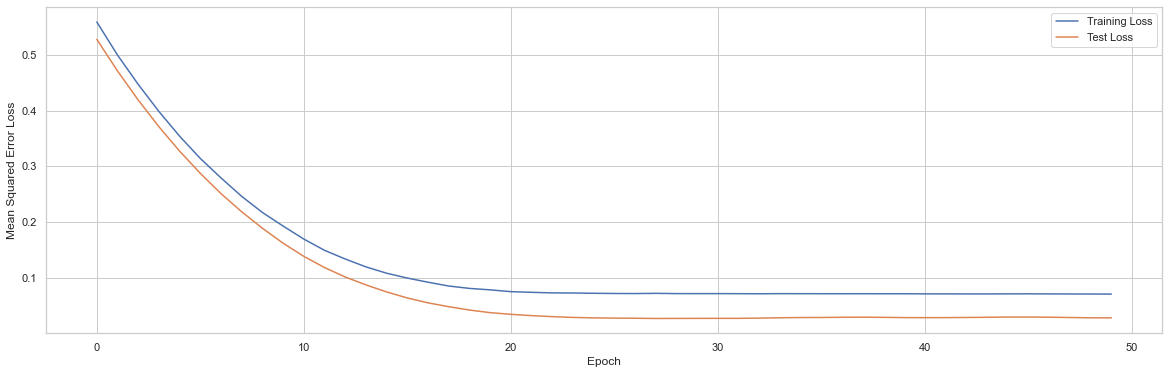

1/1 [==============================] - 0s 37ms/step - loss: 0.1092
Mean Squared Error on Test Data: 0.10919099301099777


In [500]:
# Preprocessing
label_encoder = LabelEncoder()
df_ml_nn['Country'] = label_encoder.fit_transform(df_ml_nn['Country'])

df_ml_nn['Year'] = df_ml_nn['Year'] - df_ml_nn['Year'].min()

# Define features and target variables
X = df_ml_nn[['Country', 'Year']]
X.reset_index(inplace=True, drop=True)
y = df_ml_nn[['Sentiment', 'PCT', 'BMCT', 'OT']]
y.reset_index(inplace=True, drop=True)

# Train-test split
X_train = X.loc[X["Year"] != 5]
X_train.reset_index(inplace=True, drop=True)
y_train = y.loc[X["Year"] != 5]
y_train.reset_index(inplace=True, drop=True)

X_test = X.loc[X["Year"] == 5]
X_test.reset_index(inplace=True, drop=True)
y_test = y.loc[X["Year"] == 5]
y_test.reset_index(inplace=True, drop=True)

# Build the Neural Network
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1), activation="sigmoid"))
model.add(Dense(4, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and get the history
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Plot the training and test losses
plt.figure(figsize=(20, 6))  # Set the size of the figure
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')  # Change to 'Test Loss'
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

##### Model comparison

1/1 [==============================] - 0s 27ms/step


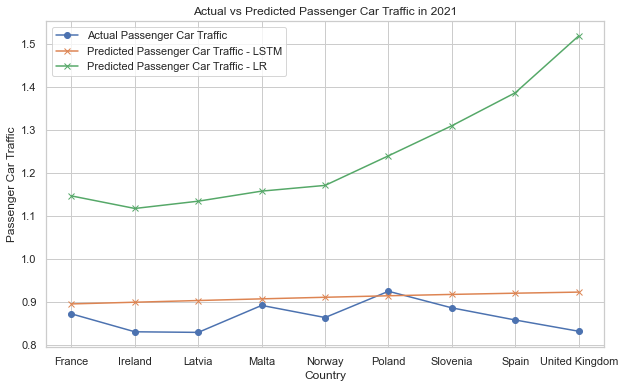

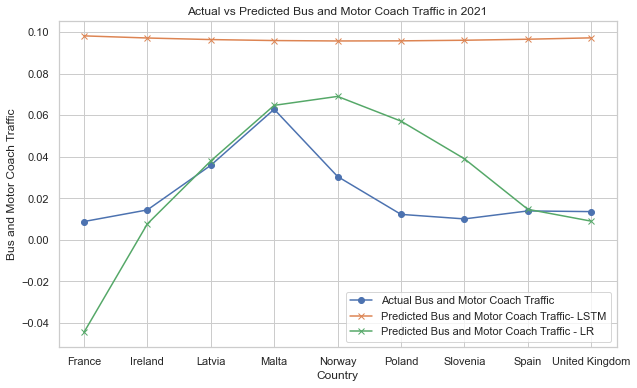

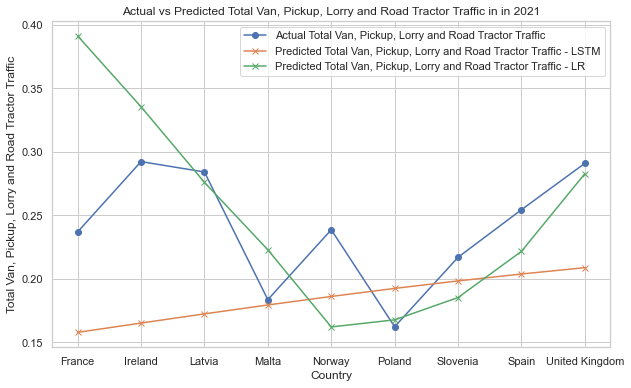

In [520]:
# Predictions on the test set
y_pred = model.predict(X_test)
countries = df_ml.loc[df_ml["Year"]==2021]["Country"].values

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(countries, y_test['PCT'], label='Actual Passenger Car Traffic', marker='o')
plt.plot(countries, y_pred[:, 1], label='Predicted Passenger Car Traffic - LSTM', marker='x')
plt.plot(countries, predictions[:,1], label='Predicted Passenger Car Traffic - LR', marker='x')
plt.xlabel('Country')
plt.ylabel('Passenger Car Traffic')
plt.title('Actual vs Predicted Passenger Car Traffic in 2021')
plt.legend()
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(countries, y_test['BMCT'], label='Actual Bus and Motor Coach Traffic', marker='o')
plt.plot(countries, y_pred[:, 2], label='Predicted Bus and Motor Coach Traffic- LSTM', marker='x')
plt.plot(countries, predictions[:,2], label='Predicted Bus and Motor Coach Traffic - LR', marker='x')
plt.xlabel('Country')
plt.ylabel('Bus and Motor Coach Traffic')
plt.title('Actual vs Predicted Bus and Motor Coach Traffic in 2021')
plt.legend()
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(countries, y_test['OT'], label='Actual Total Van, Pickup, Lorry and Road Tractor Traffic', marker='o')
plt.plot(countries, y_pred[:, 3], label='Predicted Total Van, Pickup, Lorry and Road Tractor Traffic - LSTM', marker='x')
plt.plot(countries, predictions[:,3], label='Predicted Total Van, Pickup, Lorry and Road Tractor Traffic - LR', marker='x')
plt.xlabel('Country')
plt.ylabel('Total Van, Pickup, Lorry and Road Tractor Traffic')
plt.title('Actual vs Predicted Total Van, Pickup, Lorry and Road Tractor Traffic in in 2021')
plt.legend()
plt.show()